# Projet Data Science HMIN232 - 2020/2021
Ce projet a pour but de proposer des modèles de classification supervisée d'assertions faites
par des figures politiques selon leur valeur de véracité, ou autrement dit, de proposer une
approche de fact-checking automatique.

Groupe : 

## **Installation**

In [2]:
# Importation des différentes librairies, classes et fonctions utilespour le notebook

#Sickit learn met régulièrement à jour des versions et 
#indique des futurs warnings. 
#ces deux lignes permettent de ne pas les afficher.
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


# librairies générales
import pandas as pd
import re
from tabulate import tabulate
import time
import numpy as np
import pickle
import string
import base64

# librairie affichage
import matplotlib.pyplot as plt
import seaborn as sns

# librairies scikit learn
import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score


# librairies des classifiers utilisés
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier

# librairies NLTK
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize 

 
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

    

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
# fonctions utilities (affichage, confusion, etc.)
from MyNLPUtilities import *


## les Données

Suite a une analyse des donnés communiqués dans le fichier csv ,nous avons décidé d'utiliser la platforme afin de télécharger les données contenant les valeur de véracités,tout en profitant du fait que ces dérniére sont plus propres que c'elles du fichier csv.



## 1 Importation des donnés


 le data frame est composé de 24454 lignes et 14 colonnes
La taille de la dataframe :342328 (24452*14)
1    10000
2    10000
3     4452
Name: truthRating, dtype: int64


id  \
0      http://data.gesis.org/claimskg/claim_review/36...   
1      http://data.gesis.org/claimskg/claim_review/e6...   
2      http://data.gesis.org/claimskg/claim_review/e0...   
3      http://data.gesis.org/claimskg/claim_review/48...   
4      http://data.gesis.org/claimskg/claim_review/80...   
...                                                  ...   
24449  http://data.gesis.org/claimskg/claim_review/41...   
24450  http://data.gesis.org/claimskg/claim_review/9e...   
24451  http://data.gesis.org/claimskg/claim_review/1a...   
24452  http://data.gesis.org/claimskg/claim_review/28...   
24453  http://data.gesis.org/claimskg/claim_review/e4...   

                                                    text        date  \
0      'There will be no public funding for abortion ...  2010-03-21   
1      Central Health 'is the only hospital district ...  2011-03-15   
2      Says most of Perry's chiefs of staff have been...  2010-08-14   
3      Says 'as Co-Chair of the Joint Ways & Means Co...  2012-09-28   
4      Says Gary Farmer’s claim that he 'received an ...  2016-07-08   
...                                                  ...         ...   
24449  'The city that I was mayor of was 50 percent L...  2018-06-07   
24450  A set of images show a congenital anomaly that...     Unknown   
24451  'You see 34 people (are) murdered every single...  2012-12-23   
24452  'White men have committed more mass shootings ...  2017-10-02   
24453  Under President Obama’s health-care reforms, t...  2013-12-05   

      truthRating ratingName           author  \
0               3       TRUE      Bart Stupak   
1               3       TRUE  Wayne Christian   
2               3       TRUE       Bill White   
3               3       TRUE       Mary Nolan   
4               3       TRUE      Jim Waldman   
...           ...        ...              ...   
24449           2    MIXTURE     Lou Barletta   
24450           2    MIXTURE          Unknown   
24451           2    MIXTURE      Cory Booker   
24452           2    MIXTURE         Newsweek   
24453           2    MIXTURE      Ron Johnson   

                                                headline  \
0      Stupak revises abortion stance on health care ...   
1      State Rep. Wayne Christian says Central Health...   
2      Bill White says most of Gov. Rick Perry's chie...   
3      Did Mary Nolan secure funding for Milwaukie br...   
4      Florida Senate candidate never actually receiv...   
...                                                  ...   
24449  Hazleton wasn’t half-Latino when Lou Barletta ...   
24450            Is This a Real Hand With Eight Fingers?   
24451  Cory Booker says 34 Americans are killed by gu...   
24452  Are white males responsible for more mass shoo...   
24453  Under Obamacare, health insurance premiums hav...   

                                    named_entities_claim  \
0      Abortion rights,Barack Obama,Bart Stupak,Ben N...   
1      Austin American-Statesman,Harris County Hospit...   
2      AT&T,Bill Clements,Bill White,Bracewell & Giul...   
3      Carolyn Tomei,Dave Hunt,Fetsch,Jeff Merkley,Ka...   
4      Gary Farmer,Gwyndolen Clarke-Reed,Jim Waldman,...   
...                                                  ...   
24449  Barletta,Bob Casey,Fox Business Network,Hazlet...   
24450  American Society for Surgery of the Hand,Bilas...   
24451  ABC,Centers for Disease Control and Prevention...   
24452  2015 San Bernardino shooting,Aurora, Colo,Foll...   
24453  2008 presidential campaign,Affordable Care Act...   

                      named_entities_article  \
0                                   abortion   
1                                        NaN   
2                                        NaN   
3      Portland-Milwaukie Light Rail project   
4                                Gary Farmer   
...                                      ...   
24449                                 Latino   
24450                                    NaN   
24451

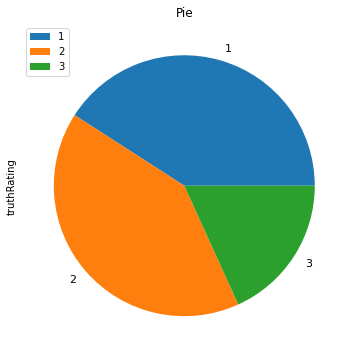

In [4]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

df = pd.read_csv (r'Rendu/DATASETS/data_sets.csv')
row, col = df.shape
print(f" le data frame est composé de {row} lignes et {col} colonnes")
# suppression des lignes qui contiennes les attribus 
df = df[df['id']!= 'id']
row, col = df.shape

print("La taille de la dataframe :" + str(df.size) + " ("+str(row)+"*"+str(col)+")")

df.head()

df["truthRating"].value_counts().plot(kind='pie', 
                                  figsize=(6,6),
                                  title='Pie', 
                                  fontsize=11, 
                                  legend=True)
print(df["truthRating"].value_counts())

display(df)

In [4]:
# 2 Pré traitement des données 
#explications des étapes de prés traitemens 

### 2.1 Creation d'une classe de prés traitements 



Fonction de préTraitement 

In [5]:
import re
import string

import nltk
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer 
from nltk.corpus import stopwords
from nltk import word_tokenize
import inflect
import unicodedata

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english')) 

def MyCleanText(X, 
               lowercase=False, # mettre en minuscule
               removestopwords=False, # supprimer les stopwords
               removedigit=False, # supprimer les nombres 
               transformdigit=False,# transformer les nombres en lettrres 
               getstemmer=False, # conserver la racine des termes
               getlemmatisation=False,# lematisation des termes 
               remove_non_ascii=False,# suppriimer les caractéres_non_ascii
              ):
    
    sentence=str(X)

    # suppression des caractères spéciaux
    sentence = re.sub(r'[^\w\s]',' ', sentence)
    # suppression de tous les caractères uniques
    sentence = re.sub(r'\s+[a-zA-Z]\s+', ' ', sentence)
    # substitution des espaces multiples par un seul espace
    sentence = re.sub(r'\s+', ' ', sentence, flags=re.I)

    # decoupage en mots
    tokens = word_tokenize(sentence)
    if lowercase:
          tokens = [token.lower() for token in tokens]

    # suppression ponctuation
    table = str.maketrans('', '', string.punctuation)
    words = [token.translate(table) for token in tokens]

    # suppression des tokens non alphabetique ou numerique
    words = [word for word in words if word.isalnum()]
    
    # suppression des tokens numerique
    if removedigit:
        words = [word for word in words if not word.isdigit()]
    # transformert les nombres en lettres 
    if transformdigit:
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
                
        words = new_words
        
        
        
    # suppression des stopwords
    if removestopwords:
        words = [word for word in words if not word in stop_words]

    # lemmatisation
    if getlemmatisation:
        lemmatizer=WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word)for word in words]
        

    # racinisation
    if getstemmer:
        ps = PorterStemmer()
        words=[ps.stem(word) for word in words]
        
    sentence= ' '.join(words)
    
    # suppression des caractéres non ascii
    if remove_non_ascii:
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        words = new_words 
    
    
    
    return sentence   

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [6]:
from sklearn.base import BaseEstimator, TransformerMixin

class TextNormalizer(BaseEstimator, TransformerMixin):
    def __init__(self, 
                 removestopwords=False, # suppression des stopwords
                 lowercase=False,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                ):
        
        self.lowercase=lowercase
        self.getstemmer=getstemmer
        self.removestopwords=removestopwords
        self.getlemmatisation=getlemmatisation
        self.removedigit=removedigit
        self.transformdigit=transformdigit
        self.remove_non_ascii=remove_non_ascii

    def transform(self, X, **transform_params):
        # Nettoyage du texte
        X=X.copy() # pour conserver le fichier d'origine
        return [MyCleanText(text,lowercase=self.lowercase,
                            getstemmer=self.getstemmer,
                            removestopwords=self.removestopwords,
                            getlemmatisation=self.getlemmatisation,
                            removedigit=self.removedigit,
                            transformdigit=self.transformdigit,
                            remove_non_ascii=self.remove_non_ascii) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self
    
    def fit_transform(self, X, y=None, **fit_params):
        return self.fit(X).transform(X)

    def get_params(self, deep=True):
        return {
            'lowercase':self.lowercase,
            'getstemmer':self.getstemmer,
            'removestopwords':self.removestopwords,
            'getlemmatisation':self.getlemmatisation,
            'removedigit':self.removedigit,
            'transformdigit':self.transformdigit,
            'remove_non_ascii':self.remove_non_ascii
        }    
    
    def set_params (self, **parameters):
        for parameter, value in parameters.items():
            setattr(self,parameter,value)
        return self    


### 2.2 Sépartion en diffenrents data frame selon les classes 

In [7]:
# vrai / faux 
dfVF= df.copy()
dfVF = dfVF[dfVF["truthRating"] != '2']
print(dfVF["truthRating"].value_counts())

#vair,faux / mixture
dfVF_M= df.copy()
dfVF_M['truthRating'] =dfVF_M['truthRating'].apply(lambda x: '1' if x == '1' or x == '3' else '0')
print(dfVF_M["truthRating"].value_counts())


#vrai / faux / mixture
dfVFM=df.copy()
print(dfVFM["truthRating"].value_counts())

1    10000
3     4452
Name: truthRating, dtype: int64
1    14452
0    10000
Name: truthRating, dtype: int64
1    10000
2    10000
3     4452
Name: truthRating, dtype: int64


## 3 Tache 1 :  VRAIS / FAUX

### Test d'un calssifieur sur la colonne text sans prétraitement 

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split



# selection des données
X=dfVF.text
y=dfVF.truthRating


# Création d'un jeu d'apprentissage et de test
trainsize=0.7 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour le test

testsize= 0.3
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=trainsize, 
                                               random_state=seed,
                                               test_size=testsize)

# création du pipeline en ajoutant le classifier
pipe = Pipeline([("cleaner", TextNormalizer()),
                 ("count_vectorizer", CountVectorizer(lowercase=False)),
                 ("SVM", SVC())])
pipe.fit(X_train,y_train)

print("pipeline créé")


pipeline créé


Accuracy : 0.722
Classification Report
              precision    recall  f1-score   support

           1    0.73014   0.95729   0.82843      3044
           3    0.62319   0.16641   0.26268      1292

    accuracy                        0.72163      4336
   macro avg    0.67667   0.56185   0.54555      4336
weighted avg    0.69827   0.72163   0.65985      4336



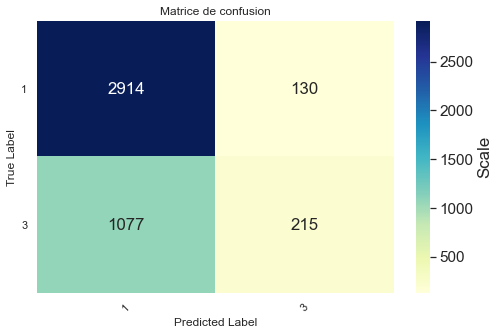

In [20]:
#from sklearn import metrics


y_pred = pipe.predict(X_test)

MyshowAllScores(y_test,y_pred)


### Tester la crosse validation 

In [21]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)


scoring = 'accuracy'


score = cross_val_score(pipe, X, y, cv=k_fold, scoring=scoring)
print('Les différentes accuracy pour les 10 évaluations sont',score,'\n')
print ('Accuracy moyenne : ',score.mean(),' standard deviation', score.std())   

Les différentes accuracy pour les 10 évaluations sont [0.73029046 0.72337483 0.70519031 0.71349481 0.71626298 0.70865052
 0.72525952 0.74048443 0.72041522 0.71072664] 

Accuracy moyenne :  0.7194149712606546  standard deviation 0.01025535323307757


### Tester l'accuracy de plusieurs classifieur 

paramétrage par defaut des classifieurs 

In [14]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# selection des données
X=dfVF.text
y=dfVF.truthRating

count_vect = CountVectorizer()
datatarget = dfVF['truthRating']

print(datatarget.shape)

X_train_counts = count_vect.fit_transform(dfVF.text)
print(X_train_counts.shape)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

seed=7
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='lbfgs',max_iter = 20000)
        ]

params = {
            models[0]:{},
    
            models[1]:{},
    
            models[2]:{},
    
            models[3]:{},
    
            models[4]:{},
    
            models[5]:{}
         }

y_test = 0
test_scores = []


for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                       refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    
    print("scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(X_test)
    

(14452,)
(14452, 12746)
(14452, 12746)
ADB
scores: 0.6844290657439446
GBC
scores: 0.6858131487889274
RFC
scores: 0.6740484429065744
KNC
scores: 0.6113033448673588
SVC
scores: 0.6883506343713955
logisticRegression
scores: 0.6934256055363323


In [13]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer


text_normalizer=TextNormalizer(lowercase=True,
                               removestopwords=True,
                               removedigit=True,
                              getstemmer=True)  
# d'appliquer fit.transform pour appliquer les pré-traitements
dfVF.text=text_normalizer.fit_transform(dfVF.text)
# selection des données
X=dfVF.text
y=dfVF.truthRating

count_vect = CountVectorizer()
datatarget = dfVF['truthRating']

print(datatarget.shape)

X_train_counts = count_vect.fit_transform(dfVF.text)
print(X_train_counts.shape)

tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
X_train_tf = tf_transformer.transform(X_train_counts)
print(X_train_tf.shape)

validation_size=0.3 #30% du jeu de données pour le test
testsize= 1-validation_size
seed=30

X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                               datatarget, 
                                               train_size=validation_size, 
                                               random_state=seed,
                                               test_size=testsize)

seed=7
models = [
            'ADB',
            'GBC',
            'RFC',
            'KNC',
            'SVC',
            'logisticRegression'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        SVC(random_state=seed,probability=True),
        LogisticRegression(solver='lbfgs',max_iter = 20000)
        ]

params = {
            models[0]:{},
    
            models[1]:{},
    
            models[2]:{},
    
            models[3]:{},
    
            models[4]:{},
    
            models[5]:{}
         }

y_test = 0
test_scores = []


for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                       refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    
    print("scores: " + str(clf.best_score_))
    estimates = clf.predict_proba(X_test)
    

(14452,)
(14452, 12746)
(14452, 12746)
ADB
scores: 0.6844290657439446
GBC
scores: 0.6858131487889274
RFC
scores: 0.6740484429065744
KNC
scores: 0.6113033448673588
SVC
scores: 0.6883506343713955
logisticRegression
scores: 0.6934256055363323


# Tache 2 : VRAIS, FAUX / MIXTURE

#  classification sans prétraitement


Nous avons crée une fonction qui permet d'effectuer une classification multi features et multi classifieurs qui permet de retourner le meilleur score ainsi que les meilleurs paramétres

In [10]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
def classification_sans_pretraitement(features,dfVF_M):
        
        # selection des données
        X=dfVF_M[features].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1
)

        count_vect = CountVectorizer()
        datatarget = dfVF_M['truthRating']

        print(datatarget.shape)

        X_train_counts = count_vect.fit_transform(X)
        print(X_train_counts.shape)

        tf_transformer = TfidfTransformer(use_idf=True).fit(X_train_counts)
        X_train_tf = tf_transformer.transform(X_train_counts)
        print(X_train_tf.shape)

        validation_size=0.3 #30% du jeu de données pour le test
        testsize= 1-validation_size
        seed=30

        X_train,X_test,y_train,y_test=train_test_split(X_train_tf, 
                                                datatarget, 
                                                train_size=validation_size, 
                                                random_state=seed,
                                                test_size=testsize)
        seed=1
        models = [
                'ADB',
                'GBC',
                'RFC',
                'logisticRegression',
                'SVM'
                ]
        clfs = [
                AdaBoostClassifier(random_state=seed),
                GradientBoostingClassifier(random_state=seed),
                RandomForestClassifier(random_state=seed,n_jobs=-1),
                LogisticRegression(solver='newton-cg', multi_class='multinomial'),
                SVC()
                ]

        params = {
                models[0]:{'learning_rate':[ 0.3], 'n_estimators':[200]},
                models[1]:{'learning_rate':[0.3],'n_estimators':[100,200], 'max_depth':[3],
                         'min_samples_split':[2],'min_samples_leaf': [2]},
                models[2]:{'n_estimators':[200], 'criterion':['gini'],'min_samples_split':[2],
                        'min_samples_leaf': [2]},
                models[3]: {'C':[1000,2000], 'tol': [0.0001,0.001]},
                models[4]: {'C': [1, 10],
                       'gamma' : [1],
                       'kernel': ['linear']}
                }

        bestScore=0
        Algo = []
        for name, estimator in zip(models,clfs):
                print(name)
                clf = GridSearchCV(estimator, params[name], scoring='accuracy',
                                refit='True', n_jobs=-1, cv=5)
                clf.fit(X_train, y_train)

                print("best params: " + str(clf.best_params_))
                print("best scores: " + str(clf.best_score_))
                if clf.best_score_ > bestScore:
                    bestScore = clf.best_score_
                    Algo=[]
                    Algo.append(features)
                    Algo.append(name)
                    Algo.append(bestScore)
                    Algo.append(clf.best_params_)
                y_pred = clf.best_estimator_.predict(X_test)
                MyshowAllScores(y_test,y_pred)
        
        return Algo

En utilisent text claims comme jeu de donnée
(24452,)
(24452, 22754)
(24452, 22754)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.6391274710293116
Accuracy : 0.646
Classification Report
              precision    recall  f1-score   support

           0    0.61027   0.37461   0.46424      7010
           1    0.65787   0.83408   0.73557     10107

    accuracy                        0.64591     17117
   macro avg    0.63407   0.60434   0.59991     17117
weighted avg    0.63838   0.64591   0.62445     17117



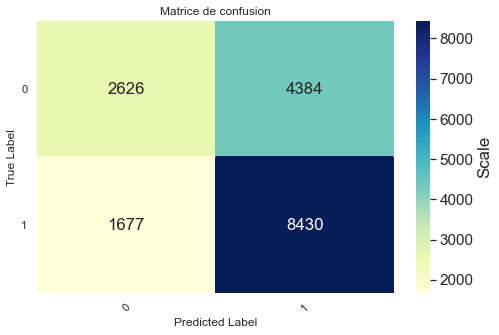

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6451261077027948
Accuracy : 0.646
Classification Report
              precision    recall  f1-score   support

           0    0.60017   0.40856   0.48617      7010
           1    0.66416   0.81122   0.73036     10107

    accuracy                        0.64632     17117
   macro avg    0.63216   0.60989   0.60826     17117
weighted avg    0.63795   0.64632   0.63035     17117



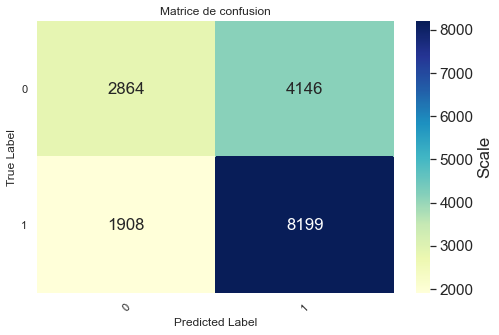

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6599863667348329
Accuracy : 0.654
Classification Report
              precision    recall  f1-score   support

           0    0.60500   0.44836   0.51503      7010
           1    0.67564   0.79697   0.73131     10107

    accuracy                        0.65420     17117
   macro avg    0.64032   0.62267   0.62317     17117
weighted avg    0.64671   0.65420   0.64274     17117



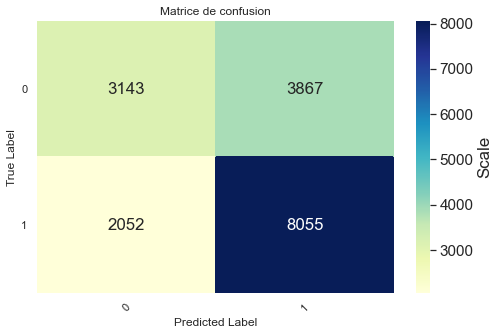

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.623858214042263
Accuracy : 0.613
Classification Report
              precision    recall  f1-score   support

           0    0.52839   0.50713   0.51754      7010
           1    0.66744   0.68606   0.67662     10107

    accuracy                        0.61278     17117
   macro avg    0.59791   0.59660   0.59708     17117
weighted avg    0.61049   0.61278   0.61147     17117



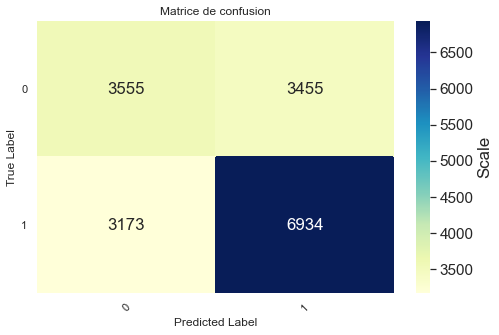

SVM
best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best scores: 0.6702113156100886
Accuracy : 0.664
Classification Report
              precision    recall  f1-score   support

           0    0.60270   0.52867   0.56326      7010
           1    0.69876   0.75829   0.72731     10107

    accuracy                        0.66425     17117
   macro avg    0.65073   0.64348   0.64529     17117
weighted avg    0.65942   0.66425   0.66013     17117



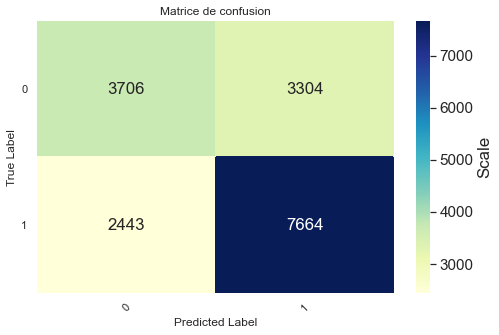

En utilisent source et text claims comme jeu de donnée
(24452,)
(24452, 22758)
(24452, 22758)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.6631220177232447
Accuracy : 0.664
Classification Report
              precision    recall  f1-score   support

           0    0.57189   0.71270   0.63457      7010
           1    0.75969   0.62996   0.68877     10107

    accuracy                        0.66384     17117
   macro avg    0.66579   0.67133   0.66167     17117
weighted avg    0.68278   0.66384   0.66658     17117



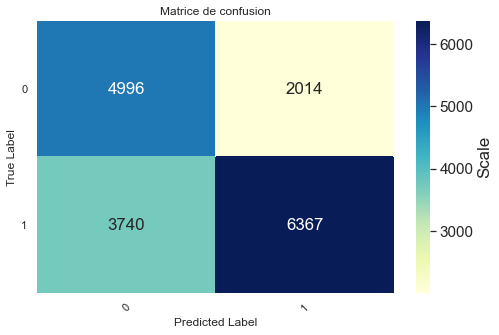

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6587593728698024
Accuracy : 0.656
Classification Report
              precision    recall  f1-score   support

           0    0.57593   0.60542   0.59031      7010
           1    0.71625   0.69081   0.70330     10107

    accuracy                        0.65584     17117
   macro avg    0.64609   0.64811   0.64680     17117
weighted avg    0.65878   0.65584   0.65702     17117



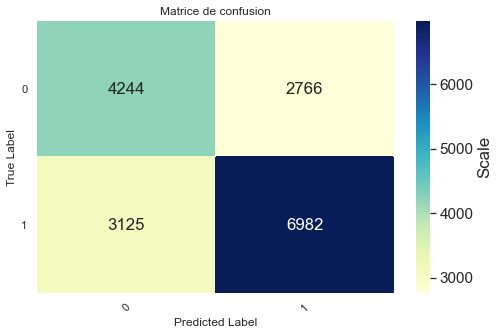

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6841172460804362
Accuracy : 0.677
Classification Report
              precision    recall  f1-score   support

           0    0.60745   0.59800   0.60269      7010
           1    0.72416   0.73197   0.72804     10107

    accuracy                        0.67710     17117
   macro avg    0.66580   0.66499   0.66537     17117
weighted avg    0.67636   0.67710   0.67671     17117



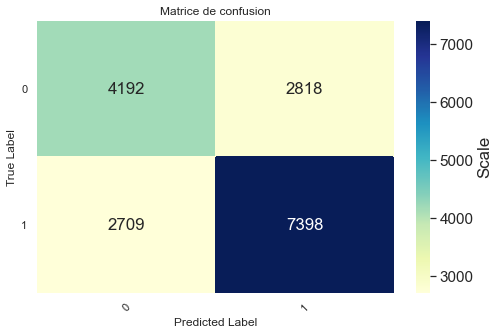

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6362644853442398
Accuracy : 0.624
Classification Report
              precision    recall  f1-score   support

           0    0.54221   0.51854   0.53012      7010
           1    0.67589   0.69635   0.68596     10107

    accuracy                        0.62353     17117
   macro avg    0.60905   0.60745   0.60804     17117
weighted avg    0.62114   0.62353   0.62214     17117



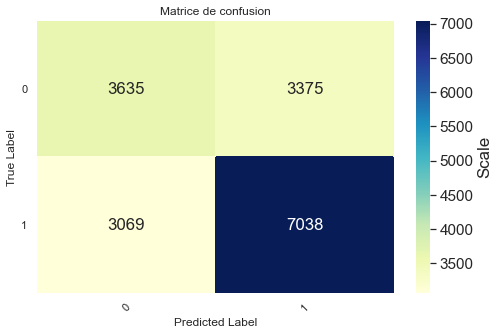

SVM
best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best scores: 0.6861622358554873
Accuracy : 0.666
Classification Report
              precision    recall  f1-score   support

           0    0.59315   0.59044   0.59179      7010
           1    0.71684   0.71911   0.71797     10107

    accuracy                        0.66641     17117
   macro avg    0.65499   0.65477   0.65488     17117
weighted avg    0.66618   0.66641   0.66630     17117



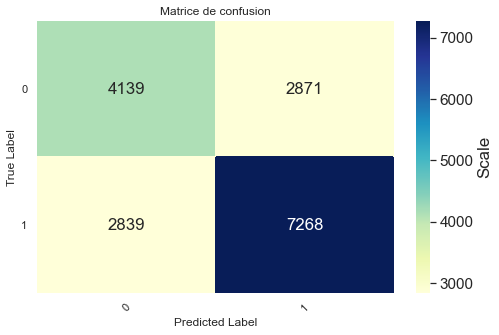

En utilisent text claims et author comme jeu de donnée
(24452,)
(24452, 24491)
(24452, 24491)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.6808452624403545
Accuracy : 0.685
Classification Report
              precision    recall  f1-score   support

           0    0.59352   0.73466   0.65659      7010
           1    0.77962   0.65103   0.70955     10107

    accuracy                        0.68528     17117
   macro avg    0.68657   0.69285   0.68307     17117
weighted avg    0.70341   0.68528   0.68786     17117



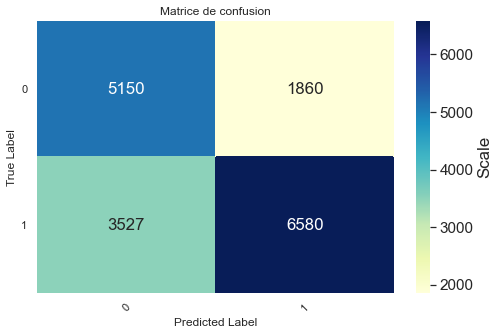

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6819359236537151
Accuracy : 0.685
Classification Report
              precision    recall  f1-score   support

           0    0.59513   0.71840   0.65098      7010
           1    0.77192   0.66103   0.71218     10107

    accuracy                        0.68452     17117
   macro avg    0.68353   0.68971   0.68158     17117
weighted avg    0.69952   0.68452   0.68712     17117



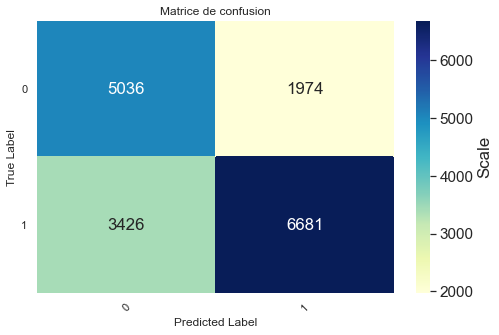

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6846625766871165
Accuracy : 0.679
Classification Report
              precision    recall  f1-score   support

           0    0.62188   0.55064   0.58410      7010
           1    0.71127   0.76778   0.73845     10107

    accuracy                        0.67886     17117
   macro avg    0.66658   0.65921   0.66127     17117
weighted avg    0.67466   0.67886   0.67524     17117



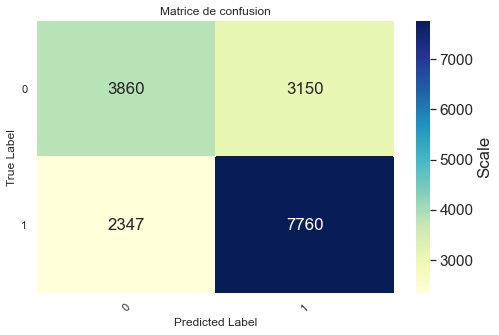

logisticRegression
best params: {'C': 1000, 'tol': 0.001}
best scores: 0.6417177914110429
Accuracy : 0.635
Classification Report
              precision    recall  f1-score   support

           0    0.55767   0.52967   0.54331      7010
           1    0.68477   0.70862   0.69649     10107

    accuracy                        0.63533     17117
   macro avg    0.62122   0.61914   0.61990     17117
weighted avg    0.63272   0.63533   0.63376     17117



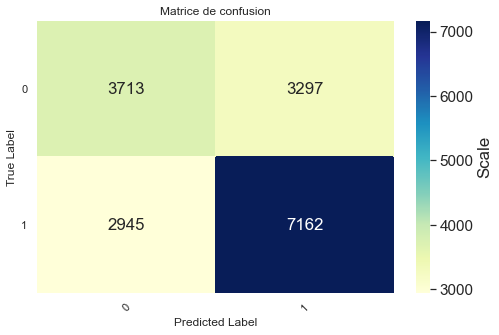

SVM
best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best scores: 0.687252897068848
Accuracy : 0.682
Classification Report
              precision    recall  f1-score   support

           0    0.61298   0.60756   0.61026      7010
           1    0.72947   0.73395   0.73170     10107

    accuracy                        0.68219     17117
   macro avg    0.67123   0.67075   0.67098     17117
weighted avg    0.68177   0.68219   0.68197     17117



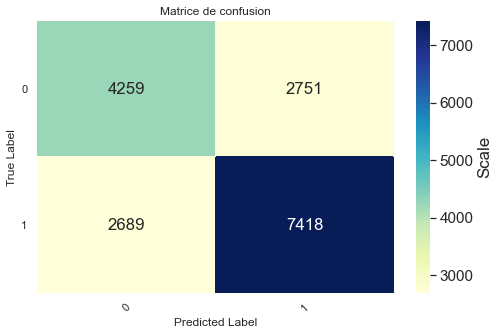

En utilisent text claims, headline et author comme jeu de donnée
(24452,)
(24452, 26782)
(24452, 26782)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7015678254942059
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61829   0.70613   0.65930      7010
           1    0.77390   0.69764   0.73379     10107

    accuracy                        0.70112     17117
   macro avg    0.69609   0.70188   0.69654     17117
weighted avg    0.71017   0.70112   0.70328     17117



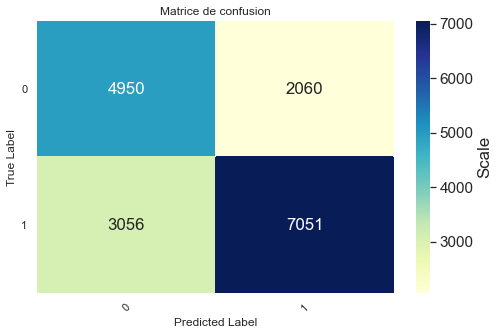

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6958418541240626
Accuracy : 0.693
Classification Report
              precision    recall  f1-score   support

           0    0.61204   0.68459   0.64629      7010
           1    0.76164   0.69902   0.72899     10107

    accuracy                        0.69311     17117
   macro avg    0.68684   0.69181   0.68764     17117
weighted avg    0.70038   0.69311   0.69512     17117



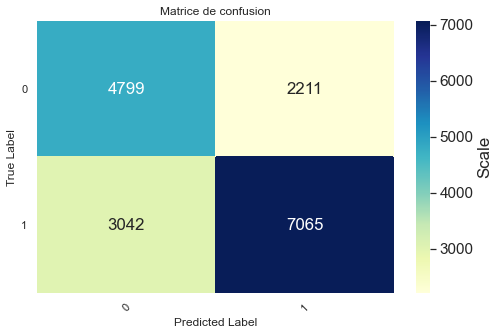

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.6991138377641446
Accuracy : 0.695
Classification Report
              precision    recall  f1-score   support

           0    0.63804   0.58816   0.61208      7010
           1    0.72905   0.76858   0.74829     10107

    accuracy                        0.69469     17117
   macro avg    0.68354   0.67837   0.68019     17117
weighted avg    0.69178   0.69469   0.69251     17117



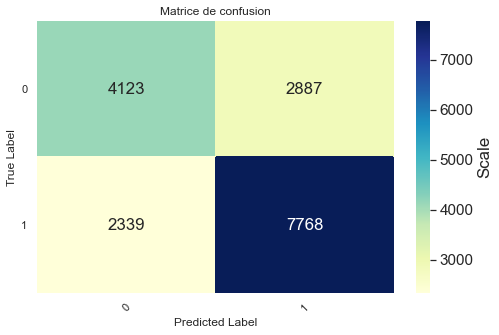

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6413087934560326
Accuracy : 0.651
Classification Report
              precision    recall  f1-score   support

           0    0.57947   0.53780   0.55786      7010
           1    0.69466   0.72930   0.71156     10107

    accuracy                        0.65087     17117
   macro avg    0.63706   0.63355   0.63471     17117
weighted avg    0.64748   0.65087   0.64861     17117



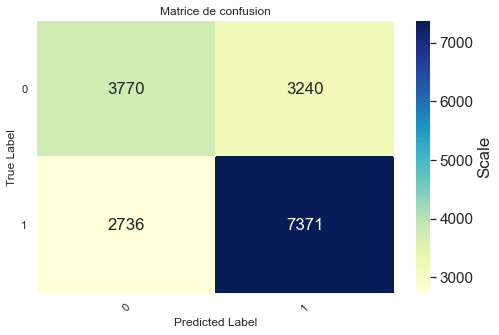

SVM
best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best scores: 0.6914792092706203
Accuracy : 0.694
Classification Report
              precision    recall  f1-score   support

           0    0.63388   0.59572   0.61421      7010
           1    0.73084   0.76135   0.74578     10107

    accuracy                        0.69352     17117
   macro avg    0.68236   0.67854   0.68000     17117
weighted avg    0.69113   0.69352   0.69190     17117



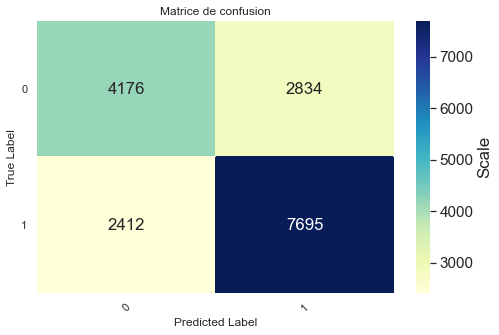

En utilisent text claims, headline, author et named_entities_article comme jeu de donnée
(15340,)
(15340, 22495)
(15340, 22495)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7049140820469245
Accuracy : 0.712
Classification Report
              precision    recall  f1-score   support

           0    0.60728   0.65855   0.63188      4027
           1    0.78418   0.74445   0.76380      6711

    accuracy                        0.71224     10738
   macro avg    0.69573   0.70150   0.69784     10738
weighted avg    0.71784   0.71224   0.71433     10738



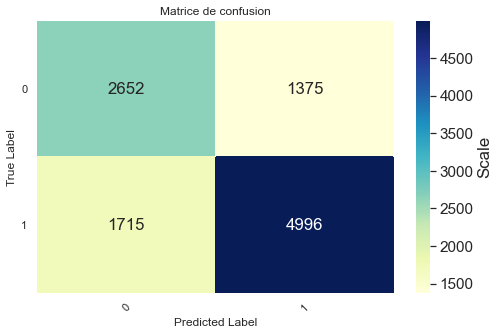

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.6962174857196809
Accuracy : 0.711
Classification Report
              precision    recall  f1-score   support

           0    0.61215   0.62553   0.61877      4027
           1    0.77231   0.76218   0.76721      6711

    accuracy                        0.71093     10738
   macro avg    0.69223   0.69385   0.69299     10738
weighted avg    0.71225   0.71093   0.71154     10738



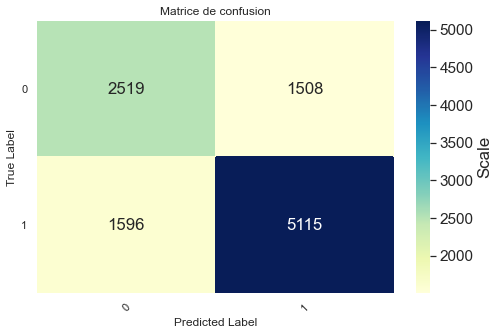

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.7079559080394655
Accuracy : 0.707
Classification Report
              precision    recall  f1-score   support

           0    0.64596   0.48299   0.55271      4027
           1    0.73056   0.84116   0.78196      6711

    accuracy                        0.70684     10738
   macro avg    0.68826   0.66207   0.66734     10738
weighted avg    0.69883   0.70684   0.69599     10738



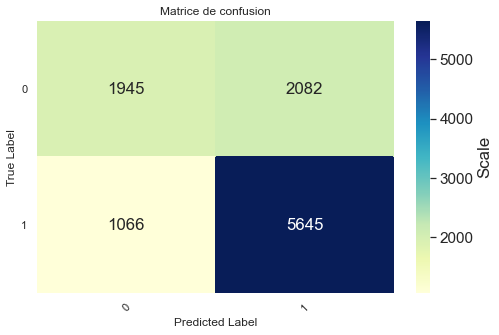

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6833989519898032
Accuracy : 0.672
Classification Report
              precision    recall  f1-score   support

           0    0.56890   0.51974   0.54321      4027
           1    0.72602   0.76367   0.74437      6711

    accuracy                        0.67219     10738
   macro avg    0.64746   0.64171   0.64379     10738
weighted avg    0.66710   0.67219   0.66893     10738



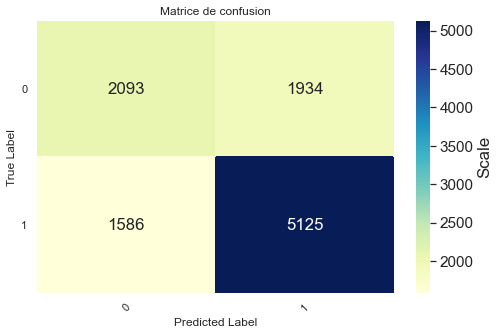

SVM
best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best scores: 0.7066496719067177
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61712   0.53514   0.57321      4027
           1    0.74165   0.80077   0.77008      6711

    accuracy                        0.70115     10738
   macro avg    0.67939   0.66796   0.67165     10738
weighted avg    0.69495   0.70115   0.69625     10738



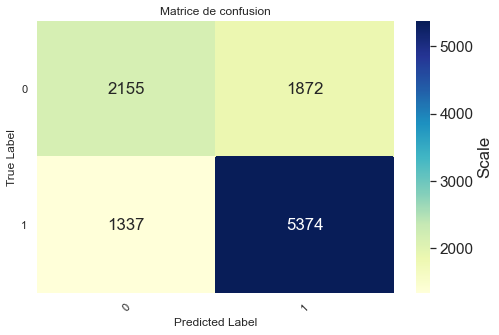

En utilisent text claims, headline, author,keywords et named_entities_article comme jeu de donnée
(14401,)
(14401, 22771)
(14401, 22771)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.7034722222222222
Accuracy : 0.699
Classification Report
              precision    recall  f1-score   support

           0    0.59600   0.67474   0.63293      3883
           1    0.77784   0.71346   0.74426      6198

    accuracy                        0.69854     10081
   macro avg    0.68692   0.69410   0.68859     10081
weighted avg    0.70780   0.69854   0.70137     10081



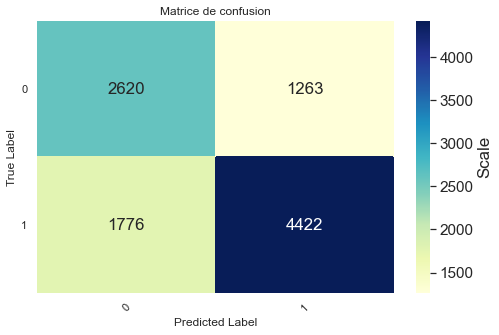

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.701388888888889
Accuracy : 0.699
Classification Report
              precision    recall  f1-score   support

           0    0.60590   0.62400   0.61482      3883
           1    0.75995   0.74572   0.75277      6198

    accuracy                        0.69884     10081
   macro avg    0.68292   0.68486   0.68379     10081
weighted avg    0.70061   0.69884   0.69963     10081



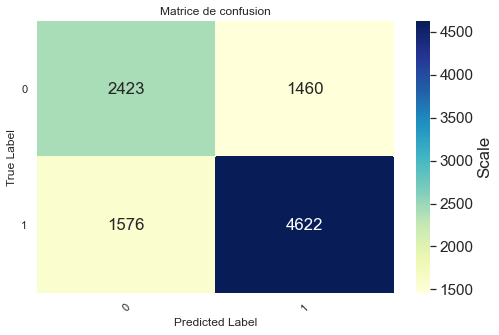

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.7122685185185185
Accuracy : 0.709
Classification Report
              precision    recall  f1-score   support

           0    0.63613   0.57044   0.60149      3883
           1    0.74723   0.79558   0.77065      6198

    accuracy                        0.70886     10081
   macro avg    0.69168   0.68301   0.68607     10081
weighted avg    0.70444   0.70886   0.70549     10081



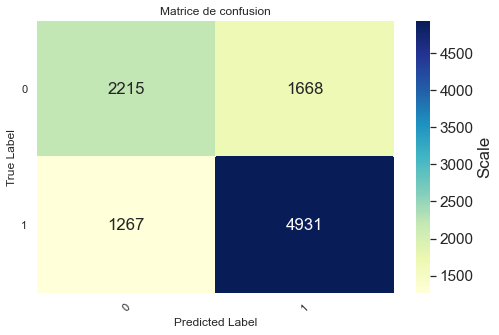

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6837962962962962
Accuracy : 0.677
Classification Report
              precision    recall  f1-score   support

           0    0.58787   0.53927   0.56253      3883
           1    0.72557   0.76315   0.74389      6198

    accuracy                        0.67692     10081
   macro avg    0.65672   0.65121   0.65321     10081
weighted avg    0.67253   0.67692   0.67403     10081



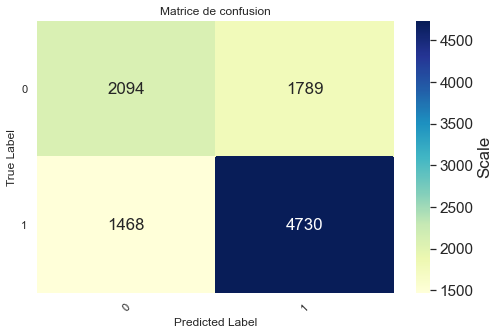

SVM
best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best scores: 0.7085648148148149
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.62464   0.56013   0.59063      3883
           1    0.74117   0.78913   0.76440      6198

    accuracy                        0.70092     10081
   macro avg    0.68291   0.67463   0.67751     10081
weighted avg    0.69629   0.70092   0.69747     10081



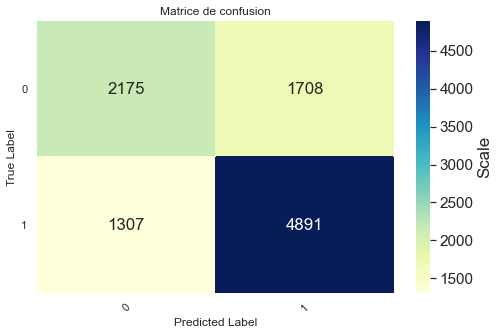

En utilisent text claims,source, headline, author,keywords et named_entities_article comme jeu de donnée
(14401,)
(14401, 22773)
(14401, 22773)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.701388888888889
Accuracy : 0.702
Classification Report
              precision    recall  f1-score   support

           0    0.59995   0.68169   0.63822      3883
           1    0.78197   0.71523   0.74711      6198

    accuracy                        0.70231     10081
   macro avg    0.69096   0.69846   0.69266     10081
weighted avg    0.71186   0.70231   0.70517     10081



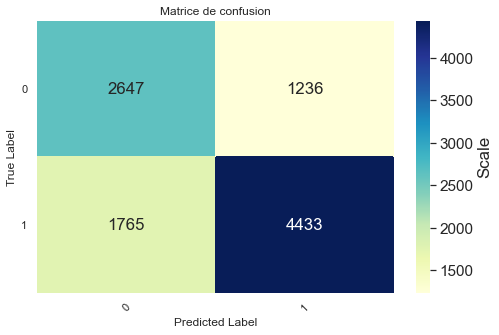

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.701851851851852
Accuracy : 0.699
Classification Report
              precision    recall  f1-score   support

           0    0.61421   0.58795   0.60079      3883
           1    0.74859   0.76864   0.75848      6198

    accuracy                        0.69904     10081
   macro avg    0.68140   0.67829   0.67963     10081
weighted avg    0.69682   0.69904   0.69774     10081



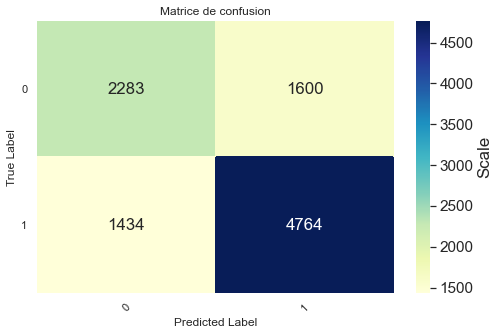

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.7210648148148149
Accuracy : 0.715
Classification Report
              precision    recall  f1-score   support

           0    0.62606   0.64718   0.63644      3883
           1    0.77419   0.75783   0.76592      6198

    accuracy                        0.71521     10081
   macro avg    0.70012   0.70250   0.70118     10081
weighted avg    0.71713   0.71521   0.71605     10081



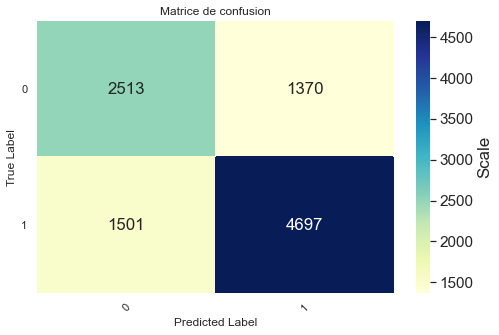

logisticRegression
best params: {'C': 1000, 'tol': 0.001}
best scores: 0.6854166666666667
Accuracy : 0.677
Classification Report
              precision    recall  f1-score   support

           0    0.58784   0.54030   0.56307      3883
           1    0.72589   0.76267   0.74382      6198

    accuracy                        0.67702     10081
   macro avg    0.65687   0.65148   0.65345     10081
weighted avg    0.67272   0.67702   0.67420     10081



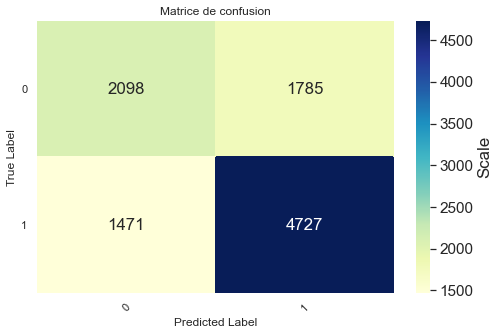

SVM
best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best scores: 0.7085648148148148
Accuracy : 0.702
Classification Report
              precision    recall  f1-score   support

           0    0.62301   0.57584   0.59850      3883
           1    0.74630   0.78170   0.76359      6198

    accuracy                        0.70241     10081
   macro avg    0.68466   0.67877   0.68105     10081
weighted avg    0.69881   0.70241   0.70000     10081



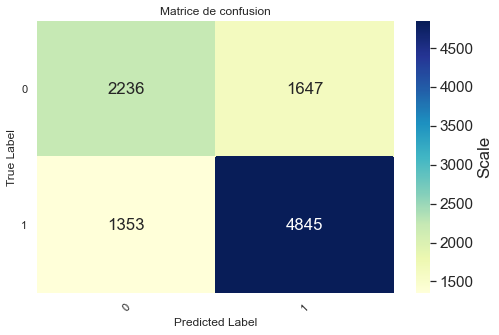

En utilisent text claims, headline, author,keywords,named_entities_claim et named_entities_article comme jeu de donnée
(14396,)
(14396, 40890)
(14396, 40890)
ADB
best params: {'learning_rate': 0.3, 'n_estimators': 200}
best scores: 0.6936089116346936
Accuracy : 0.705
Classification Report
              precision    recall  f1-score   support

           0    0.61537   0.62503   0.62016      3883
           1    0.76263   0.75513   0.75886      6195

    accuracy                        0.70500     10078
   macro avg    0.68900   0.69008   0.68951     10078
weighted avg    0.70589   0.70500   0.70542     10078



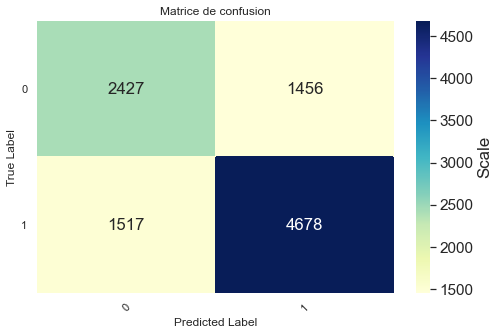

GBC
best params: {'learning_rate': 0.3, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.7012494098965709
Accuracy : 0.703
Classification Report
              precision    recall  f1-score   support

           0    0.62493   0.57584   0.59938      3883
           1    0.74662   0.78337   0.76455      6195

    accuracy                        0.70341     10078
   macro avg    0.68577   0.67961   0.68197     10078
weighted avg    0.69973   0.70341   0.70091     10078



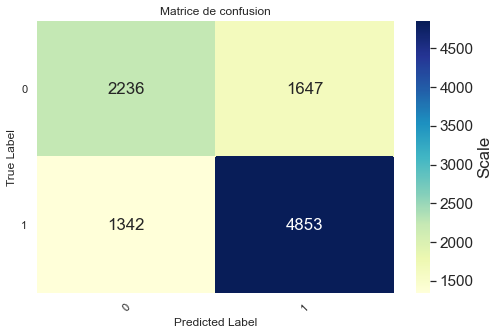

RFC
best params: {'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
best scores: 0.7040290652761684
Accuracy : 0.709
Classification Report
              precision    recall  f1-score   support

           0    0.65318   0.52382   0.58139      3883
           1    0.73449   0.82567   0.77741      6195

    accuracy                        0.70937     10078
   macro avg    0.69384   0.67474   0.67940     10078
weighted avg    0.70316   0.70937   0.70189     10078



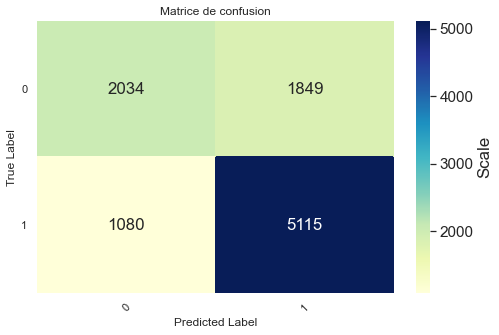

logisticRegression
best params: {'C': 1000, 'tol': 0.0001}
best scores: 0.6854984764602378
Accuracy : 0.689
Classification Report
              precision    recall  f1-score   support

           0    0.60816   0.54159   0.57295      3883
           1    0.73112   0.78128   0.75536      6195

    accuracy                        0.68893     10078
   macro avg    0.66964   0.66143   0.66416     10078
weighted avg    0.68374   0.68893   0.68508     10078



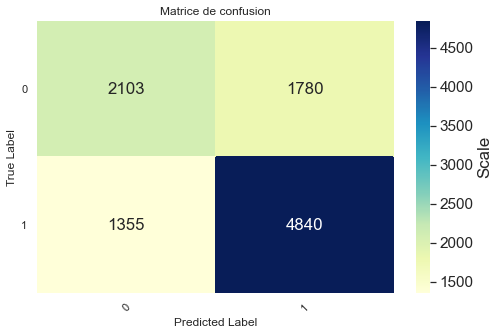

SVM
best params: {'C': 1, 'gamma': 1, 'kernel': 'linear'}
best scores: 0.7012502145830651
Accuracy : 0.707
Classification Report
              precision    recall  f1-score   support

           0    0.63391   0.56812   0.59921      3883
           1    0.74583   0.79435   0.76933      6195

    accuracy                        0.70718     10078
   macro avg    0.68987   0.68123   0.68427     10078
weighted avg    0.70271   0.70718   0.70378     10078



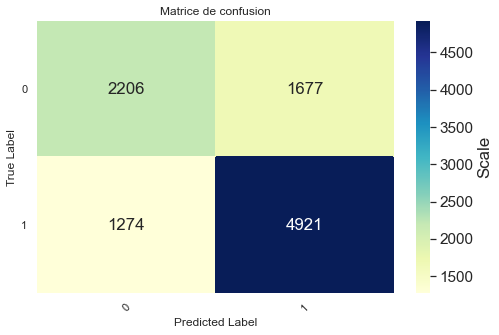

In [14]:
import numpy as np
bestScoredAlgo_sansPretraitement = []
print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_sans_pretraitement(features,dfVF_M)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent source et text claims comme jeu de donnée")
features = np.array(["text","source"])
score = classification_sans_pretraitement(features,dfVF_M)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_sans_pretraitement(features,dfVF_M)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_sans_pretraitement(features,dfVF_M)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims, headline, author et named_entities_article comme jeu de donnée")
dfn=dfVF_M.copy()
features = np.array(["text","headline","author","named_entities_article"])
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
score=classification_sans_pretraitement(features,dfn)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims, headline, author,keywords et named_entities_article comme jeu de donnée")
features = np.array(["text","headline","author","named_entities_article","keywords"])
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
score=classification_sans_pretraitement(features,dfn)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims,source, headline, author,keywords et named_entities_article comme jeu de donnée")
features = np.array(["text","source","headline","author","named_entities_article","keywords"])
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
score=classification_sans_pretraitement(features,dfn)
bestScoredAlgo_sansPretraitement.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et named_entities_article comme jeu de donnée")
dfn['named_entities_claim'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_claim'], inplace=True)
features = np.array(["text","headline","author","named_entities_article","keywords","named_entities_claim"])
score=classification_sans_pretraitement(features,dfn)
bestScoredAlgo_sansPretraitement.append(score)

In [15]:

bestScoredAlgo_sansPretraitement.sort(key=lambda x: x[2],reverse=True)
print("Le meilleur score est: "+str(bestScoredAlgo_sansPretraitement[0][2]))
print("-------------------------")
print("tri du meilleur score et meilleur algorithme de chaque features :")
for i in range(len(bestScoredAlgo_sansPretraitement)):
    print("Features :"+str(bestScoredAlgo_sansPretraitement[i][0]))
    print("Meilleur Score :"+str(bestScoredAlgo_sansPretraitement[i][2]))
    print("Générer par l'Algorithm :"+str(bestScoredAlgo_sansPretraitement[i][1]))
    print("En utilisent les meilleurs Parametres :"+str(bestScoredAlgo_sansPretraitement[i][3]))
    print("-------------------------")


Le meilleur score est: 0.7210648148148149
-------------------------
tri du meilleur score et meilleur algorithme de chaque features :
Features :['text' 'source' 'headline' 'author' 'named_entities_article' 'keywords']
Meilleur Score :0.7210648148148149
Générer par l'Algorithm :RFC
En utilisent les meilleurs Parametres :{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author' 'named_entities_article' 'keywords']
Meilleur Score :0.7122685185185185
Générer par l'Algorithm :RFC
En utilisent les meilleurs Parametres :{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author' 'named_entities_article']
Meilleur Score :0.7079559080394655
Générer par l'Algorithm :RFC
En utilisent les meilleurs Parametres :{'criterion': 'gini', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
------------


#####  Les meilleurs feature sont 'text' 'source' 'headline' 'author' 'named_entities_article' 'keywords' qui ont générer un score maximum en utilisent l'algorithme RandomForestClassifier (RFC)

#  classification avec prétraitement

In [9]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer

def classification_avec_pretraitement(features,cleaner_,dfVF_M):
        
        # selection des données
        X=dfVF_M[features].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
        y= dfVF_M['truthRating']
        validation_size=0.3 #30% du jeu de données pour le test
        testsize= 1-validation_size
        seed=30

        X_train,X_test,y_train,y_test=train_test_split(X,
                                                y, 
                                                train_size=validation_size, 
                                                random_state=seed,
                                                test_size=testsize)
        pipe = Pipeline([("cleaner", cleaner_),
                 ("tfidf_vectorizer", TfidfVectorizer(lowercase=False)),
                 ("clf", AdaBoostClassifier())]) #default Calssifier
        seed=7
        models = [
              
                'ADB',
                'GBC',
                'RFC',
                'logisticRegression',
                'SVM'
                ]
        clfs = [
                AdaBoostClassifier(random_state=seed),
                GradientBoostingClassifier(random_state=seed),
                RandomForestClassifier(random_state=seed,n_jobs=-1),
                LogisticRegression(solver='newton-cg', multi_class='multinomial'),
                SVC()
                ]

        params = {
                models[0]:{'clf__learning_rate':[ 0.3], 'clf__n_estimators':[200]},
                models[1]:{'clf__learning_rate':[0.3],'clf__n_estimators':[100,200], 'clf__max_depth':[3],
                         'clf__min_samples_split':[2],'clf__min_samples_leaf': [2]},
                models[2]:{'clf__n_estimators':[200], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                        'clf__min_samples_leaf': [2]},
                models[3]: {'clf__C':[1000,2000], 'clf__tol': [0.0001,0.001]},
                models[4]: {'clf__C': [1, 10],
                       'clf__gamma' : [1],
                       'clf__kernel': ['linear']}
                }

        bestScore=0
        Algo = []
        for name, estimator in zip(models,clfs):
                print("Alogrithm: "+name)
                pipe.set_params(clf= estimator)
                clf = GridSearchCV(pipe, params[name], scoring='accuracy',
                                refit='True', n_jobs=-1, cv=5)
                clf.fit(X_train, y_train)

                print("best params: " + str(clf.best_params_))
                print("best scores: " + str(clf.best_score_))
                if clf.best_score_ > bestScore:
                    bestScore = clf.best_score_
                    Algo=[]
                    Algo.append(features)
                    Algo.append(cleaner_)
                    Algo.append(name)
                    Algo.append(bestScore)
                    Algo.append(clf.best_params_)
                y_pred = clf.best_estimator_.predict(X_test)
                MyshowAllScores(y_test,y_pred)
        
        return Algo

### Application du prétraitement par défaut

En utilisent text claims comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6422631220177233
Accuracy : 0.645
Classification Report
              precision    recall  f1-score   support

           0    0.60718   0.37660   0.46487      7010
           1    0.65776   0.83101   0.73431     10107

    accuracy                        0.64491     17117
   macro avg    0.63247   0.60381   0.59959     17117
weighted avg    0.63705   0.64491   0.62396     17117



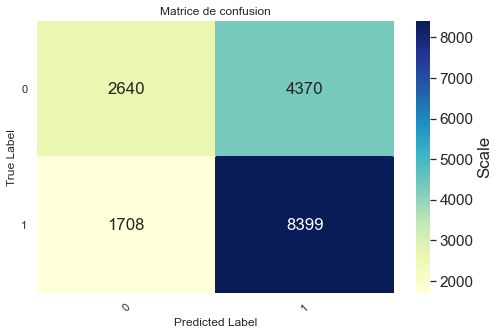

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6414451261077028
Accuracy : 0.641
Classification Report
              precision    recall  f1-score   support

           0    0.58161   0.43766   0.49947      7010
           1    0.66712   0.78164   0.71985     10107

    accuracy                        0.64077     17117
   macro avg    0.62436   0.60965   0.60966     17117
weighted avg    0.63210   0.64077   0.62960     17117



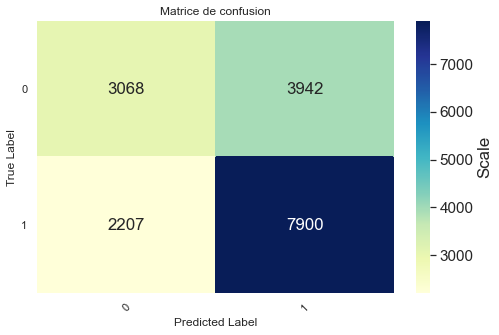

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6578050443081118
Accuracy : 0.660
Classification Report
              precision    recall  f1-score   support

           0    0.60061   0.50499   0.54867      7010
           1    0.69081   0.76709   0.72696     10107

    accuracy                        0.65975     17117
   macro avg    0.64571   0.63604   0.63781     17117
weighted avg    0.65387   0.65975   0.65394     17117



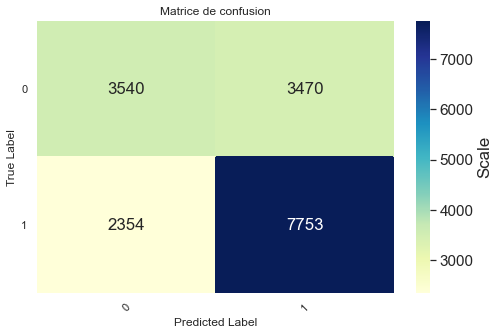

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.621676891615542
Accuracy : 0.612
Classification Report
              precision    recall  f1-score   support

           0    0.52629   0.52111   0.52369      7010
           1    0.67011   0.67468   0.67239     10107

    accuracy                        0.61179     17117
   macro avg    0.59820   0.59790   0.59804     17117
weighted avg    0.61121   0.61179   0.61149     17117



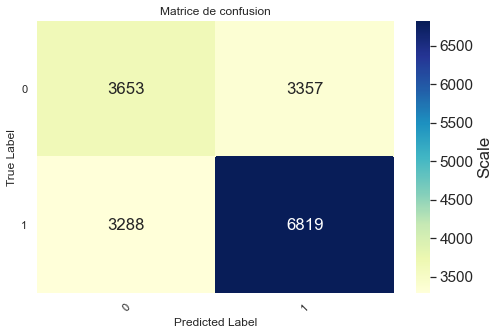

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6621676891615542
Accuracy : 0.661
Classification Report
              precision    recall  f1-score   support

           0    0.59401   0.54579   0.56888      7010
           1    0.70176   0.74127   0.72097     10107

    accuracy                        0.66121     17117
   macro avg    0.64788   0.64353   0.64493     17117
weighted avg    0.65763   0.66121   0.65869     17117



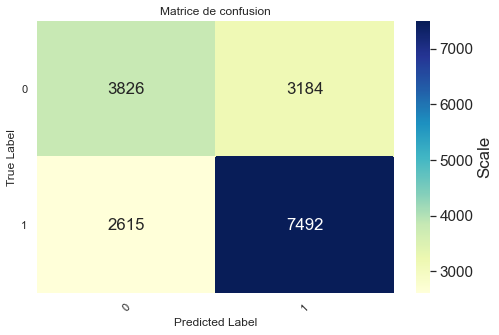

En utilisent source et text claims comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6681663258350375
Accuracy : 0.658
Classification Report
              precision    recall  f1-score   support

           0    0.56716   0.69572   0.62490      7010
           1    0.74959   0.63174   0.68564     10107

    accuracy                        0.65794     17117
   macro avg    0.65837   0.66373   0.65527     17117
weighted avg    0.67488   0.65794   0.66076     17117



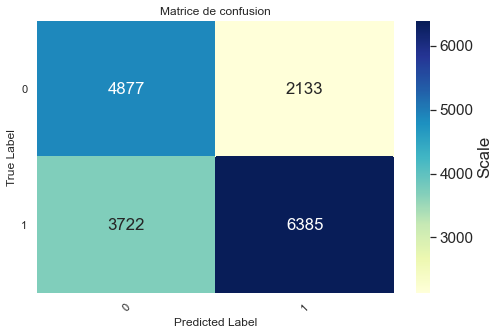

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6648943421949557
Accuracy : 0.656
Classification Report
              precision    recall  f1-score   support

           0    0.57748   0.60071   0.58887      7010
           1    0.71511   0.69516   0.70500     10107

    accuracy                        0.65648     17117
   macro avg    0.64630   0.64794   0.64693     17117
weighted avg    0.65875   0.65648   0.65744     17117



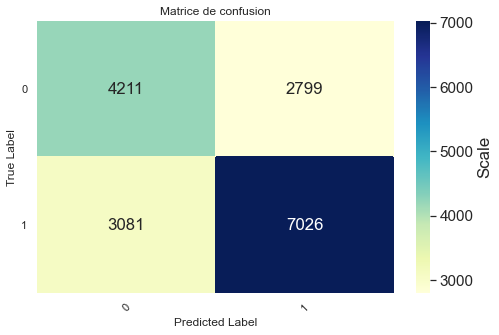

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6843899113837765
Accuracy : 0.678
Classification Report
              precision    recall  f1-score   support

           0    0.60304   0.62282   0.61277      7010
           1    0.73231   0.71564   0.72388     10107

    accuracy                        0.67763     17117
   macro avg    0.66767   0.66923   0.66833     17117
weighted avg    0.67937   0.67763   0.67838     17117



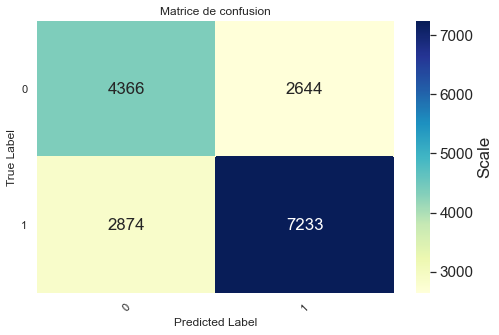

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6338104976141785
Accuracy : 0.622
Classification Report
              precision    recall  f1-score   support

           0    0.53922   0.53352   0.53635      7010
           1    0.67881   0.68378   0.68129     10107

    accuracy                        0.62225     17117
   macro avg    0.60901   0.60865   0.60882     17117
weighted avg    0.62164   0.62225   0.62193     17117



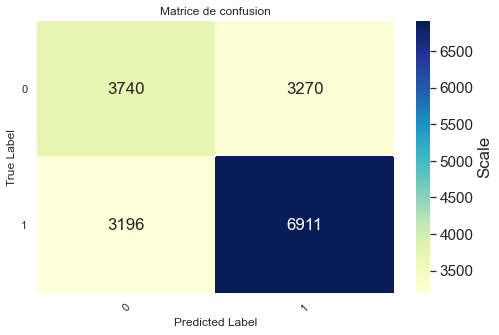

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.679890933878664
Accuracy : 0.668
Classification Report
              precision    recall  f1-score   support

           0    0.59225   0.60628   0.59918      7010
           1    0.72236   0.71050   0.71638     10107

    accuracy                        0.66782     17117
   macro avg    0.65731   0.65839   0.65778     17117
weighted avg    0.66908   0.66782   0.66838     17117



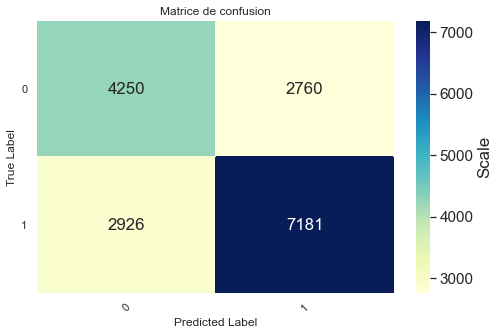

En utilisent text claims et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6805725971370145
Accuracy : 0.682
Classification Report
              precision    recall  f1-score   support

           0    0.59165   0.71926   0.64924      7010
           1    0.77103   0.65568   0.70869     10107

    accuracy                        0.68172     17117
   macro avg    0.68134   0.68747   0.67897     17117
weighted avg    0.69757   0.68172   0.68435     17117



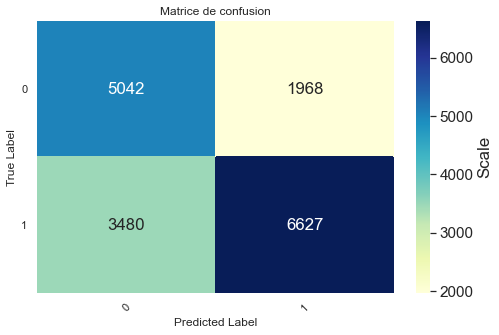

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6811179277436946
Accuracy : 0.676
Classification Report
              precision    recall  f1-score   support

           0    0.58678   0.70899   0.64212      7010
           1    0.76408   0.65371   0.70460     10107

    accuracy                        0.67635     17117
   macro avg    0.67543   0.68135   0.67336     17117
weighted avg    0.69147   0.67635   0.67901     17117



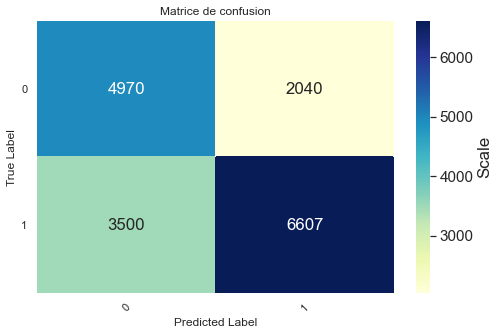

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6922972051806408
Accuracy : 0.688
Classification Report
              precision    recall  f1-score   support

           0    0.61956   0.61541   0.61748      7010
           1    0.73449   0.73790   0.73619     10107

    accuracy                        0.68774     17117
   macro avg    0.67702   0.67666   0.67683     17117
weighted avg    0.68742   0.68774   0.68757     17117



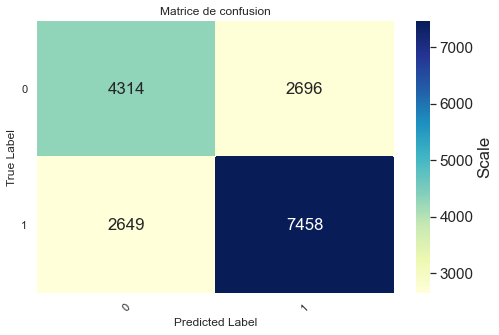

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6415814587593729
Accuracy : 0.638
Classification Report
              precision    recall  f1-score   support

           0    0.56089   0.53680   0.54858      7010
           1    0.68803   0.70852   0.69812     10107

    accuracy                        0.63820     17117
   macro avg    0.62446   0.62266   0.62335     17117
weighted avg    0.63596   0.63820   0.63688     17117



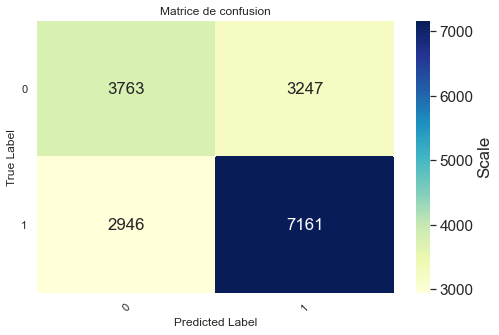

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6895705521472393
Accuracy : 0.684
Classification Report
              precision    recall  f1-score   support

           0    0.61355   0.61626   0.61490      7010
           1    0.73303   0.73078   0.73190     10107

    accuracy                        0.68388     17117
   macro avg    0.67329   0.67352   0.67340     17117
weighted avg    0.68410   0.68388   0.68399     17117



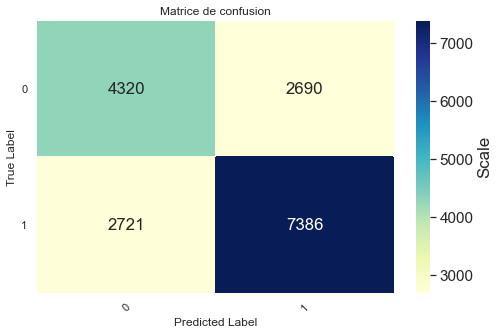

En utilisent text claims, headline et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7022494887525561
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.61730   0.71056   0.66065      7010
           1    0.77575   0.69447   0.73286     10107

    accuracy                        0.70106     17117
   macro avg    0.69653   0.70251   0.69676     17117
weighted avg    0.71086   0.70106   0.70329     17117



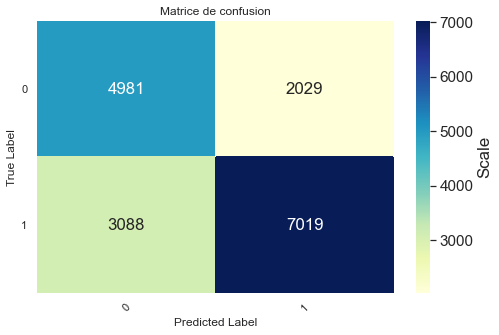

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6931152010906612
Accuracy : 0.697
Classification Report
              precision    recall  f1-score   support

           0    0.61331   0.70071   0.65410      7010
           1    0.76965   0.69358   0.72964     10107

    accuracy                        0.69650     17117
   macro avg    0.69148   0.69715   0.69187     17117
weighted avg    0.70563   0.69650   0.69870     17117



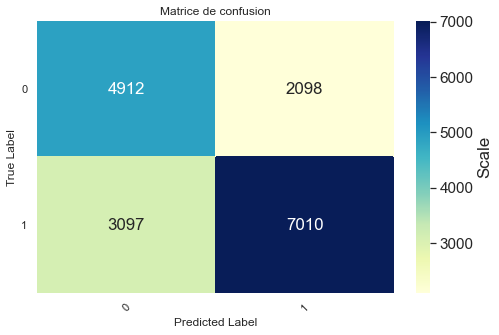

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6992501704158146
Accuracy : 0.696
Classification Report
              precision    recall  f1-score   support

           0    0.62905   0.62896   0.62900      7010
           1    0.74268   0.74275   0.74272     10107

    accuracy                        0.69615     17117
   macro avg    0.68586   0.68586   0.68586     17117
weighted avg    0.69614   0.69615   0.69615     17117



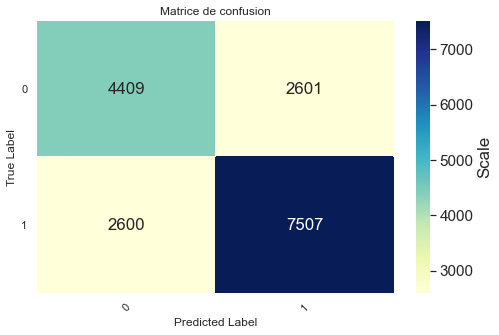

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6545330606680301
Accuracy : 0.657
Classification Report
              precision    recall  f1-score   support

           0    0.58674   0.54807   0.56675      7010
           1    0.70026   0.73226   0.71590     10107

    accuracy                        0.65683     17117
   macro avg    0.64350   0.64017   0.64133     17117
weighted avg    0.65377   0.65683   0.65482     17117



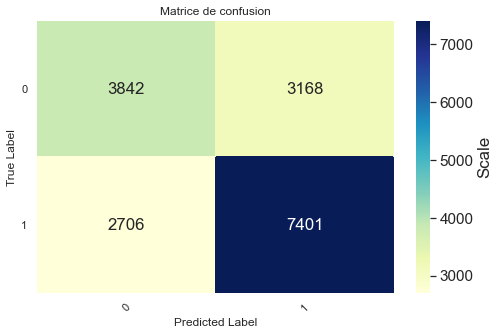

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6961145194274028
Accuracy : 0.696
Classification Report
              precision    recall  f1-score   support

           0    0.63279   0.61384   0.62317      7010
           1    0.73762   0.75294   0.74520     10107

    accuracy                        0.69597     17117
   macro avg    0.68521   0.68339   0.68419     17117
weighted avg    0.69469   0.69597   0.69523     17117



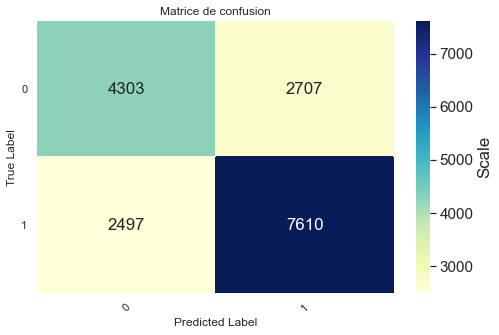

En utilisent text claims, headline, author et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7118663550960675
Accuracy : 0.713
Classification Report
              precision    recall  f1-score   support

           0    0.60912   0.65359   0.63057      4027
           1    0.78261   0.74832   0.76508      6711

    accuracy                        0.71280     10738
   macro avg    0.69586   0.70096   0.69783     10738
weighted avg    0.71755   0.71280   0.71464     10738



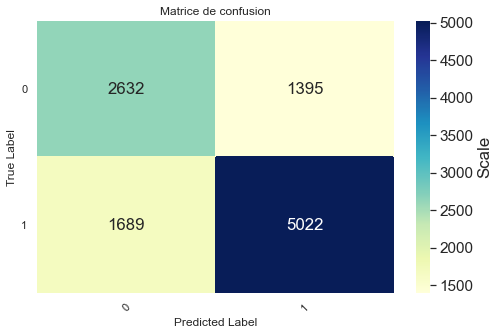

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.7144729264032479
Accuracy : 0.704
Classification Report
              precision    recall  f1-score   support

           0    0.60746   0.59871   0.60305      4027
           1    0.76126   0.76784   0.76454      6711

    accuracy                        0.70441     10738
   macro avg    0.68436   0.68328   0.68380     10738
weighted avg    0.70358   0.70441   0.70398     10738



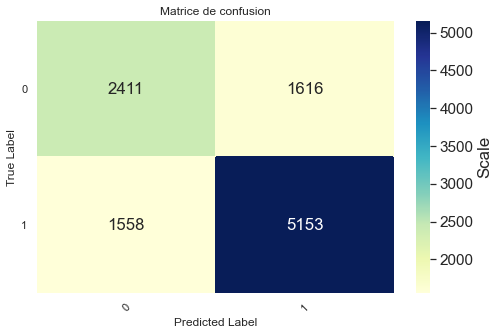

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.713385261766511
Accuracy : 0.707
Classification Report
              precision    recall  f1-score   support

           0    0.63327   0.51800   0.56987      4027
           1    0.73925   0.82000   0.77753      6711

    accuracy                        0.70674     10738
   macro avg    0.68626   0.66900   0.67370     10738
weighted avg    0.69951   0.70674   0.69965     10738



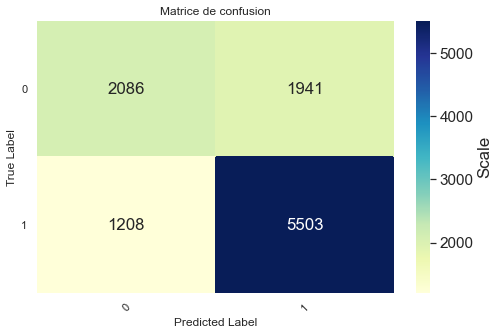

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6810109521786338
Accuracy : 0.679
Classification Report
              precision    recall  f1-score   support

           0    0.57646   0.54110   0.55822      4027
           1    0.73441   0.76144   0.74768      6711

    accuracy                        0.67880     10738
   macro avg    0.65543   0.65127   0.65295     10738
weighted avg    0.67517   0.67880   0.67663     10738



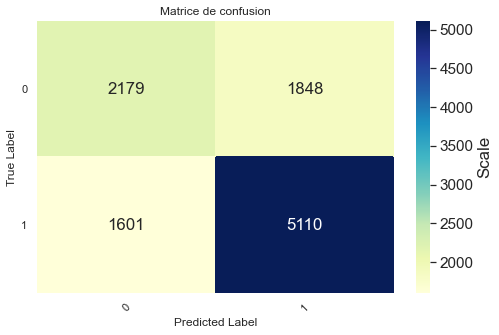

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7088226407968654
Accuracy : 0.704
Classification Report
              precision    recall  f1-score   support

           0    0.61484   0.56171   0.58708      4027
           1    0.74996   0.78885   0.76892      6711

    accuracy                        0.70367     10738
   macro avg    0.68240   0.67528   0.67800     10738
weighted avg    0.69929   0.70367   0.70072     10738



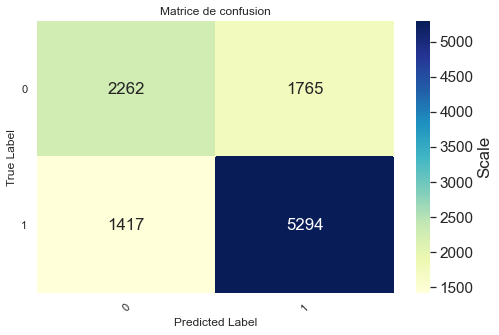

En utilisent text claims, headline, author,keywords et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.705324074074074
Accuracy : 0.708
Classification Report
              precision    recall  f1-score   support

           0    0.60918   0.67680   0.64121      3883
           1    0.78238   0.72798   0.75420      6198

    accuracy                        0.70826     10081
   macro avg    0.69578   0.70239   0.69770     10081
weighted avg    0.71567   0.70826   0.71068     10081



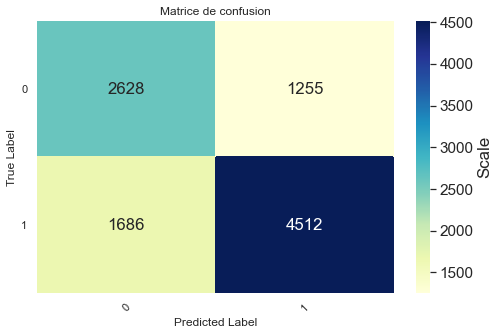

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.7034722222222223
Accuracy : 0.700
Classification Report
              precision    recall  f1-score   support

           0    0.61338   0.59979   0.60651      3883
           1    0.75271   0.76315   0.75789      6198

    accuracy                        0.70023     10081
   macro avg    0.68304   0.68147   0.68220     10081
weighted avg    0.69904   0.70023   0.69958     10081



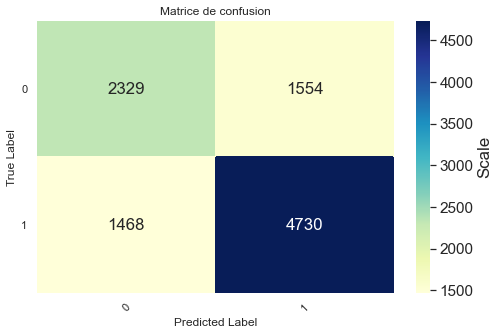

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7240740740740741
Accuracy : 0.713
Classification Report
              precision    recall  f1-score   support

           0    0.62944   0.62117   0.62528      3883
           1    0.76460   0.77089   0.76774      6198

    accuracy                        0.71322     10081
   macro avg    0.69702   0.69603   0.69651     10081
weighted avg    0.71254   0.71322   0.71286     10081



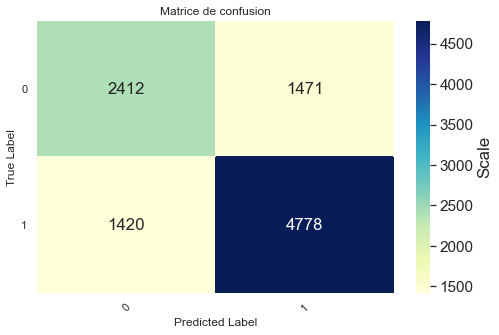

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6858796296296297
Accuracy : 0.675
Classification Report
              precision    recall  f1-score   support

           0    0.58227   0.55318   0.56735      3883
           1    0.72857   0.75137   0.73979      6198

    accuracy                        0.67503     10081
   macro avg    0.65542   0.65228   0.65357     10081
weighted avg    0.67222   0.67503   0.67337     10081



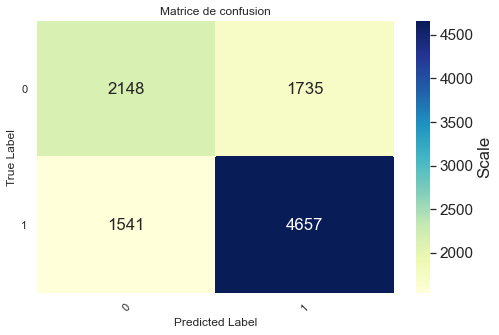

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7111111111111111
Accuracy : 0.702
Classification Report
              precision    recall  f1-score   support

           0    0.61797   0.59155   0.60447      3883
           1    0.75079   0.77089   0.76071      6198

    accuracy                        0.70182     10081
   macro avg    0.68438   0.68122   0.68259     10081
weighted avg    0.69963   0.70182   0.70053     10081



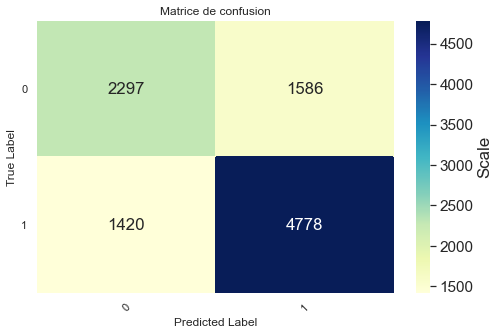

En utilisent text claims, source, headline, author, keywords et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7037037037037036
Accuracy : 0.706
Classification Report
              precision    recall  f1-score   support

           0    0.60801   0.66830   0.63673      3883
           1    0.77843   0.73007   0.75348      6198

    accuracy                        0.70628     10081
   macro avg    0.69322   0.69919   0.69510     10081
weighted avg    0.71279   0.70628   0.70851     10081



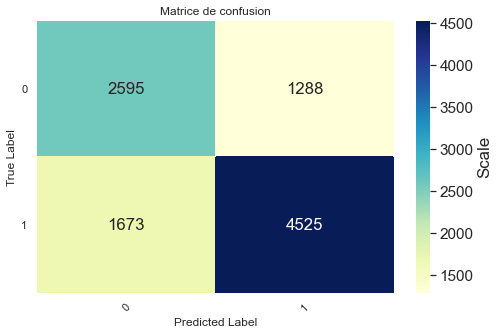

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.7041666666666667
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.60359   0.64976   0.62582      3883
           1    0.76953   0.73266   0.75064      6198

    accuracy                        0.70072     10081
   macro avg    0.68656   0.69121   0.68823     10081
weighted avg    0.70561   0.70072   0.70256     10081



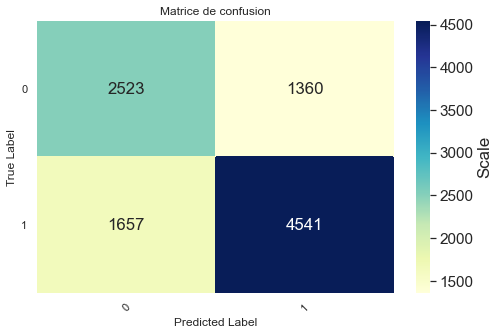

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7256944444444444
Accuracy : 0.720
Classification Report
              precision    recall  f1-score   support

           0    0.62589   0.67602   0.64999      3883
           1    0.78631   0.74685   0.76607      6198

    accuracy                        0.71957     10081
   macro avg    0.70610   0.71144   0.70803     10081
weighted avg    0.72452   0.71957   0.72136     10081



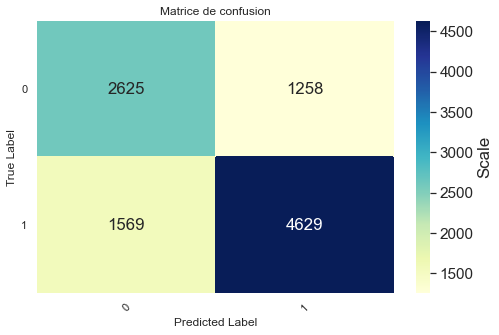

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6849537037037037
Accuracy : 0.677
Classification Report
              precision    recall  f1-score   support

           0    0.58367   0.55962   0.57139      3883
           1    0.73105   0.74992   0.74036      6198

    accuracy                        0.67662     10081
   macro avg    0.65736   0.65477   0.65588     10081
weighted avg    0.67428   0.67662   0.67528     10081



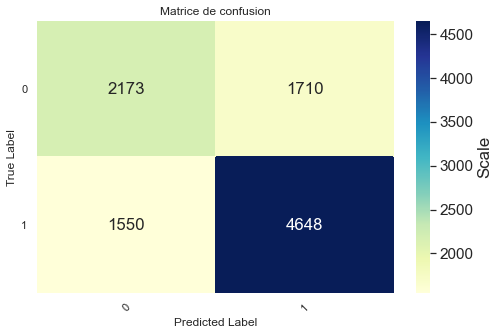

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.712037037037037
Accuracy : 0.703
Classification Report
              precision    recall  f1-score   support

           0    0.61671   0.60623   0.61143      3883
           1    0.75591   0.76396   0.75991      6198

    accuracy                        0.70320     10081
   macro avg    0.68631   0.68509   0.68567     10081
weighted avg    0.70229   0.70320   0.70272     10081



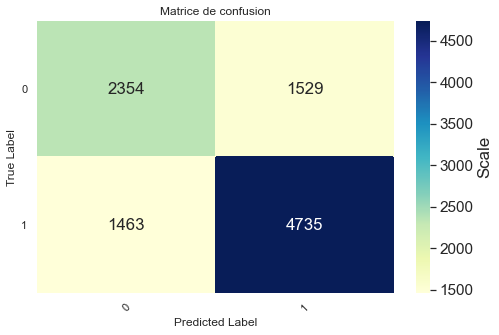

En utilisent text claims, headline, author,keywords,named_entities_claim et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6987074052615767
Accuracy : 0.706
Classification Report
              precision    recall  f1-score   support

           0    0.61428   0.63817   0.62599      3883
           1    0.76754   0.74883   0.75807      6195

    accuracy                        0.70619     10078
   macro avg    0.69091   0.69350   0.69203     10078
weighted avg    0.70849   0.70619   0.70718     10078



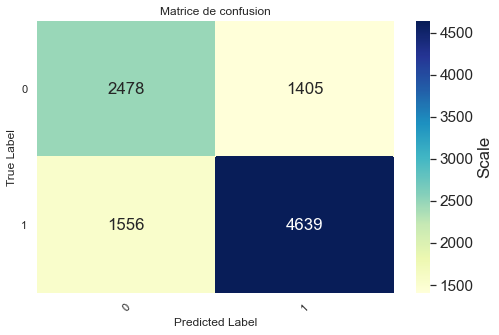

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.7024105725076177
Accuracy : 0.702
Classification Report
              precision    recall  f1-score   support

           0    0.62135   0.58022   0.60008      3883
           1    0.74737   0.77837   0.76255      6195

    accuracy                        0.70202     10078
   macro avg    0.68436   0.67930   0.68132     10078
weighted avg    0.69881   0.70202   0.69995     10078



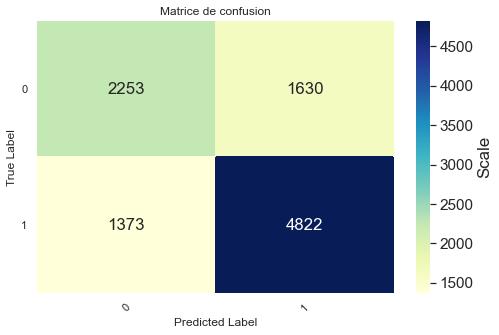

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7061115939230076
Accuracy : 0.714
Classification Report
              precision    recall  f1-score   support

           0    0.64245   0.57842   0.60875      3883
           1    0.75129   0.79822   0.77405      6195

    accuracy                        0.71353     10078
   macro avg    0.69687   0.68832   0.69140     10078
weighted avg    0.70935   0.71353   0.71036     10078



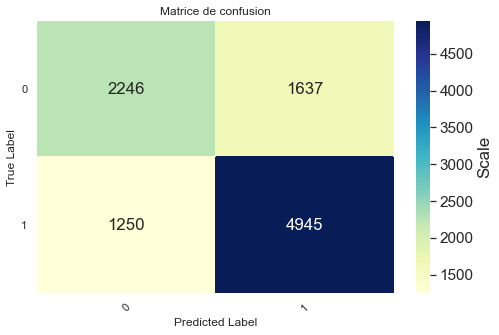

Alogrithm: logisticRegression
best params: {'clf__C': 2000, 'clf__tol': 0.001}
best scores: 0.6892072765117377
Accuracy : 0.687
Classification Report
              precision    recall  f1-score   support

           0    0.60229   0.55421   0.57725      3883
           1    0.73390   0.77062   0.75181      6195

    accuracy                        0.68724     10078
   macro avg    0.66810   0.66242   0.66453     10078
weighted avg    0.68319   0.68724   0.68455     10078



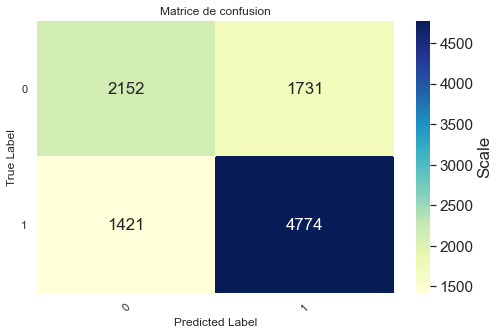

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7075055791596927
Accuracy : 0.705
Classification Report
              precision    recall  f1-score   support

           0    0.62670   0.58280   0.60395      3883
           1    0.74950   0.78241   0.76560      6195

    accuracy                        0.70550     10078
   macro avg    0.68810   0.68260   0.68477     10078
weighted avg    0.70218   0.70550   0.70332     10078



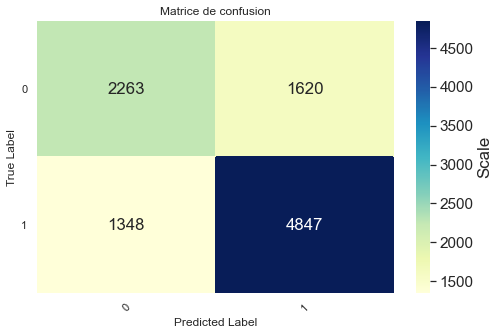

In [18]:
import numpy as np
text_normalizer = TextNormalizer()
bestScoredAlgo = []
print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M)
bestScoredAlgo.append(score)
print("En utilisent source et text claims comme jeu de donnée")
features = np.array(["source","text"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M)
bestScoredAlgo.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M)
bestScoredAlgo.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M)
bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author et named_entities_article comme jeu de donnée")
dfn=dfVF_M.copy()
features = np.array(["text","headline","author","named_entities_article"])
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
score=classification_avec_pretraitement(features,text_normalizer,dfn)
bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords et named_entities_article comme jeu de donnée")
features = np.array(["text","headline","author","named_entities_article","keywords"])
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
score=classification_avec_pretraitement(features,text_normalizer,dfn)
bestScoredAlgo.append(score)
print("En utilisent text claims, source, headline, author, keywords et named_entities_article comme jeu de donnée")
features = np.array(["text","source","headline","author","named_entities_article","keywords"])
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
score=classification_avec_pretraitement(features,text_normalizer,dfn)
bestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et named_entities_article comme jeu de donnée")
dfn['named_entities_claim'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_claim'], inplace=True)
features = np.array(["text","headline","author","named_entities_article","keywords","named_entities_claim"])
score=classification_avec_pretraitement(features,text_normalizer,dfn)
bestScoredAlgo.append(score)

In [19]:
bestScoredAlgo.sort(key=lambda x: x[3],reverse=True)
print("Le Meilleur score est: "+str(bestScoredAlgo[0][3]))
print("-------------------------")
print("tri du meilleur score et meilleur algorithme de chaque features")
for i in range(len(bestScoredAlgo)):
    print("Features :"+str(bestScoredAlgo[i][0]))
    print("Meilleur Score :"+str(bestScoredAlgo[i][3]))
    print("Générer par l'Algorithm :"+str(bestScoredAlgo[i][2]))
    print("En utilisent le meilleur Parametre :"+str(bestScoredAlgo[i][4]))
    print("-------------------------")


Le Meilleur score est: 0.7256944444444444
-------------------------
tri du meilleur score et meilleur algorithme de chaque features
Features :['text' 'source' 'headline' 'author' 'named_entities_article' 'keywords']
Meilleur Score :0.7256944444444444
Générer par l'Algorithm :RFC
En utilisent le meilleur Parametre :{'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author' 'named_entities_article' 'keywords']
Meilleur Score :0.7240740740740741
Générer par l'Algorithm :RFC
En utilisent le meilleur Parametre :{'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author' 'named_entities_article']
Meilleur Score :0.7144729264032479
Générer par l'Algorithm :GBC
En utilisent le meilleur Parametre :{'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf':

##### Nous remarquons que le meilleur Algorithme est : AdaBoostClassifier (ADB), et les meilleurs features sont 'text' 'headline' 'author' 'named_entities_article' 'keywords', c'est le meme algorithme et les memes features qu'on a trouver avant avoir effectuer le prétraitement, nous remarquons aussi que le score a augmenter 


### Application du prétraitement brut aux meilleurs algorithmes

#### Les meilleurs scores sont générer par les algorithmes SVM (SVC), GradientBoostingClassifier (GBC) et RandomForestClassifier (RFC).

In [8]:
def Classify(features,cleaner,clf,parameters,df):
    # selection des données
    X=df[features].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
    y=df.truthRating


    # Création d'un jeu d'apprentissage et de test
    trainsize=0.7 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour le test

    testsize= 0.3
    seed=30
    X_train,X_test,y_train,y_test=train_test_split(X, 
                                                   y, 
                                                   train_size=trainsize, 
                                                   random_state=seed,
                                                   test_size=testsize)

    # création du pipeline en ajoutant le classifier
    pipe = Pipeline([("cleaner", cleaner),
                     ("count_vectorizer", TfidfVectorizer()),
                     ("clf", clf)])
    score='accuracy'
    grid_search = GridSearchCV(pipe, parameters, n_jobs=-1, scoring=score)
    start_time = time.time()
    grid_search.fit(X_train, y_train)
    print("Meilleur résultat : "+ str(grid_search.best_score_))
    # autres mesures et matrice de confusion
    y_pred = grid_search.predict(X_test)
    MyshowAllScores(y_test,y_pred)


##### Utilisation de l'algorithme RandomForestClassifier RFC 

En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.721031746031746
Accuracy : 0.714
Classification Report
              precision    recall  f1-score   support

           0    0.62364   0.67792   0.64965      1689
           1    0.78109   0.73746   0.75865      2632

    accuracy                        0.71419      4321
   macro avg    0.70236   0.70769   0.70415      4321
weighted avg    0.71954   0.71419   0.71604      4321



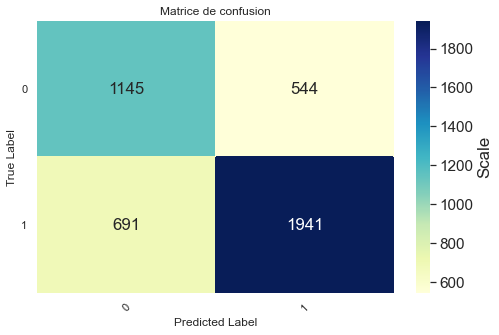

En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7256944444444445
Accuracy : 0.718
Classification Report
              precision    recall  f1-score   support

           0    0.63705   0.64950   0.64321      1689
           1    0.77222   0.76254   0.76735      2632

    accuracy                        0.71835      4321
   macro avg    0.70464   0.70602   0.70528      4321
weighted avg    0.71938   0.71835   0.71883      4321



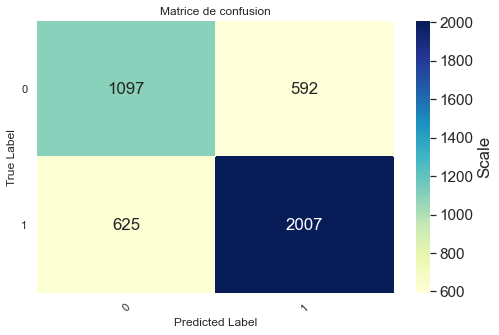

En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7163357298174492
Accuracy : 0.717
Classification Report
              precision    recall  f1-score   support

           0    0.63496   0.57309   0.60244      1724
           1    0.75837   0.80264   0.77988      2878

    accuracy                        0.71664      4602
   macro avg    0.69667   0.68786   0.69116      4602
weighted avg    0.71214   0.71664   0.71341      4602



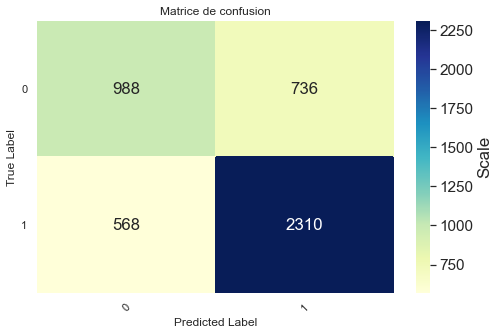

In [21]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=True, # supprimer les nombres 
                 transformdigit=True, # transforamation des chiffre en lettres
                 getstemmer=True,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=True # supprimer les caractéres non ascii
                            )
parameters = {'clf__n_estimators':[200], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                        'clf__min_samples_leaf': [2]}


clf = RandomForestClassifier()
print("En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','source','headline','author','named_entities_article','keywords'])
dfn=dfVF_M.copy()
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

print("En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article','keywords'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

dfn_article=dfVF_M.copy()
dfn_article['named_entities_article'].replace('', np.nan, inplace=True)
dfn_article.dropna(subset=['named_entities_article'], inplace=True)

print("En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn_article)

##### Utilisation de l'algorithme AdaBoostClassifier SVM

En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.713095238095238
Accuracy : 0.703
Classification Report
              precision    recall  f1-score   support

           0    0.62221   0.61042   0.61626      1689
           1    0.75300   0.76216   0.75755      2632

    accuracy                        0.70285      4321
   macro avg    0.68761   0.68629   0.68691      4321
weighted avg    0.70188   0.70285   0.70232      4321



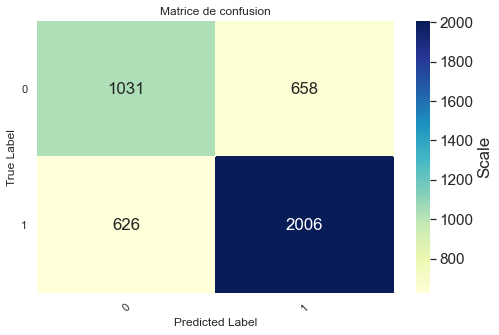

En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7114087301587302
Accuracy : 0.702
Classification Report
              precision    recall  f1-score   support

           0    0.62370   0.60154   0.61242      1689
           1    0.75000   0.76710   0.75845      2632

    accuracy                        0.70238      4321
   macro avg    0.68685   0.68432   0.68543      4321
weighted avg    0.70063   0.70238   0.70137      4321



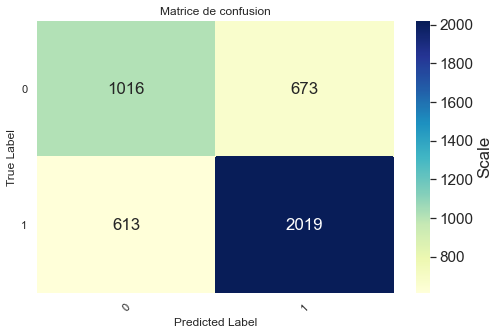

En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7088855958554616
Accuracy : 0.708
Classification Report
              precision    recall  f1-score   support

           0    0.62179   0.56265   0.59074      1724
           1    0.75214   0.79500   0.77297      2878

    accuracy                        0.70795      4602
   macro avg    0.68697   0.67882   0.68186      4602
weighted avg    0.70331   0.70795   0.70471      4602



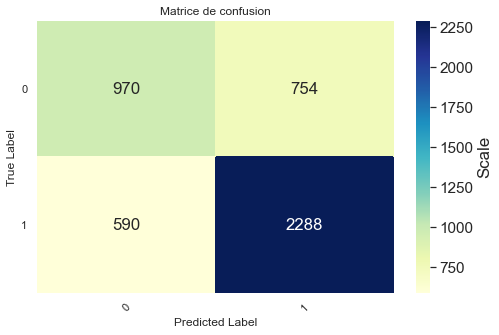

In [23]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=True, # supprimer les nombres 
                 transformdigit=True, # transforamation des chiffre en lettres
                 getstemmer=True,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=True # supprimer les caractéres non ascii
                            )
parameters = {'clf__C': [1], 'clf__gamma': [1], 'clf__kernel': ['linear']}

clf = SVC()
print("En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','source','headline','author','named_entities_article','keywords'])
dfnADB=dfVF_M.copy()
dfnADB['named_entities_article'].replace('', np.nan, inplace=True)
dfnADB['keywords'].replace("", np.nan, inplace=True)
dfnADB.dropna(subset=['named_entities_article'], inplace=True)
dfnADB.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfnADB)

print("En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article','keywords'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfnADB)

dfnADBarticle=dfVF_M.copy()
dfnADBarticle['named_entities_article'].replace('', np.nan, inplace=True)
dfnADBarticle.dropna(subset=['named_entities_article'], inplace=True)

print("En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfnADBarticle)

##### Utilisation de l'algorithme GradientBoostingClassifier GBC


En utilisent 'source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7179563492063492
Accuracy : 0.714
Classification Report
              precision    recall  f1-score   support

           0    0.61442   0.72173   0.66376      1689
           1    0.79889   0.70935   0.75146      2632

    accuracy                        0.71419      4321
   macro avg    0.70665   0.71554   0.70761      4321
weighted avg    0.72678   0.71419   0.71718      4321



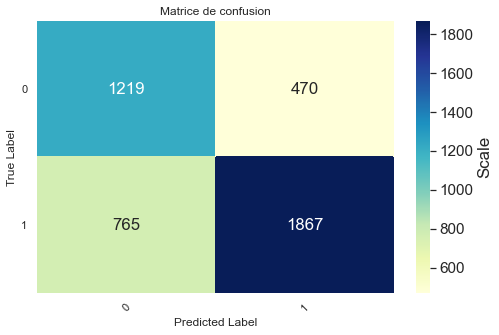

En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7068452380952381
Accuracy : 0.706
Classification Report
              precision    recall  f1-score   support

           0    0.60609   0.70693   0.65264      1689
           1    0.78945   0.70517   0.74493      2632

    accuracy                        0.70586      4321
   macro avg    0.69777   0.70605   0.69879      4321
weighted avg    0.71778   0.70586   0.70886      4321



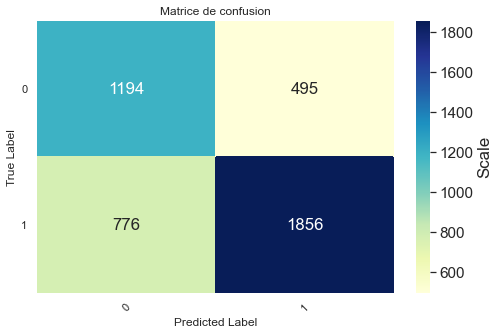

En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7125164470973746
Accuracy : 0.716
Classification Report
              precision    recall  f1-score   support

           0    0.61085   0.66647   0.63745      1724
           1    0.78868   0.74566   0.76657      2878

    accuracy                        0.71599      4602
   macro avg    0.69976   0.70607   0.70201      4602
weighted avg    0.72206   0.71599   0.71820      4602



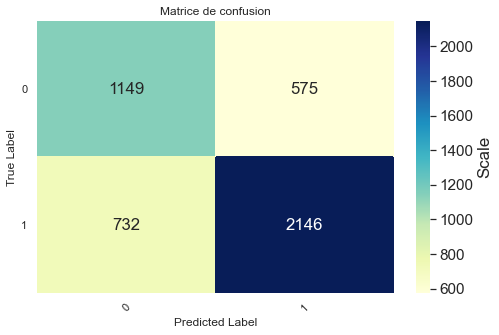

In [24]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=True, # supprimer les nombres 
                 transformdigit=True, # transforamation des chiffre en lettres
                 getstemmer=True,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=True # supprimer les caractéres non ascii
                            )
parameters = {'clf__learning_rate':[0.3],'clf__n_estimators':[100,200], 'clf__max_depth':[3],
                         'clf__min_samples_split':[2],'clf__min_samples_leaf': [2]}

clf = GradientBoostingClassifier()
print("En utilisent 'source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['source','headline','author','named_entities_article','keywords'])
dfnGBC=dfVF_M.copy()
dfnGBC['named_entities_article'].replace('', np.nan, inplace=True)
dfnGBC['keywords'].replace("", np.nan, inplace=True)
dfnGBC.dropna(subset=['named_entities_article'], inplace=True)
dfnGBC.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfnGBC)

print("En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article','keywords'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfnGBC)

dfnGBCarticle=dfVF_M.copy()
dfnGBCarticle['named_entities_article'].replace('', np.nan, inplace=True)
dfnGBCarticle.dropna(subset=['named_entities_article'], inplace=True)

print("En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfnGBCarticle)

#### Nous déduisons que le meilleur algorithme est RandomForestClassifier (RFC) 

### Application du prétraitement lower case et remove stop words sur l'algorithme RFC

En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7258928571428571
Accuracy : 0.710
Classification Report
              precision    recall  f1-score   support

           0    0.61993   0.67022   0.64410      1689
           1    0.77675   0.73632   0.75600      2632

    accuracy                        0.71048      4321
   macro avg    0.69834   0.70327   0.70005      4321
weighted avg    0.71546   0.71048   0.71226      4321



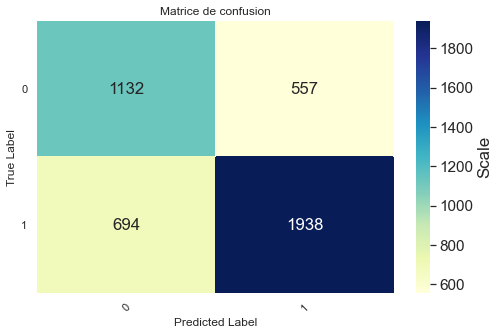

En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.720436507936508
Accuracy : 0.707
Classification Report
              precision    recall  f1-score   support

           0    0.62154   0.63884   0.63007      1689
           1    0.76402   0.75038   0.75714      2632

    accuracy                        0.70678      4321
   macro avg    0.69278   0.69461   0.69361      4321
weighted avg    0.70833   0.70678   0.70747      4321



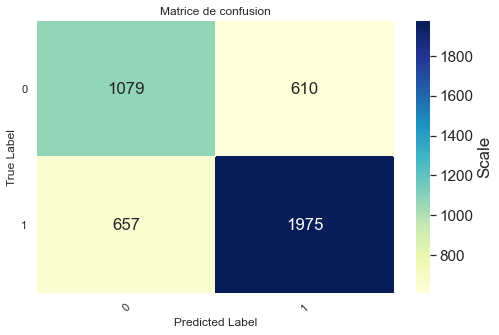

En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7194086590877748
Accuracy : 0.717
Classification Report
              precision    recall  f1-score   support

           0    0.63294   0.58411   0.60754      1724
           1    0.76187   0.79708   0.77908      2878

    accuracy                        0.71730      4602
   macro avg    0.69740   0.69059   0.69331      4602
weighted avg    0.71357   0.71730   0.71482      4602



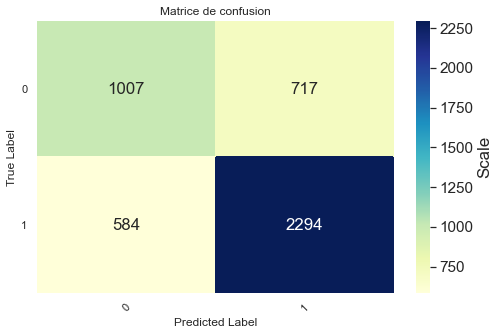

In [25]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=False, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                 )
parameters = {'clf__n_estimators':[200], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                        'clf__min_samples_leaf': [2]}


clf = RandomForestClassifier()
print("En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','source','headline','author','named_entities_article','keywords'])
dfn=dfVF_M.copy()
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

print("En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article','keywords'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

dfn_article=dfVF_M.copy()
dfn_article['named_entities_article'].replace('', np.nan, inplace=True)
dfn_article.dropna(subset=['named_entities_article'], inplace=True)

print("En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn_article)

### Application du prétraitement lower case et remove stop words et lemmatisation sur le meilleur algorithme et les meilleurs features

##### Application sur l'algorithme RFC en utilisent les features 'source','headline','author','named_entities_article','keywords

En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7242063492063492
Accuracy : 0.717
Classification Report
              precision    recall  f1-score   support

           0    0.62895   0.67140   0.64948      1689
           1    0.77959   0.74582   0.76233      2632

    accuracy                        0.71673      4321
   macro avg    0.70427   0.70861   0.70591      4321
weighted avg    0.72071   0.71673   0.71822      4321



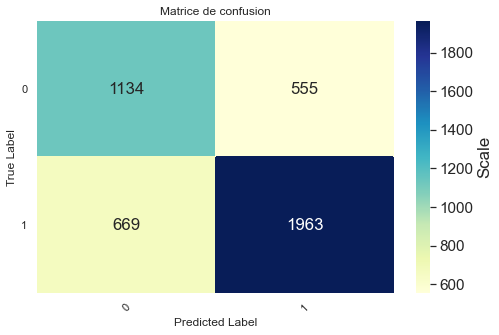

En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.720734126984127
Accuracy : 0.710
Classification Report
              precision    recall  f1-score   support

           0    0.62696   0.63884   0.63284      1689
           1    0.76538   0.75608   0.76070      2632

    accuracy                        0.71025      4321
   macro avg    0.69617   0.69746   0.69677      4321
weighted avg    0.71128   0.71025   0.71073      4321



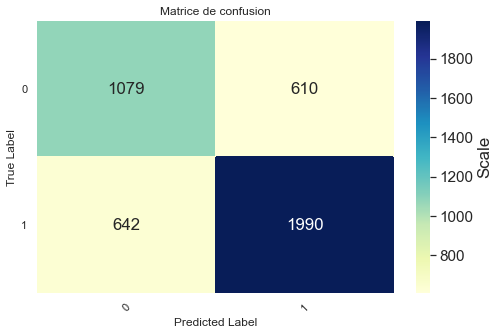

En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7179189445408646
Accuracy : 0.719
Classification Report
              precision    recall  f1-score   support

           0    0.63671   0.58353   0.60896      1724
           1    0.76241   0.80056   0.78102      2878

    accuracy                        0.71925      4602
   macro avg    0.69956   0.69204   0.69499      4602
weighted avg    0.71532   0.71925   0.71656      4602



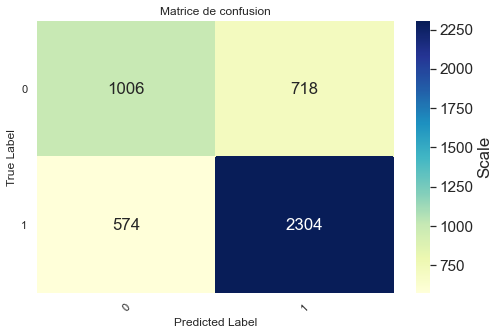

In [27]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                 )
parameters = {'clf__n_estimators':[200], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                        'clf__min_samples_leaf': [2]}


clf = RandomForestClassifier()
print("En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','source','headline','author','named_entities_article','keywords'])
dfn=dfVF_M.copy()
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

print("En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article','keywords'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

dfn_article=dfVF_M.copy()
dfn_article['named_entities_article'].replace('', np.nan, inplace=True)
dfn_article.dropna(subset=['named_entities_article'], inplace=True)

print("En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn_article)


##### On déduit que les meilleurs features sont : 'text','source','headline','author','named_entities_article','keywords'

### Application du prétraitement lower case et remove stop words et lemmatisation et transformation des digit en lettre

En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7246031746031747
Accuracy : 0.712
Classification Report
              precision    recall  f1-score   support

           0    0.62493   0.65897   0.64150      1689
           1    0.77323   0.74620   0.75947      2632

    accuracy                        0.71210      4321
   macro avg    0.69908   0.70259   0.70049      4321
weighted avg    0.71526   0.71210   0.71336      4321



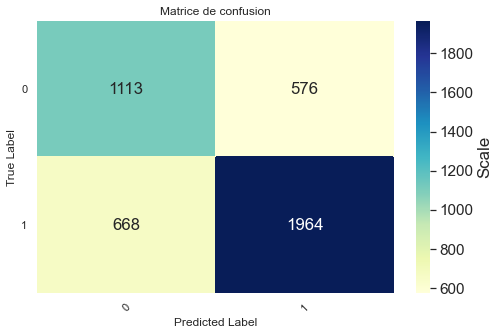

In [29]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=True, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                 )
parameters = {'clf__n_estimators':[200], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                        'clf__min_samples_leaf': [2]}


clf = RandomForestClassifier()
print("En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','source','headline','author','named_entities_article','keywords'])
dfn=dfVF_M.copy()
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

### Application du prétraitement suppression des stopwords, passage en miniscule, supprimer les nombres et supprimer les caractéres non ascii

En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7231150793650793
Accuracy : 0.714
Classification Report
              precision    recall  f1-score   support

           0    0.62548   0.66844   0.64625      1689
           1    0.77742   0.74316   0.75991      2632

    accuracy                        0.71396      4321
   macro avg    0.70145   0.70580   0.70308      4321
weighted avg    0.71803   0.71396   0.71548      4321



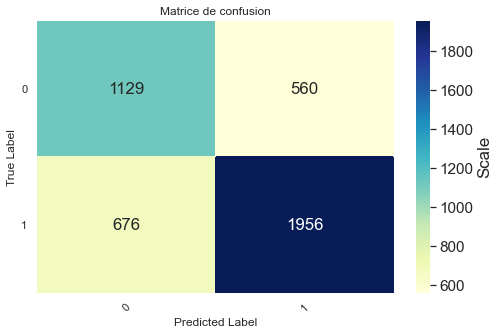

In [30]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=True, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=True # supprimer les caractéres non ascii
                 )
parameters = {'clf__n_estimators':[200], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                        'clf__min_samples_leaf': [2]}


clf = RandomForestClassifier()
print("En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','source','headline','author','named_entities_article','keywords'])
dfn=dfVF_M.copy()
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

##### On déduit que le meilleur prétraitement est la transoformation en lower case et remove stop words et lemmatisation et transformation des digit en lettre

# Equilibrage des données

## Random under-sampling

14452 10000
Random under-sampling:
MIXTURE    10000
FALSE       6984
TRUE        3016
Name: ratingName, dtype: int64


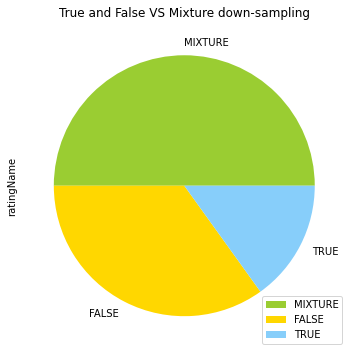

Random under-sampling:
MIXTURE       10000
True/False    10000
Name: ratingName, dtype: int64


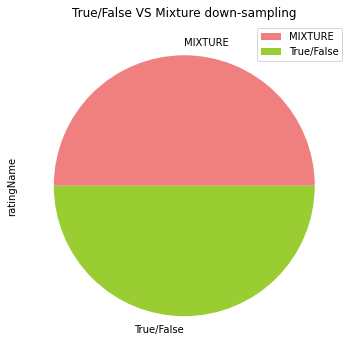

In [12]:

dfrvf = df[df.ratingName != "ratingName"]

dfrvfm = df['ratingName'].apply(lambda x: "True/False" if x == "TRUE" or x == "FALSE" else "MIXTURE")

count_class_true_false,count_class_mixture = dfrvfm.value_counts()
print(count_class_true_false,count_class_mixture)

df_class_mixture = dfrvf[dfrvf['ratingName'] == "MIXTURE"]
df_class_true_false = dfrvf[dfrvf['ratingName'] != "MIXTURE"]

df_class_true_false_under = df_class_true_false.sample(count_class_mixture)
df_test_under = pd.concat([df_class_true_false_under, df_class_mixture], axis=0)

print('Random under-sampling:')
print(df_test_under.ratingName.value_counts())

colors = ['yellowgreen', 'gold', 'lightskyblue']

df_test_under["ratingName"].value_counts().plot(kind='pie', 
                                  title = "True and False VS Mixture down-sampling",
                                  figsize=(6,6),colors=colors, 
                                  legend=True)

plt.show()

dfrvfm["ratingName"] = df['ratingName'].apply(lambda x: "True/False" if x == "TRUE" or x == "FALSE" else "MIXTURE")
#print(dfrvfm["ratingName"])
df_class_mixture = dfrvf[dfrvf['ratingName'] == "MIXTURE"]
df_class_true_false = dfrvf[dfrvf["ratingName"] != "MIXTURE"]
#print(df_class_true_false)
df_class_true_false_under = df_class_true_false.sample(count_class_mixture)

dfVF_M_under = pd.concat([df_class_true_false_under, df_class_mixture], axis=0)
dfVF_M_under["ratingName"] = dfVF_M_under['ratingName'].apply(lambda x: "True/False" if x == "TRUE" or x == "FALSE" else "MIXTURE")


print('Random under-sampling:')
print(dfVF_M_under.ratingName.value_counts())
colors = ['lightcoral', 'yellowgreen', 'lightskyblue']

dfVF_M_under["ratingName"].value_counts().plot(kind='pie', 
                                  title = "True/False VS Mixture down-sampling",
                                  figsize=(6,6),colors=colors, 
                                  legend=True)

plt.show()
dfVF_M_under['truthRating'] =dfVF_M_under['truthRating'].apply(lambda x: '1' if x == '1' or x == '3' else '0')


### Application du prétraitement brut en utilisent le down sampling

En utilisent text claims comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6196666666666667
Accuracy : 0.641
Classification Report
              precision    recall  f1-score   support

           0    0.64689   0.62166   0.63403      6999
           1    0.63596   0.66076   0.64813      7001

    accuracy                        0.64121     14000
   macro avg    0.64143   0.64121   0.64108     14000
weighted avg    0.64143   0.64121   0.64108     14000



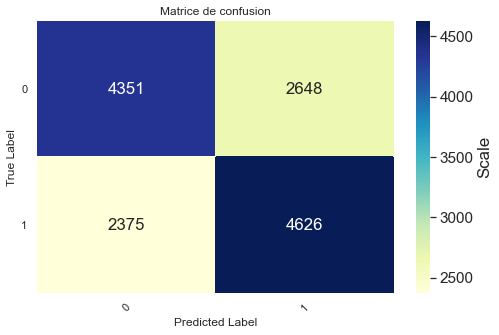

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6244999999999999
Accuracy : 0.635
Classification Report
              precision    recall  f1-score   support

           0    0.63798   0.62595   0.63191      6999
           1    0.63297   0.64491   0.63888      7001

    accuracy                        0.63543     14000
   macro avg    0.63548   0.63543   0.63540     14000
weighted avg    0.63548   0.63543   0.63540     14000



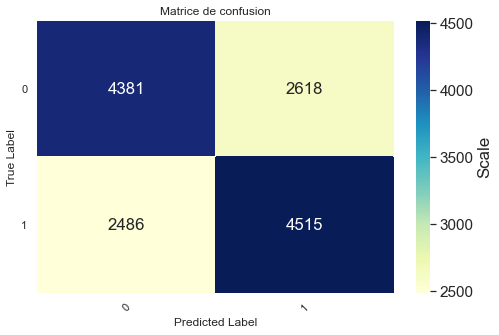

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6548333333333333
Accuracy : 0.663
Classification Report
              precision    recall  f1-score   support

           0    0.64566   0.72325   0.68226      6999
           1    0.68555   0.60320   0.64174      7001

    accuracy                        0.66321     14000
   macro avg    0.66561   0.66322   0.66200     14000
weighted avg    0.66561   0.66321   0.66200     14000



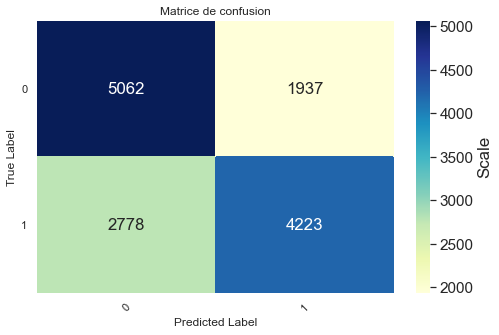

Alogrithm: logisticRegression
best params: {'clf__C': 2000, 'clf__tol': 0.001}
best scores: 0.6026666666666667
Accuracy : 0.601
Classification Report
              precision    recall  f1-score   support

           0    0.60238   0.59266   0.59748      6999
           1    0.59924   0.60891   0.60404      7001

    accuracy                        0.60079     14000
   macro avg    0.60081   0.60078   0.60076     14000
weighted avg    0.60081   0.60079   0.60076     14000



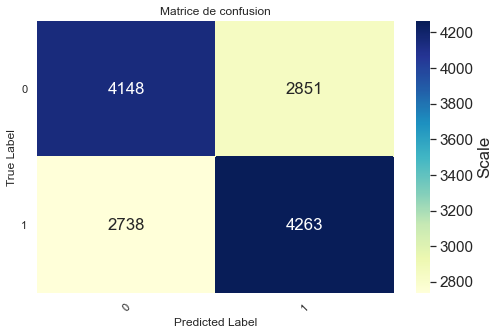

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6483333333333333
Accuracy : 0.652
Classification Report
              precision    recall  f1-score   support

           0    0.64453   0.67953   0.66157      6999
           1    0.66123   0.62534   0.64278      7001

    accuracy                        0.65243     14000
   macro avg    0.65288   0.65243   0.65218     14000
weighted avg    0.65288   0.65243   0.65217     14000



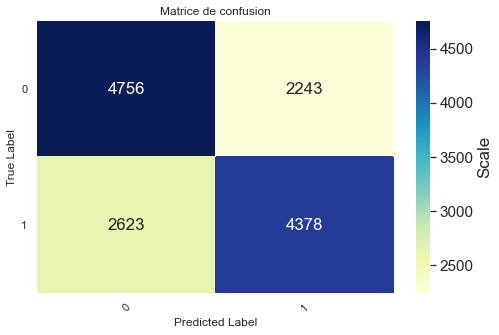

En utilisent source et text claims comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6715
Accuracy : 0.683
Classification Report
              precision    recall  f1-score   support

           0    0.65312   0.77854   0.71034      6999
           1    0.72600   0.58663   0.64892      7001

    accuracy                        0.68257     14000
   macro avg    0.68956   0.68259   0.67963     14000
weighted avg    0.68957   0.68257   0.67962     14000



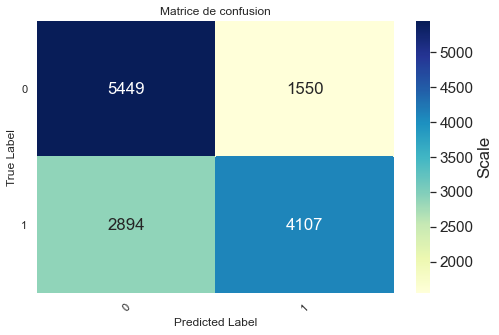

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6598333333333334
Accuracy : 0.676
Classification Report
              precision    recall  f1-score   support

           0    0.65194   0.75496   0.69968      6999
           1    0.70908   0.59706   0.64826      7001

    accuracy                        0.67600     14000
   macro avg    0.68051   0.67601   0.67397     14000
weighted avg    0.68051   0.67600   0.67397     14000



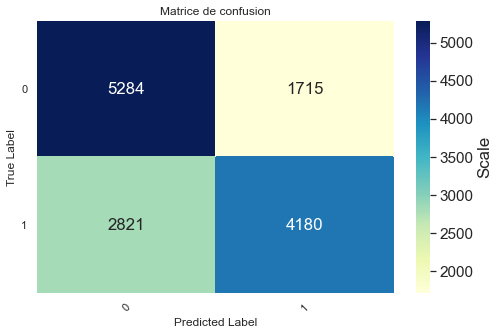

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6828333333333333
Accuracy : 0.695
Classification Report
              precision    recall  f1-score   support

           0    0.66212   0.79740   0.72349      6999
           1    0.74547   0.59320   0.66067      7001

    accuracy                        0.69529     14000
   macro avg    0.70379   0.69530   0.69208     14000
weighted avg    0.70380   0.69529   0.69208     14000



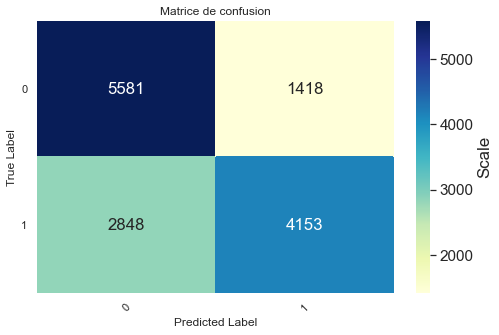

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6163333333333334
Accuracy : 0.616
Classification Report
              precision    recall  f1-score   support

           0    0.62011   0.60009   0.60993      6999
           1    0.61270   0.63248   0.62243      7001

    accuracy                        0.61629     14000
   macro avg    0.61641   0.61628   0.61618     14000
weighted avg    0.61641   0.61629   0.61618     14000



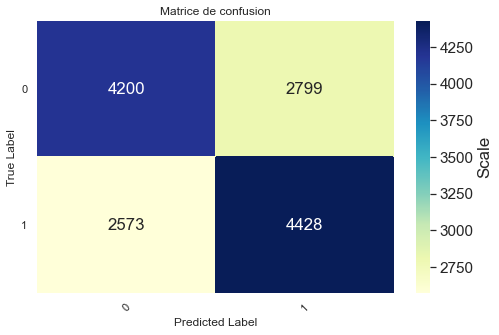

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6666666666666666
Accuracy : 0.675
Classification Report
              precision    recall  f1-score   support

           0    0.65782   0.72925   0.69169      6999
           1    0.69636   0.62077   0.65640      7001

    accuracy                        0.67500     14000
   macro avg    0.67709   0.67501   0.67404     14000
weighted avg    0.67709   0.67500   0.67404     14000



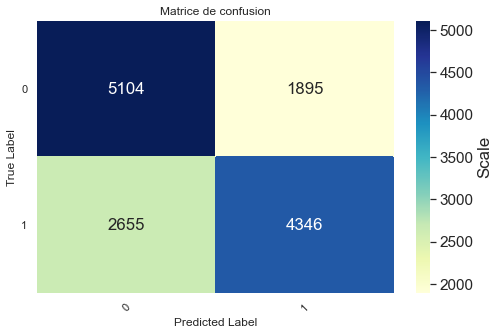

En utilisent text claims et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6828333333333333
Accuracy : 0.698
Classification Report
              precision    recall  f1-score   support

           0    0.67095   0.77611   0.71971      6999
           1    0.73459   0.61948   0.67214      7001

    accuracy                        0.69779     14000
   macro avg    0.70277   0.69780   0.69593     14000
weighted avg    0.70277   0.69779   0.69592     14000



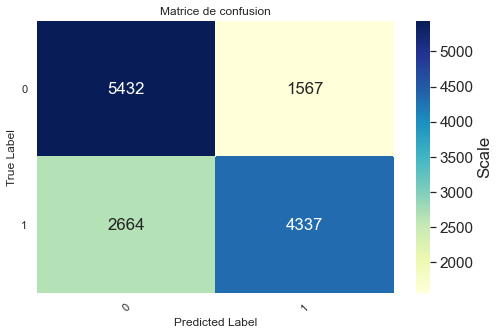

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6793333333333333
Accuracy : 0.694
Classification Report
              precision    recall  f1-score   support

           0    0.67195   0.75682   0.71187      6999
           1    0.72176   0.63062   0.67312      7001

    accuracy                        0.69371     14000
   macro avg    0.69686   0.69372   0.69249     14000
weighted avg    0.69686   0.69371   0.69249     14000



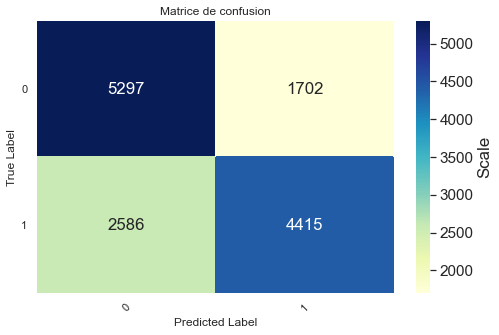

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.692
Accuracy : 0.703
Classification Report
              precision    recall  f1-score   support

           0    0.67536   0.78025   0.72403      6999
           1    0.73994   0.62505   0.67766      7001

    accuracy                        0.70264     14000
   macro avg    0.70765   0.70265   0.70085     14000
weighted avg    0.70766   0.70264   0.70084     14000



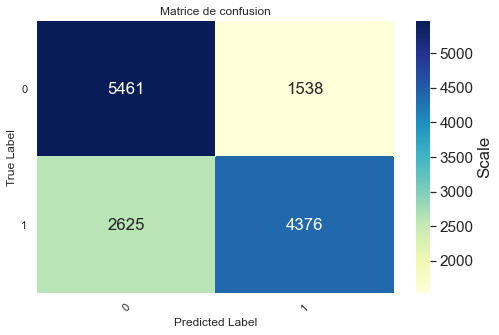

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6333333333333333
Accuracy : 0.628
Classification Report
              precision    recall  f1-score   support

           0    0.63135   0.61466   0.62289      6999
           1    0.62469   0.64119   0.63283      7001

    accuracy                        0.62793     14000
   macro avg    0.62802   0.62793   0.62786     14000
weighted avg    0.62802   0.62793   0.62786     14000



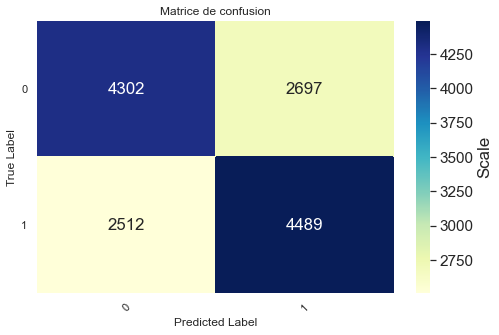

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6821666666666666
Accuracy : 0.690
Classification Report
              precision    recall  f1-score   support

           0    0.67484   0.73182   0.70217      6999
           1    0.70718   0.64748   0.67601      7001

    accuracy                        0.68964     14000
   macro avg    0.69101   0.68965   0.68909     14000
weighted avg    0.69101   0.68964   0.68909     14000



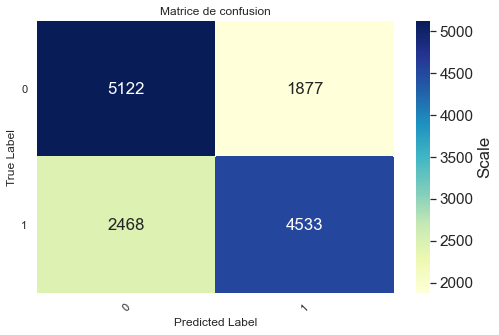

En utilisent text claims, headline et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7
Accuracy : 0.712
Classification Report
              precision    recall  f1-score   support

           0    0.68703   0.77754   0.72949      6999
           1    0.74387   0.64591   0.69144      7001

    accuracy                        0.71171     14000
   macro avg    0.71545   0.71172   0.71046     14000
weighted avg    0.71546   0.71171   0.71046     14000



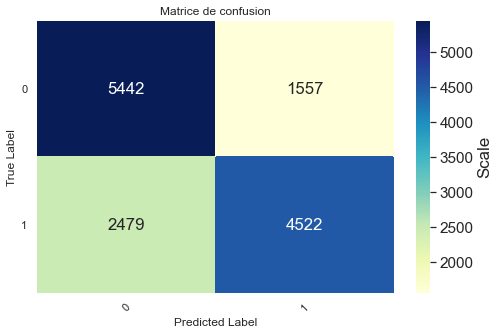

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.689
Accuracy : 0.703
Classification Report
              precision    recall  f1-score   support

           0    0.68311   0.75797   0.71859      6999
           1    0.72826   0.64848   0.68606      7001

    accuracy                        0.70321     14000
   macro avg    0.70569   0.70322   0.70233     14000
weighted avg    0.70569   0.70321   0.70232     14000



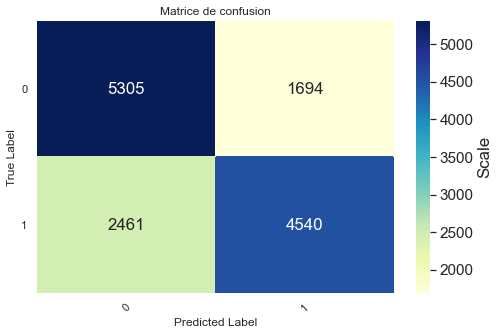

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7051666666666666
Accuracy : 0.712
Classification Report
              precision    recall  f1-score   support

           0    0.68445   0.78654   0.73195      6999
           1    0.74920   0.63748   0.68884      7001

    accuracy                        0.71200     14000
   macro avg    0.71682   0.71201   0.71040     14000
weighted avg    0.71683   0.71200   0.71039     14000



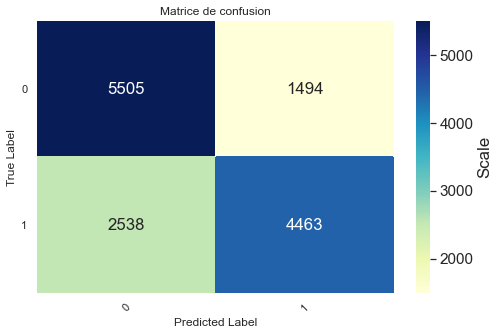

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6355
Accuracy : 0.648
Classification Report
              precision    recall  f1-score   support

           0    0.65041   0.63852   0.64441      6999
           1    0.64511   0.65691   0.65096      7001

    accuracy                        0.64771     14000
   macro avg    0.64776   0.64771   0.64768     14000
weighted avg    0.64776   0.64771   0.64768     14000



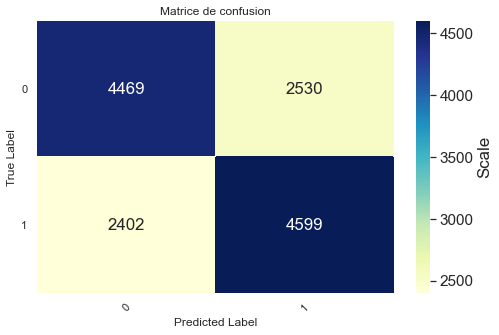

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6813333333333333
Accuracy : 0.696
Classification Report
              precision    recall  f1-score   support

           0    0.68268   0.73310   0.70699      6999
           1    0.71191   0.65933   0.68461      7001

    accuracy                        0.69621     14000
   macro avg    0.69729   0.69622   0.69580     14000
weighted avg    0.69729   0.69621   0.69580     14000



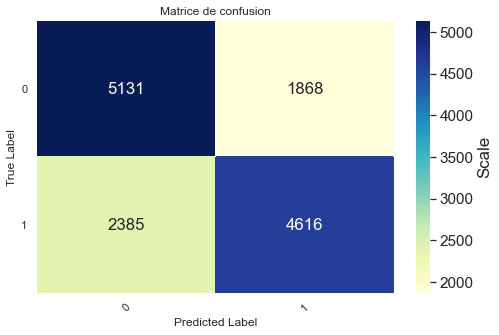

En utilisent text claims, headline, author et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6825431627085775
Accuracy : 0.709
Classification Report
              precision    recall  f1-score   support

           0    0.68299   0.70341   0.69305      4046
           1    0.73387   0.71469   0.72415      4630

    accuracy                        0.70943      8676
   macro avg    0.70843   0.70905   0.70860      8676
weighted avg    0.71014   0.70943   0.70965      8676



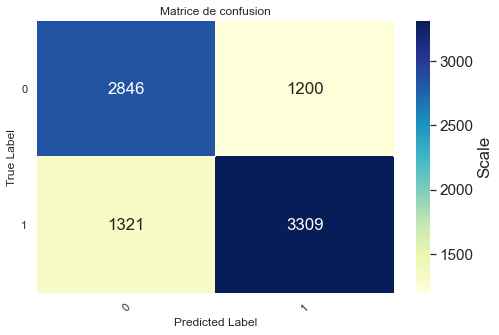

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6798586086629329
Accuracy : 0.704
Classification Report
              precision    recall  f1-score   support

           0    0.68030   0.69056   0.68539      4046
           1    0.72598   0.71641   0.72117      4630

    accuracy                        0.70436      8676
   macro avg    0.70314   0.70349   0.70328      8676
weighted avg    0.70468   0.70436   0.70448      8676



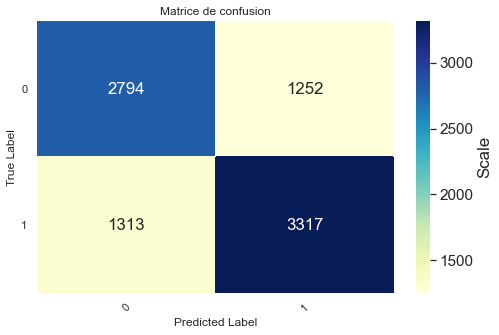

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6906160002315518
Accuracy : 0.715
Classification Report
              precision    recall  f1-score   support

           0    0.68973   0.70712   0.69832      4046
           1    0.73830   0.72203   0.73007      4630

    accuracy                        0.71508      8676
   macro avg    0.71401   0.71457   0.71419      8676
weighted avg    0.71565   0.71508   0.71526      8676



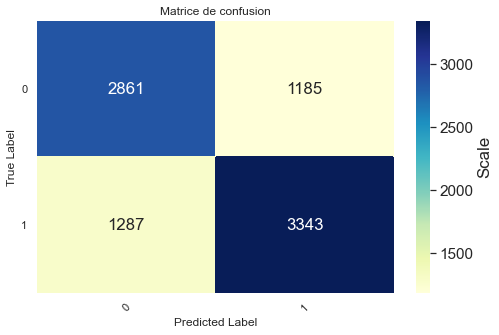

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6335742919579154
Accuracy : 0.648
Classification Report
              precision    recall  f1-score   support

           0    0.62519   0.61221   0.61863      4046
           1    0.66716   0.67927   0.67316      4630

    accuracy                        0.64799      8676
   macro avg    0.64618   0.64574   0.64590      8676
weighted avg    0.64759   0.64799   0.64773      8676



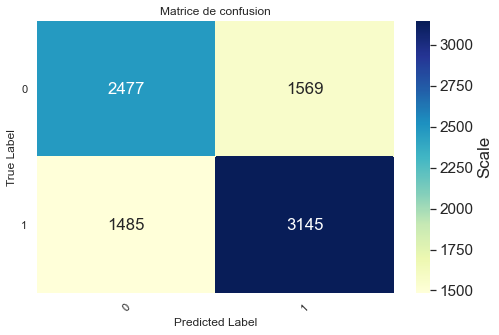

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6790405794584581
Accuracy : 0.686
Classification Report
              precision    recall  f1-score   support

           0    0.66751   0.65052   0.65891      4046
           1    0.70125   0.71685   0.70896      4630

    accuracy                        0.68592      8676
   macro avg    0.68438   0.68368   0.68393      8676
weighted avg    0.68551   0.68592   0.68562      8676



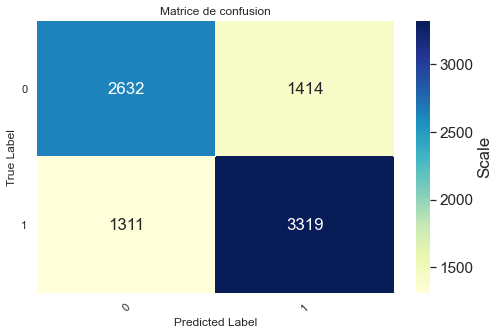

En utilisent text claims, headline, author,keywords et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6972019563888322
Accuracy : 0.702
Classification Report
              precision    recall  f1-score   support

           0    0.67219   0.72933   0.69959      3894
           1    0.73323   0.67655   0.70375      4282

    accuracy                        0.70169      8176
   macro avg    0.70271   0.70294   0.70167      8176
weighted avg    0.70416   0.70169   0.70177      8176



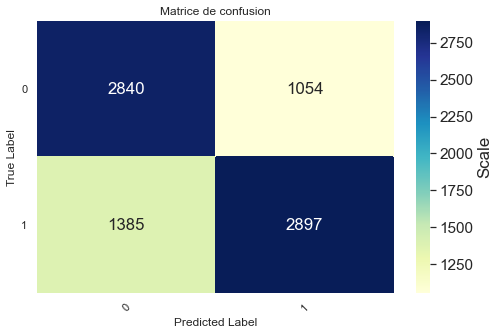

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6983435907886693
Accuracy : 0.698
Classification Report
              precision    recall  f1-score   support

           0    0.67776   0.69569   0.68660      3894
           1    0.71644   0.69921   0.70772      4282

    accuracy                        0.69753      8176
   macro avg    0.69710   0.69745   0.69716      8176
weighted avg    0.69802   0.69753   0.69766      8176



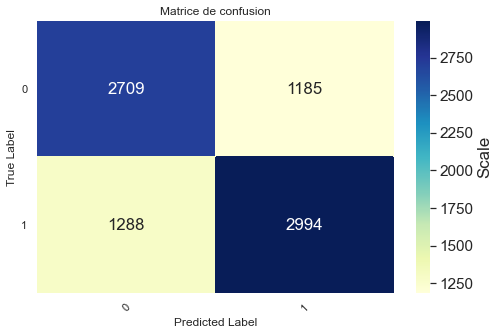

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7186024047279396
Accuracy : 0.719
Classification Report
              precision    recall  f1-score   support

           0    0.68168   0.76939   0.72289      3894
           1    0.76250   0.67328   0.71512      4282

    accuracy                        0.71906      8176
   macro avg    0.72209   0.72134   0.71900      8176
weighted avg    0.72401   0.71906   0.71882      8176



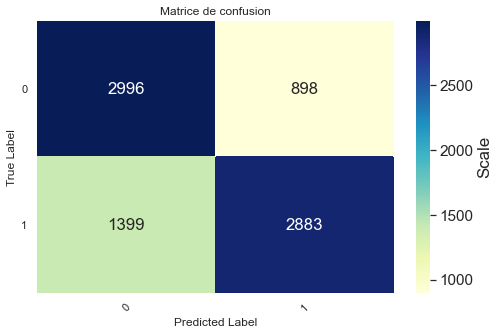

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6629492561646627
Accuracy : 0.672
Classification Report
              precision    recall  f1-score   support

           0    0.66023   0.64124   0.65060      3894
           1    0.68207   0.69991   0.69087      4282

    accuracy                        0.67197      8176
   macro avg    0.67115   0.67057   0.67074      8176
weighted avg    0.67167   0.67197   0.67169      8176



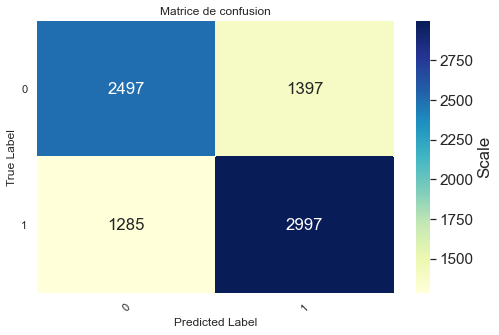

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6974787038923986
Accuracy : 0.710
Classification Report
              precision    recall  f1-score   support

           0    0.68647   0.71803   0.70190      3894
           1    0.73239   0.70177   0.71676      4282

    accuracy                        0.70952      8176
   macro avg    0.70943   0.70990   0.70933      8176
weighted avg    0.71052   0.70952   0.70968      8176



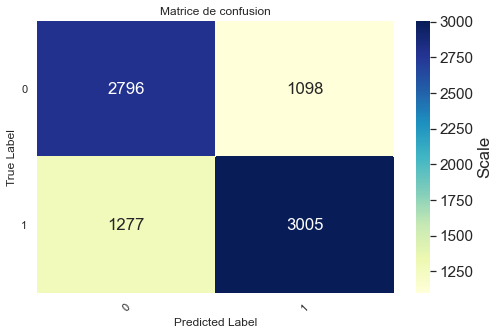

En utilisent text claims, source, headline, author, keywords et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6940648053800693
Accuracy : 0.702
Classification Report
              precision    recall  f1-score   support

           0    0.67400   0.72419   0.69819      3894
           1    0.73096   0.68146   0.70534      4282

    accuracy                        0.70181      8176
   macro avg    0.70248   0.70282   0.70177      8176
weighted avg    0.70383   0.70181   0.70194      8176



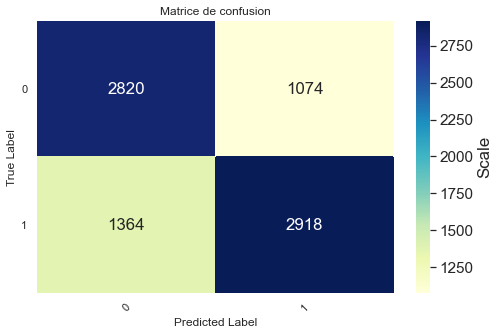

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.7000546158549011
Accuracy : 0.701
Classification Report
              precision    recall  f1-score   support

           0    0.67744   0.71084   0.69373      3894
           1    0.72469   0.69220   0.70807      4282

    accuracy                        0.70108      8176
   macro avg    0.70106   0.70152   0.70090      8176
weighted avg    0.70219   0.70108   0.70124      8176



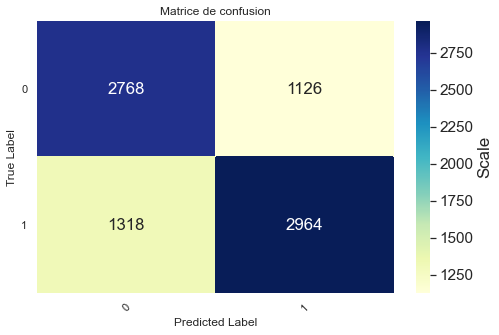

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7200321988995313
Accuracy : 0.721
Classification Report
              precision    recall  f1-score   support

           0    0.68151   0.77812   0.72662      3894
           1    0.76836   0.66931   0.71543      4282

    accuracy                        0.72114      8176
   macro avg    0.72494   0.72372   0.72102      8176
weighted avg    0.72700   0.72114   0.72076      8176



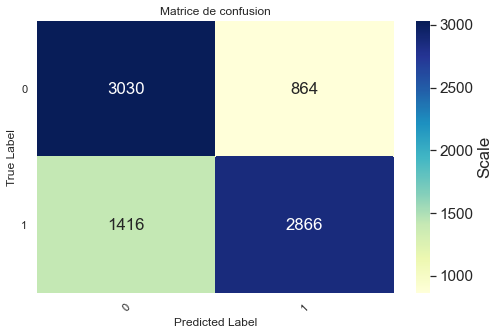

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.6660876299164459
Accuracy : 0.673
Classification Report
              precision    recall  f1-score   support

           0    0.66173   0.64304   0.65225      3894
           1    0.68352   0.70107   0.69218      4282

    accuracy                        0.67343      8176
   macro avg    0.67262   0.67206   0.67222      8176
weighted avg    0.67314   0.67343   0.67317      8176



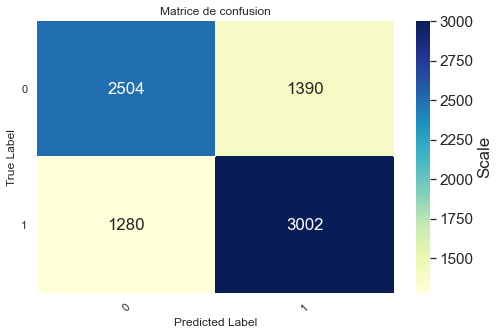

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.702332178520481
Accuracy : 0.713
Classification Report
              precision    recall  f1-score   support

           0    0.68811   0.72522   0.70618      3894
           1    0.73723   0.70107   0.71870      4282

    accuracy                        0.71257      8176
   macro avg    0.71267   0.71315   0.71244      8176
weighted avg    0.71384   0.71257   0.71273      8176



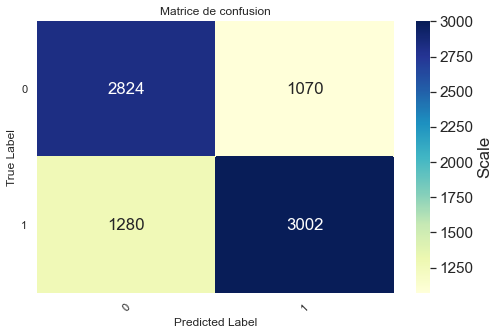

En utilisent text claims, headline, author,keywords,named_entities_claim et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7058773181169757
Accuracy : 0.704
Classification Report
              precision    recall  f1-score   support

           0    0.67381   0.73486   0.70301      3896
           1    0.73682   0.67602   0.70511      4278

    accuracy                        0.70406      8174
   macro avg    0.70531   0.70544   0.70406      8174
weighted avg    0.70678   0.70406   0.70411      8174



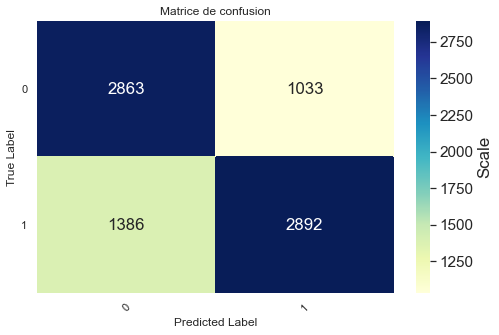

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7055952720603219
Accuracy : 0.704
Classification Report
              precision    recall  f1-score   support

           0    0.67879   0.71869   0.69817      3896
           1    0.72932   0.69028   0.70926      4278

    accuracy                        0.70382      8174
   macro avg    0.70405   0.70448   0.70371      8174
weighted avg    0.70523   0.70382   0.70397      8174



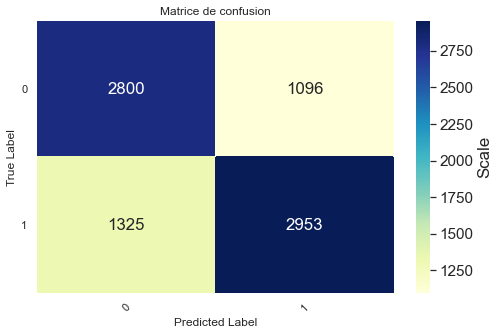

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7212977379254127
Accuracy : 0.725
Classification Report
              precision    recall  f1-score   support

           0    0.68495   0.78516   0.73164      3896
           1    0.77427   0.67111   0.71901      4278

    accuracy                        0.72547      8174
   macro avg    0.72961   0.72814   0.72533      8174
weighted avg    0.73170   0.72547   0.72503      8174



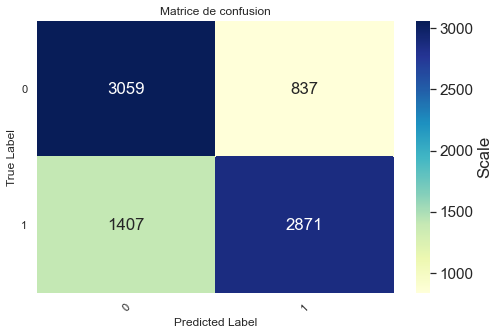

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6778985123293254
Accuracy : 0.674
Classification Report
              precision    recall  f1-score   support

           0    0.65958   0.65298   0.65626      3896
           1    0.68682   0.69308   0.68994      4278

    accuracy                        0.67397      8174
   macro avg    0.67320   0.67303   0.67310      8174
weighted avg    0.67384   0.67397   0.67389      8174



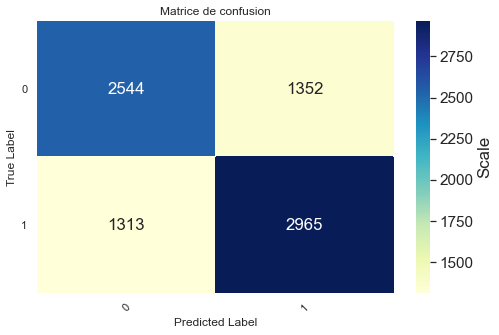

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.6998834318320766
Accuracy : 0.711
Classification Report
              precision    recall  f1-score   support

           0    0.68056   0.74204   0.70997      3896
           1    0.74401   0.68280   0.71209      4278

    accuracy                        0.71103      8174
   macro avg    0.71228   0.71242   0.71103      8174
weighted avg    0.71377   0.71103   0.71108      8174



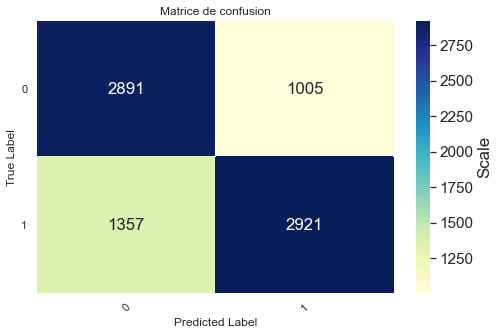

In [14]:
text_normalizer = TextNormalizer()
underBestScoredAlgo = []
print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M_under)
underBestScoredAlgo.append(score)
print("En utilisent source et text claims comme jeu de donnée")
features = np.array(["source","text"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M_under)
underBestScoredAlgo.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M_under)
underBestScoredAlgo.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M_under)
underBestScoredAlgo.append(score)
print("En utilisent text claims, headline, author et named_entities_article comme jeu de donnée")
dfn=dfVF_M_under.copy()
features = np.array(["text","headline","author","named_entities_article"])
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
score=classification_avec_pretraitement(features,text_normalizer,dfn)
underBestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords et named_entities_article comme jeu de donnée")
features = np.array(["text","headline","author","named_entities_article","keywords"])
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
score=classification_avec_pretraitement(features,text_normalizer,dfn)
underBestScoredAlgo.append(score)
print("En utilisent text claims, source, headline, author, keywords et named_entities_article comme jeu de donnée")
features = np.array(["text","source","headline","author","named_entities_article","keywords"])
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
score=classification_avec_pretraitement(features,text_normalizer,dfn)
underBestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et named_entities_article comme jeu de donnée")
dfn['named_entities_claim'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_claim'], inplace=True)
features = np.array(["text","headline","author","named_entities_article","keywords","named_entities_claim"])
score=classification_avec_pretraitement(features,text_normalizer,dfn)
underBestScoredAlgo.append(score)

In [15]:
underBestScoredAlgo.sort(key=lambda x: x[3],reverse=True)
print("Meilleur score "+str(underBestScoredAlgo[0][3]))
print("tri de meilleur score et meilleur algorithme de chaque features")
for i in range(len(underBestScoredAlgo)):
    print("Features :"+str(underBestScoredAlgo[i][0]))
    print("Meilleur Score :"+str(underBestScoredAlgo[i][3]))
    print("Meilleur Algorithm :"+str(underBestScoredAlgo[i][2]))
    print("Meilleur Parametre :"+str(underBestScoredAlgo[i][4]))
    print("-------------------------")

Meilleur score 0.7212977379254127
tri de meilleur score et meilleur algorithme de chaque features
Features :['text' 'headline' 'author' 'named_entities_article' 'keywords'
 'named_entities_claim']
Meilleur Score :0.7212977379254127
Meilleur Algorithm :RFC
Meilleur Parametre :{'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'source' 'headline' 'author' 'named_entities_article' 'keywords']
Meilleur Score :0.7200321988995313
Meilleur Algorithm :RFC
Meilleur Parametre :{'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'headline' 'author' 'named_entities_article' 'keywords']
Meilleur Score :0.7186024047279396
Meilleur Algorithm :RFC
Meilleur Parametre :{'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
-------------------------

##### On remarque que le meilleur algorithme n'a pas changer, c'est toujour RandomForestClassifier (RFC)

#### Application du meilleur prétraitement sur les meilleurs features

En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.723302752293578
Accuracy : 0.725
Classification Report
              precision    recall  f1-score   support

           0    0.68163   0.79197   0.73267      1668
           1    0.77842   0.66394   0.71664      1836

    accuracy                        0.72489      3504
   macro avg    0.73002   0.72795   0.72465      3504
weighted avg    0.73234   0.72489   0.72427      3504



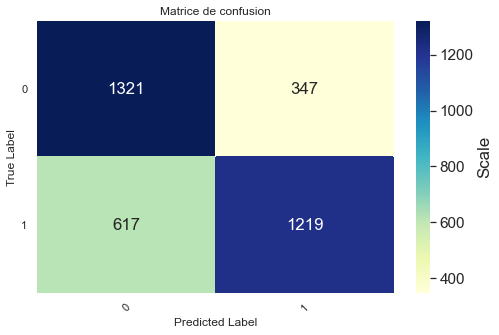

En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.721223241590214
Accuracy : 0.729
Classification Report
              precision    recall  f1-score   support

           0    0.68370   0.80216   0.73821      1668
           1    0.78668   0.66285   0.71948      1836

    accuracy                        0.72917      3504
   macro avg    0.73519   0.73251   0.72884      3504
weighted avg    0.73766   0.72917   0.72839      3504



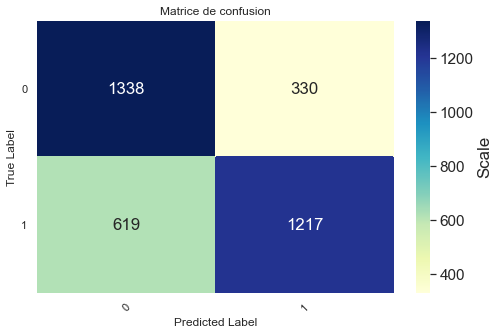

En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7140057636887609
Accuracy : 0.726
Classification Report
              precision    recall  f1-score   support

           0    0.69533   0.74686   0.72018      1754
           1    0.75791   0.70774   0.73196      1964

    accuracy                        0.72620      3718
   macro avg    0.72662   0.72730   0.72607      3718
weighted avg    0.72838   0.72620   0.72640      3718



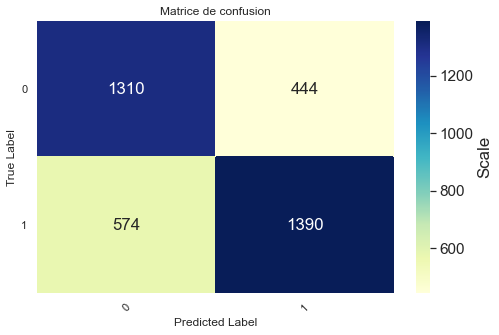

In [24]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                 )
parameters = {'clf__n_estimators':[200], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                        'clf__min_samples_leaf': [2]}


clf = RandomForestClassifier()
print("En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','source','headline','author','named_entities_article','keywords'])
dfn=dfVF_M_under.copy()
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

print("En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article','keywords'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

dfn_article=dfVF_M_under.copy()
dfn_article['named_entities_article'].replace('', np.nan, inplace=True)
dfn_article.dropna(subset=['named_entities_article'], inplace=True)

print("En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn_article)

In [ ]:
oversa

Random over-sampling:
MIXTURE    14452
FALSE      10000
TRUE        4452
Name: ratingName, dtype: int64


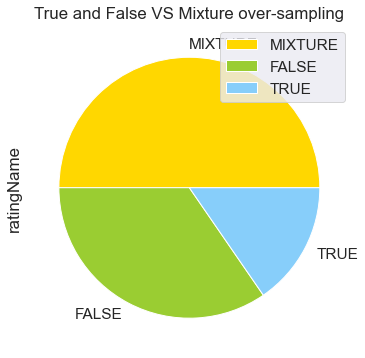

Random under-sampling:
MIXTURE       14452
True/False    14452
Name: ratingName, dtype: int64


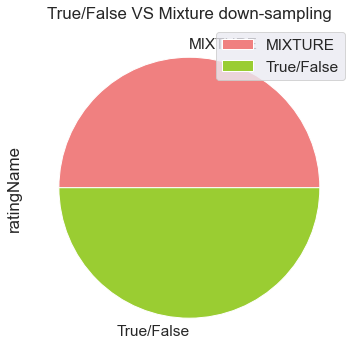

In [18]:
import numpy as np
dfrvf = df[df.ratingName != "ratingName"]
dfrvfm = df['ratingName'].apply(lambda x: "True/False" if x == "TRUE" or x == "FALSE" else "MIXTURE")
# Class count
count_class_true_false,count_class_mixture = dfrvfm.value_counts()

df_class_mixture = dfrvf[dfrvf['ratingName'] == "MIXTURE"]
df_class_true_false = dfrvf[dfrvf['ratingName'] != "MIXTURE"]

df_class_mixture_over = df_class_mixture.sample(count_class_true_false, replace=True)
df_test_over = pd.concat([df_class_mixture_over, df_class_true_false], axis=0)

print('Random over-sampling:')
print(df_test_over.ratingName.value_counts())

colors = ['gold', 'yellowgreen', 'lightskyblue']

df_test_over["ratingName"].value_counts().plot(kind='pie', 
                                  title = "True and False VS Mixture over-sampling",
                                  figsize=(6,6),colors=colors, 
                                  legend=True)

plt.show()

dfrvfm["ratingName"] = df['ratingName'].apply(lambda x: "True/False" if x == "TRUE" or x == "FALSE" else "MIXTURE")
#print(dfrvfm["ratingName"])
df_class_mixture = dfrvf[dfrvf['ratingName'] == "MIXTURE"]
df_class_true_false = dfrvf[dfrvf["ratingName"] != "MIXTURE"]
#print(df_class_true_false)
df_class_mixture_over = df_class_mixture_over.sample(count_class_true_false,replace=True)

dfVF_M_over = pd.concat([df_class_mixture_over, df_class_true_false], axis=0)
dfVF_M_over["ratingName"] = dfVF_M_over['ratingName'].apply(lambda x: "True/False" if x == "TRUE" or x == "FALSE" else "MIXTURE")

print('Random under-sampling:')
print(dfVF_M_over.ratingName.value_counts())
colors = ['lightcoral', 'yellowgreen', 'lightskyblue']

dfVF_M_over["ratingName"].value_counts().plot(kind='pie', 
                                  title = "True/False VS Mixture down-sampling",
                                  figsize=(6,6),colors=colors, 
                                  legend=True)

plt.show()

dfVF_M_over['truthRating'] =dfVF_M_over['truthRating'].apply(lambda x: '1' if x == '1' or x == '3' else '0')


En utilisent text claims comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6472149151235337
Accuracy : 0.661
Classification Report
              precision    recall  f1-score   support

           0    0.66773   0.64286   0.65506     10125
           1    0.65513   0.67956   0.66712     10108

    accuracy                        0.66120     20233
   macro avg    0.66143   0.66121   0.66109     20233
weighted avg    0.66143   0.66120   0.66108     20233



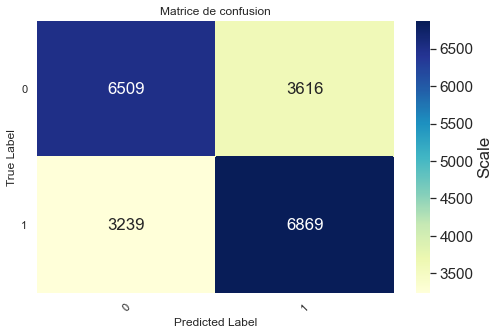

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.6790453682744501
Accuracy : 0.688
Classification Report
              precision    recall  f1-score   support

           0    0.68269   0.70272   0.69256     10125
           1    0.69320   0.67283   0.68287     10108

    accuracy                        0.68779     20233
   macro avg    0.68795   0.68777   0.68771     20233
weighted avg    0.68794   0.68779   0.68772     20233



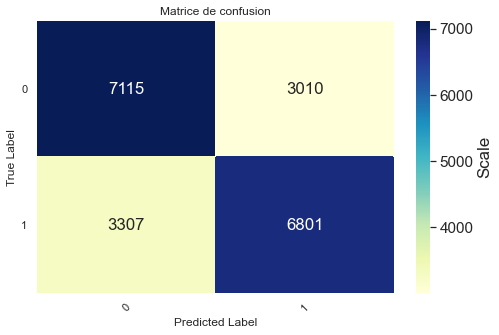

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7144519675983634
Accuracy : 0.726
Classification Report
              precision    recall  f1-score   support

           0    0.70252   0.78440   0.74120     10125
           1    0.75549   0.66729   0.70866     10108

    accuracy                        0.72589     20233
   macro avg    0.72900   0.72584   0.72493     20233
weighted avg    0.72898   0.72589   0.72494     20233



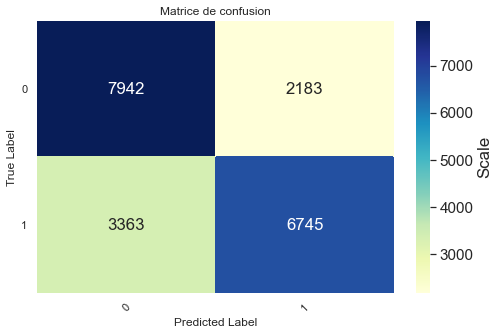

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6861961316141985
Accuracy : 0.710
Classification Report
              precision    recall  f1-score   support

           0    0.69024   0.76257   0.72460     10125
           1    0.73428   0.65720   0.69360     10108

    accuracy                        0.70993     20233
   macro avg    0.71226   0.70989   0.70910     20233
weighted avg    0.71224   0.70993   0.70912     20233



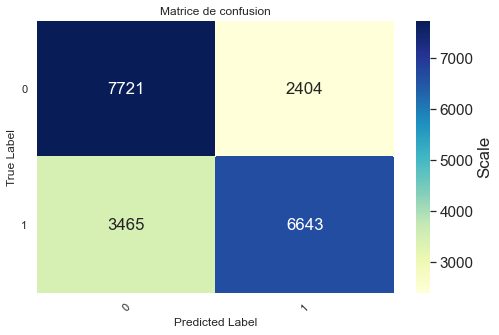

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7069541198408503
Accuracy : 0.722
Classification Report
              precision    recall  f1-score   support

           0    0.70342   0.76741   0.73402     10125
           1    0.74366   0.67590   0.70816     10108

    accuracy                        0.72169     20233
   macro avg    0.72354   0.72165   0.72109     20233
weighted avg    0.72352   0.72169   0.72110     20233



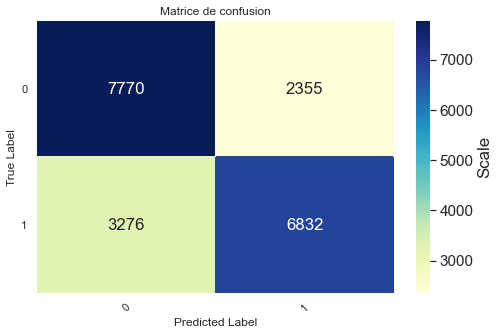

En utilisent source et text claims comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.6861958657000689
Accuracy : 0.695
Classification Report
              precision    recall  f1-score   support

           0    0.65949   0.80780   0.72615     10125
           1    0.75150   0.58221   0.65611     10108

    accuracy                        0.69510     20233
   macro avg    0.70550   0.69501   0.69113     20233
weighted avg    0.70546   0.69510   0.69116     20233



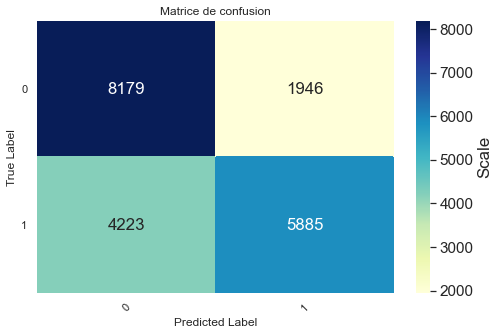

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 100}
best scores: 0.6959986571336451
Accuracy : 0.700
Classification Report
              precision    recall  f1-score   support

           0    0.66678   0.79960   0.72717     10125
           1    0.74923   0.59972   0.66619     10108

    accuracy                        0.69975     20233
   macro avg    0.70800   0.69966   0.69668     20233
weighted avg    0.70797   0.69975   0.69671     20233



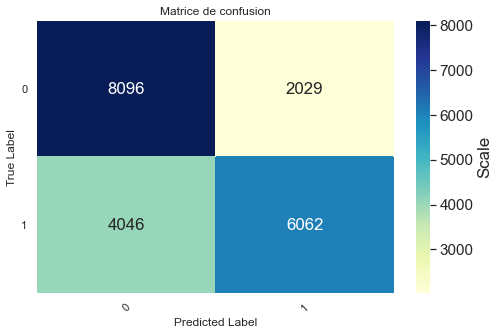

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7227541391196248
Accuracy : 0.728
Classification Report
              precision    recall  f1-score   support

           0    0.68720   0.83625   0.75443     10125
           1    0.79044   0.61872   0.69412     10108

    accuracy                        0.72757     20233
   macro avg    0.73882   0.72748   0.72428     20233
weighted avg    0.73878   0.72757   0.72430     20233



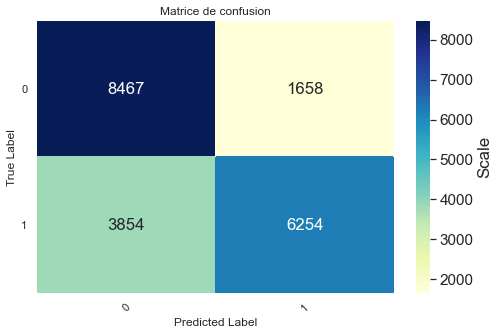

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.6951916077500673
Accuracy : 0.719
Classification Report
              precision    recall  f1-score   support

           0    0.70029   0.76662   0.73195     10125
           1    0.74172   0.67135   0.70478     10108

    accuracy                        0.71902     20233
   macro avg    0.72100   0.71898   0.71837     20233
weighted avg    0.72099   0.71902   0.71838     20233



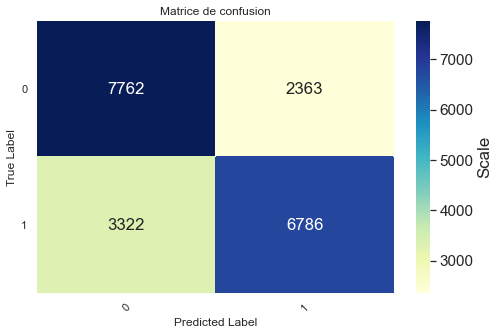

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7154885008758547
Accuracy : 0.729
Classification Report
              precision    recall  f1-score   support

           0    0.70095   0.79822   0.74643     10125
           1    0.76525   0.65888   0.70810     10108

    accuracy                        0.72861     20233
   macro avg    0.73310   0.72855   0.72726     20233
weighted avg    0.73308   0.72861   0.72728     20233



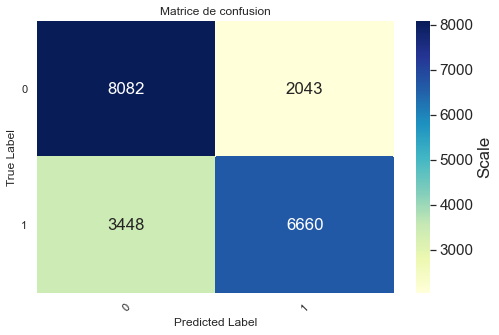

En utilisent text claims et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7016493988678706
Accuracy : 0.711
Classification Report
              precision    recall  f1-score   support

           0    0.67952   0.80040   0.73502     10125
           1    0.75671   0.62188   0.68270     10108

    accuracy                        0.71121     20233
   macro avg    0.71812   0.71114   0.70886     20233
weighted avg    0.71809   0.71121   0.70889     20233



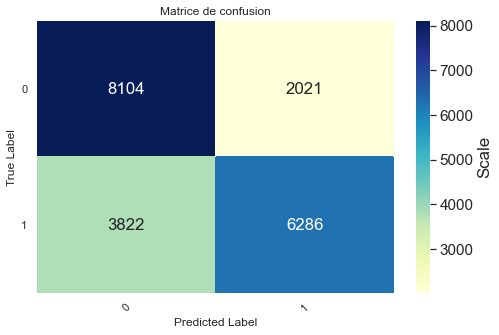

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7183726055263604
Accuracy : 0.724
Classification Report
              precision    recall  f1-score   support

           0    0.69515   0.79862   0.74330     10125
           1    0.76293   0.64919   0.70148     10108

    accuracy                        0.72397     20233
   macro avg    0.72904   0.72390   0.72239     20233
weighted avg    0.72901   0.72397   0.72241     20233



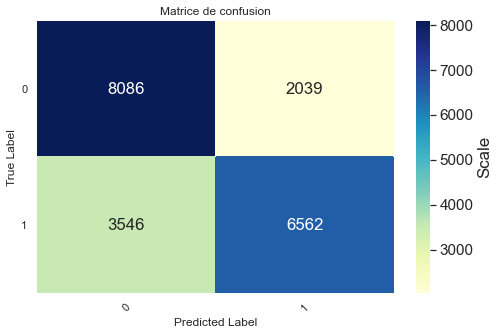

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7339420107761702
Accuracy : 0.743
Classification Report
              precision    recall  f1-score   support

           0    0.70806   0.82835   0.76350     10125
           1    0.79280   0.65789   0.71907     10108

    accuracy                        0.74319     20233
   macro avg    0.75043   0.74312   0.74129     20233
weighted avg    0.75040   0.74319   0.74130     20233



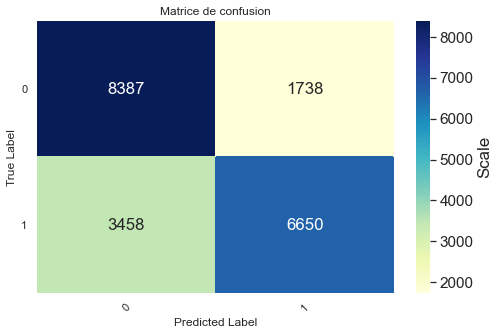

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.001}
best scores: 0.707991783253393
Accuracy : 0.729
Classification Report
              precision    recall  f1-score   support

           0    0.70998   0.77393   0.74057     10125
           1    0.75109   0.68332   0.71560     10108

    accuracy                        0.72866     20233
   macro avg    0.73053   0.72862   0.72809     20233
weighted avg    0.73051   0.72866   0.72810     20233



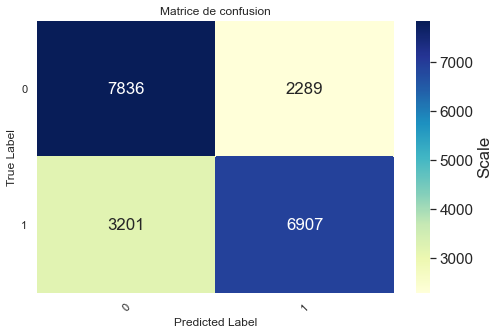

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7299041711955166
Accuracy : 0.739
Classification Report
              precision    recall  f1-score   support

           0    0.71487   0.79684   0.75363     10125
           1    0.77009   0.68164   0.72317     10108

    accuracy                        0.73929     20233
   macro avg    0.74248   0.73924   0.73840     20233
weighted avg    0.74246   0.73929   0.73841     20233



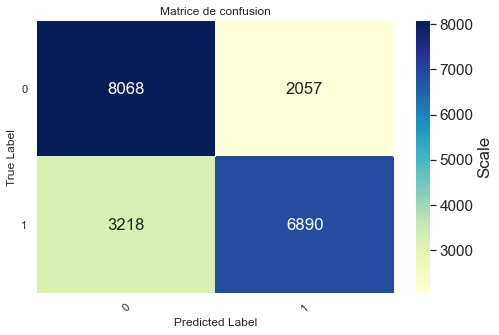

En utilisent text claims, headline et author comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7146815844493417
Accuracy : 0.719
Classification Report
              precision    recall  f1-score   support

           0    0.69220   0.78894   0.73741     10125
           1    0.75417   0.64860   0.69741     10108

    accuracy                        0.71883     20233
   macro avg    0.72319   0.71877   0.71741     20233
weighted avg    0.72316   0.71883   0.71743     20233



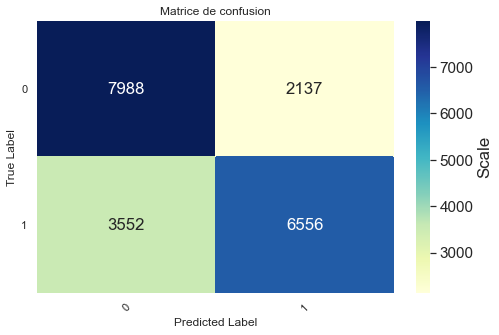

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7304813378139864
Accuracy : 0.736
Classification Report
              precision    recall  f1-score   support

           0    0.71032   0.79921   0.75215     10125
           1    0.77005   0.67353   0.71856     10108

    accuracy                        0.73642     20233
   macro avg    0.74019   0.73637   0.73535     20233
weighted avg    0.74016   0.73642   0.73537     20233



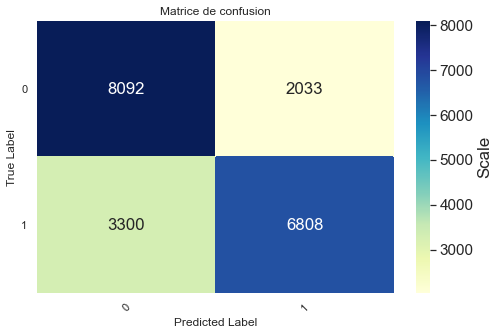

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7400537811327277
Accuracy : 0.751
Classification Report
              precision    recall  f1-score   support

           0    0.71684   0.83210   0.77018     10125
           1    0.79953   0.67076   0.72950     10108

    accuracy                        0.75150     20233
   macro avg    0.75818   0.75143   0.74984     20233
weighted avg    0.75815   0.75150   0.74986     20233



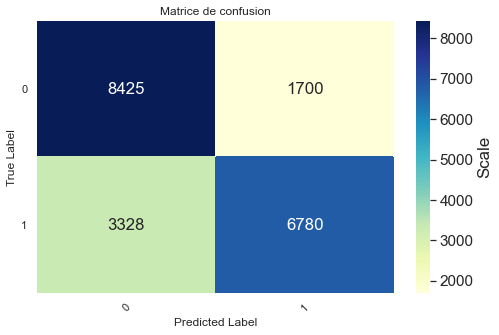

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.723792068446297
Accuracy : 0.747
Classification Report
              precision    recall  f1-score   support

           0    0.73257   0.78025   0.75566     10125
           1    0.76453   0.71468   0.73876     10108

    accuracy                        0.74749     20233
   macro avg    0.74855   0.74746   0.74721     20233
weighted avg    0.74853   0.74749   0.74722     20233



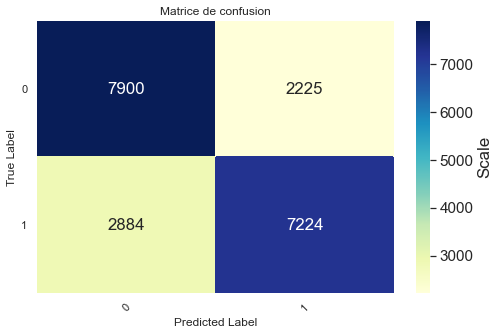

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7417825553683077
Accuracy : 0.753
Classification Report
              precision    recall  f1-score   support

           0    0.72798   0.80830   0.76604     10125
           1    0.78412   0.69747   0.73826     10108

    accuracy                        0.75293     20233
   macro avg    0.75605   0.75288   0.75215     20233
weighted avg    0.75603   0.75293   0.75216     20233



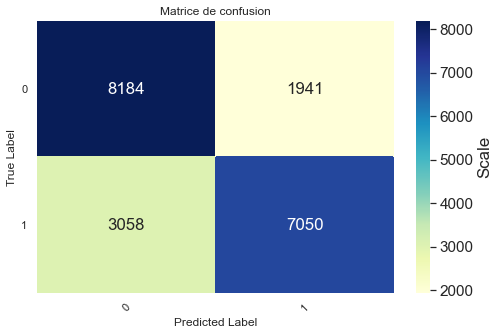

En utilisent text claims, headline, author et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7126050420168066
Accuracy : 0.721
Classification Report
              precision    recall  f1-score   support

           0    0.67846   0.75217   0.71342      5762
           1    0.76617   0.69494   0.72882      6733

    accuracy                        0.72133     12495
   macro avg    0.72231   0.72355   0.72112     12495
weighted avg    0.72572   0.72133   0.72171     12495



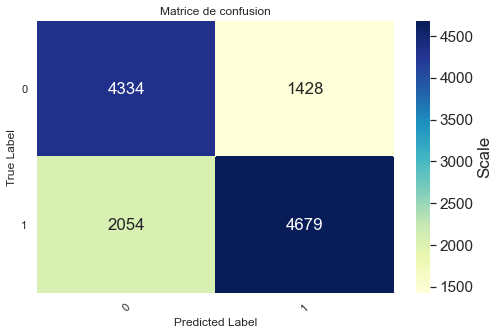

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7337068160597573
Accuracy : 0.746
Classification Report
              precision    recall  f1-score   support

           0    0.70452   0.77421   0.73772      5762
           1    0.78890   0.72211   0.75403      6733

    accuracy                        0.74614     12495
   macro avg    0.74671   0.74816   0.74588     12495
weighted avg    0.74999   0.74614   0.74651     12495



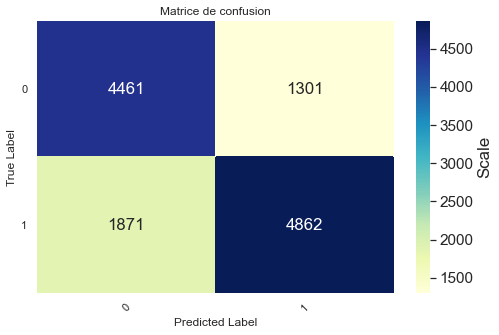

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.746031746031746
Accuracy : 0.760
Classification Report
              precision    recall  f1-score   support

           0    0.72617   0.77091   0.74787      5762
           1    0.79304   0.75123   0.77157      6733

    accuracy                        0.76030     12495
   macro avg    0.75961   0.76107   0.75972     12495
weighted avg    0.76220   0.76030   0.76064     12495



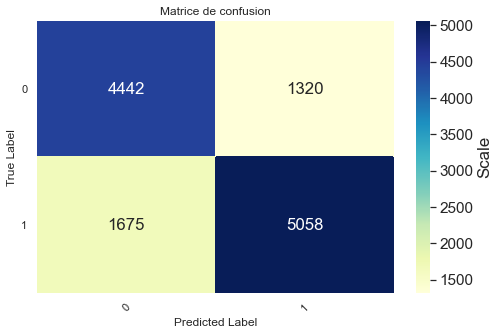

Alogrithm: logisticRegression
best params: {'clf__C': 2000, 'clf__tol': 0.001}
best scores: 0.7297852474323063
Accuracy : 0.754
Classification Report
              precision    recall  f1-score   support

           0    0.71509   0.77577   0.74419      5762
           1    0.79308   0.73548   0.76320      6733

    accuracy                        0.75406     12495
   macro avg    0.75408   0.75563   0.75370     12495
weighted avg    0.75711   0.75406   0.75443     12495



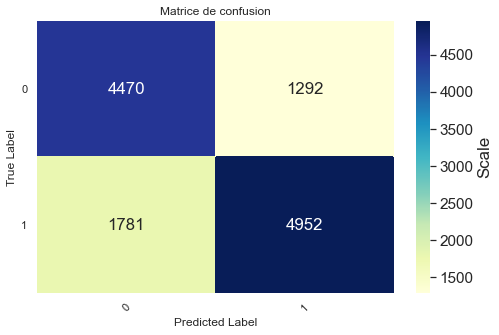

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7432306255835668
Accuracy : 0.756
Classification Report
              precision    recall  f1-score   support

           0    0.72190   0.76675   0.74365      5762
           1    0.78918   0.74722   0.76762      6733

    accuracy                        0.75622     12495
   macro avg    0.75554   0.75698   0.75563     12495
weighted avg    0.75815   0.75622   0.75657     12495



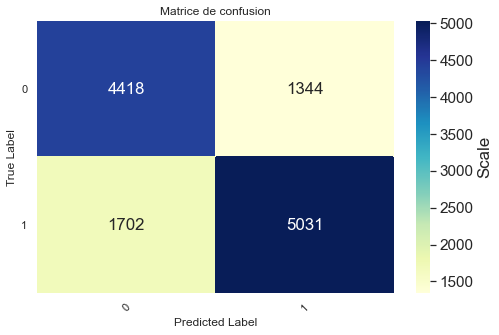

En utilisent text claims, headline, author,keywords et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.727579365079365
Accuracy : 0.729
Classification Report
              precision    recall  f1-score   support

           0    0.68906   0.77800   0.73083      5563
           1    0.77459   0.68485   0.72696      6197

    accuracy                        0.72891     11760
   macro avg    0.73183   0.73142   0.72890     11760
weighted avg    0.73413   0.72891   0.72879     11760



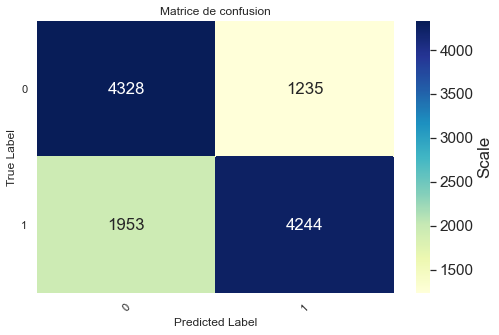

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7509920634920635
Accuracy : 0.749
Classification Report
              precision    recall  f1-score   support

           0    0.71092   0.79220   0.74936      5563
           1    0.79212   0.71083   0.74928      6197

    accuracy                        0.74932     11760
   macro avg    0.75152   0.75151   0.74932     11760
weighted avg    0.75371   0.74932   0.74932     11760



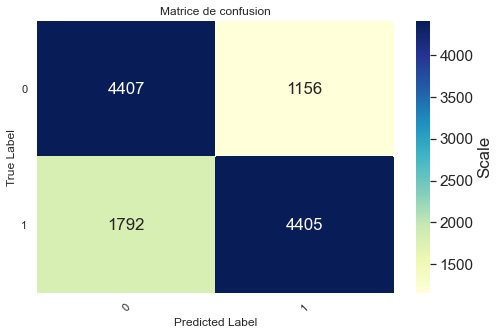

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7511904761904762
Accuracy : 0.757
Classification Report
              precision    recall  f1-score   support

           0    0.71148   0.81916   0.76153      5563
           1    0.81214   0.70179   0.75294      6197

    accuracy                        0.75731     11760
   macro avg    0.76181   0.76048   0.75724     11760
weighted avg    0.76452   0.75731   0.75701     11760



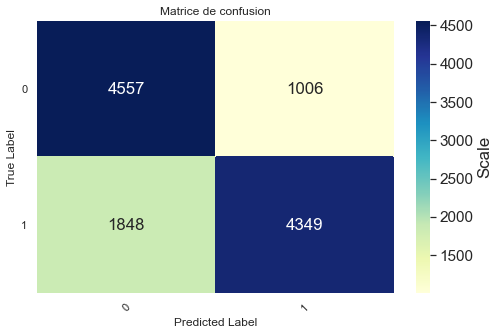

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.7525793650793651
Accuracy : 0.759
Classification Report
              precision    recall  f1-score   support

           0    0.72944   0.78123   0.75445      5563
           1    0.79024   0.73987   0.76423      6197

    accuracy                        0.75944     11760
   macro avg    0.75984   0.76055   0.75934     11760
weighted avg    0.76148   0.75944   0.75960     11760



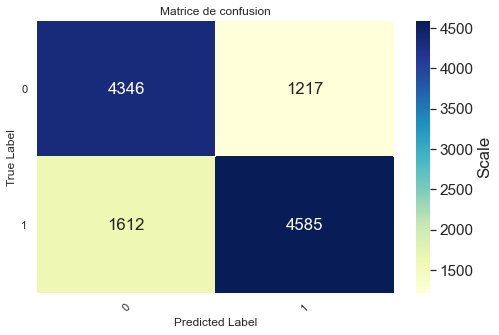

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7531746031746032
Accuracy : 0.758
Classification Report
              precision    recall  f1-score   support

           0    0.72015   0.79795   0.75706      5563
           1    0.79914   0.72164   0.75842      6197

    accuracy                        0.75774     11760
   macro avg    0.75965   0.75980   0.75774     11760
weighted avg    0.76178   0.75774   0.75777     11760



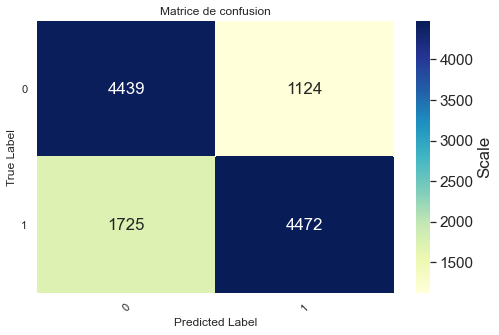

En utilisent text claims, source, headline, author, keywords et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.7283730158730158
Accuracy : 0.729
Classification Report
              precision    recall  f1-score   support

           0    0.68824   0.77980   0.73116      5563
           1    0.77552   0.68291   0.72627      6197

    accuracy                        0.72874     11760
   macro avg    0.73188   0.73135   0.72872     11760
weighted avg    0.73423   0.72874   0.72859     11760



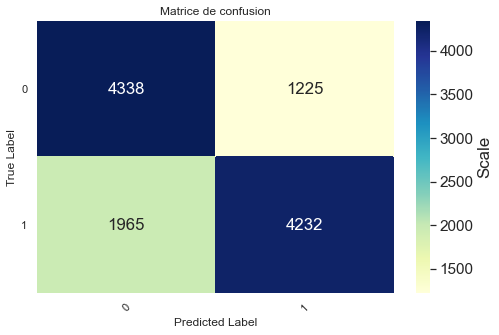

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7549603174603174
Accuracy : 0.752
Classification Report
              precision    recall  f1-score   support

           0    0.71463   0.79094   0.75085      5563
           1    0.79243   0.71648   0.75254      6197

    accuracy                        0.75170     11760
   macro avg    0.75353   0.75371   0.75170     11760
weighted avg    0.75563   0.75170   0.75174     11760



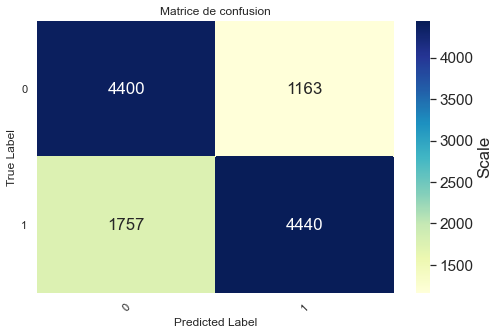

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7515873015873016
Accuracy : 0.752
Classification Report
              precision    recall  f1-score   support

           0    0.70134   0.83031   0.76039      5563
           1    0.81755   0.68259   0.74400      6197

    accuracy                        0.75247     11760
   macro avg    0.75944   0.75645   0.75219     11760
weighted avg    0.76258   0.75247   0.75175     11760



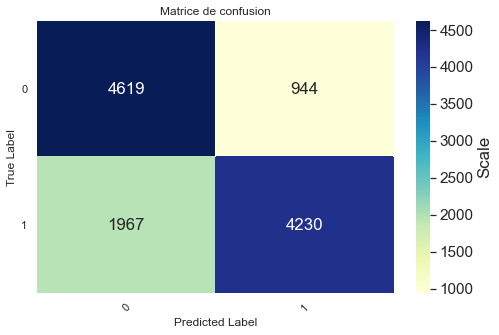

Alogrithm: logisticRegression
best params: {'clf__C': 2000, 'clf__tol': 0.001}
best scores: 0.7531746031746032
Accuracy : 0.760
Classification Report
              precision    recall  f1-score   support

           0    0.73005   0.78267   0.75544      5563
           1    0.79141   0.74020   0.76495      6197

    accuracy                        0.76029     11760
   macro avg    0.76073   0.76143   0.76019     11760
weighted avg    0.76238   0.76029   0.76045     11760



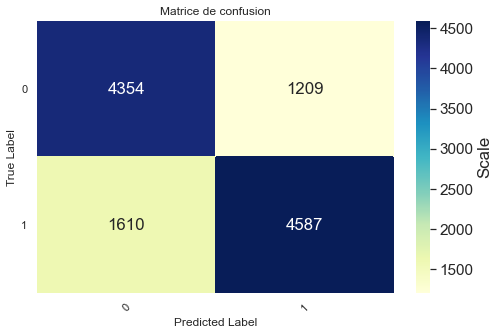

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7559523809523809
Accuracy : 0.760
Classification Report
              precision    recall  f1-score   support

           0    0.72028   0.80496   0.76027      5563
           1    0.80426   0.71938   0.75945      6197

    accuracy                        0.75986     11760
   macro avg    0.76227   0.76217   0.75986     11760
weighted avg    0.76453   0.75986   0.75984     11760



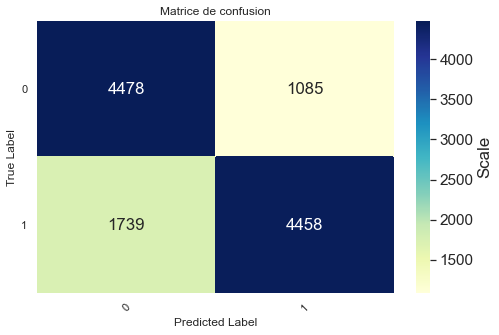

En utilisent text claims, headline, author,keywords,named_entities_claim et named_entities_article comme jeu de donnée
Alogrithm: ADB
best params: {'clf__learning_rate': 0.3, 'clf__n_estimators': 200}
best scores: 0.729657477025898
Accuracy : 0.734
Classification Report
              precision    recall  f1-score   support

           0    0.69584   0.77904   0.73509      5562
           1    0.77776   0.69427   0.73365      6195

    accuracy                        0.73437     11757
   macro avg    0.73680   0.73665   0.73437     11757
weighted avg    0.73900   0.73437   0.73433     11757



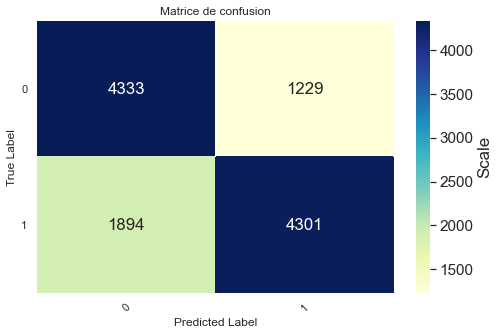

Alogrithm: GBC
best params: {'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7685552324206743
Accuracy : 0.758
Classification Report
              precision    recall  f1-score   support

           0    0.71665   0.80942   0.76022      5562
           1    0.80639   0.71267   0.75664      6195

    accuracy                        0.75844     11757
   macro avg    0.76152   0.76105   0.75843     11757
weighted avg    0.76394   0.75844   0.75833     11757



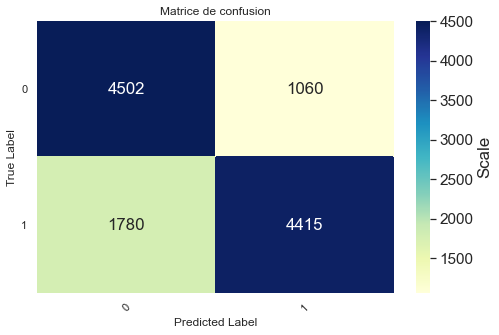

Alogrithm: RFC
best params: {'clf__criterion': 'gini', 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
best scores: 0.7622064201383963
Accuracy : 0.766
Classification Report
              precision    recall  f1-score   support

           0    0.72180   0.82147   0.76842      5562
           1    0.81703   0.71574   0.76304      6195

    accuracy                        0.76576     11757
   macro avg    0.76941   0.76860   0.76573     11757
weighted avg    0.77198   0.76576   0.76558     11757



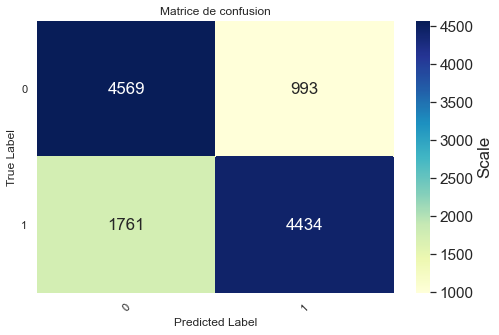

Alogrithm: logisticRegression
best params: {'clf__C': 1000, 'clf__tol': 0.0001}
best scores: 0.756452451884428
Accuracy : 0.765
Classification Report
              precision    recall  f1-score   support

           0    0.73686   0.78137   0.75846      5562
           1    0.79246   0.74948   0.77037      6195

    accuracy                        0.76457     11757
   macro avg    0.76466   0.76542   0.76442     11757
weighted avg    0.76615   0.76457   0.76474     11757



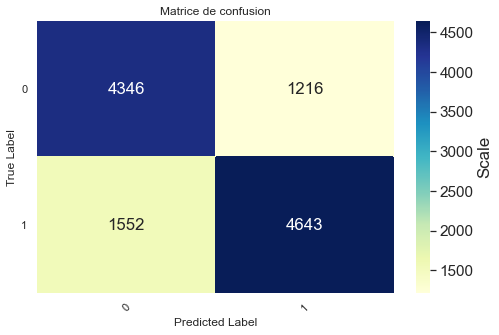

Alogrithm: SVM
best params: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
best scores: 0.7574443183430274
Accuracy : 0.763
Classification Report
              precision    recall  f1-score   support

           0    0.72379   0.80798   0.76357      5562
           1    0.80750   0.72316   0.76301      6195

    accuracy                        0.76329     11757
   macro avg    0.76564   0.76557   0.76329     11757
weighted avg    0.76790   0.76329   0.76327     11757



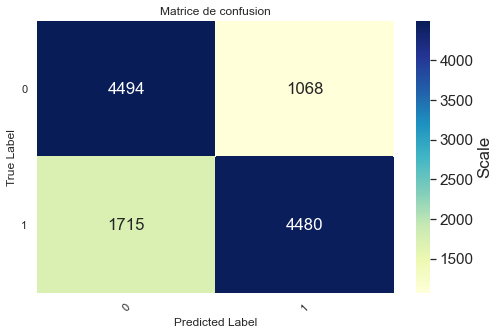

In [19]:
text_normalizer = TextNormalizer()
overBestScoredAlgo = []
print("En utilisent text claims comme jeu de donnée")
features = np.array(["text"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M_over)
overBestScoredAlgo.append(score)
print("En utilisent source et text claims comme jeu de donnée")
features = np.array(["source","text"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M_over)
overBestScoredAlgo.append(score)
print("En utilisent text claims et author comme jeu de donnée")
features = np.array(["text","author"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M_over)
overBestScoredAlgo.append(score)
print("En utilisent text claims, headline et author comme jeu de donnée")
features = np.array(["text","headline","author"])
score = classification_avec_pretraitement(features,text_normalizer,dfVF_M_over)
overBestScoredAlgo.append(score)
print("En utilisent text claims, headline, author et named_entities_article comme jeu de donnée")
dfn=dfVF_M_over.copy()
features = np.array(["text","headline","author","named_entities_article"])
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
score=classification_avec_pretraitement(features,text_normalizer,dfn)
overBestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords et named_entities_article comme jeu de donnée")
features = np.array(["text","headline","author","named_entities_article","keywords"])
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
score=classification_avec_pretraitement(features,text_normalizer,dfn)
overBestScoredAlgo.append(score)
print("En utilisent text claims, source, headline, author, keywords et named_entities_article comme jeu de donnée")
features = np.array(["text","source","headline","author","named_entities_article","keywords"])
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
score=classification_avec_pretraitement(features,text_normalizer,dfn)
overBestScoredAlgo.append(score)
print("En utilisent text claims, headline, author,keywords,named_entities_claim et named_entities_article comme jeu de donnée")
dfn['named_entities_claim'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_claim'], inplace=True)
features = np.array(["text","headline","author","named_entities_article","keywords","named_entities_claim"])
score=classification_avec_pretraitement(features,text_normalizer,dfn)
overBestScoredAlgo.append(score)

In [21]:
overBestScoredAlgo.sort(key=lambda x: x[3],reverse=True)
print("Meilleur score "+str(overBestScoredAlgo[0][3]))
print("tri de meilleur score et meilleur algorithme de chaque features")
for i in range(len(overBestScoredAlgo)):
    print("Features :"+str(overBestScoredAlgo[i][0]))
    print("Meilleur Score :"+str(overBestScoredAlgo[i][3]))
    print("Meilleur Algorithm :"+str(overBestScoredAlgo[i][2]))
    print("Meilleur Parametre :"+str(overBestScoredAlgo[i][4]))
    print("-------------------------")

Meilleur score 0.7685552324206743
tri de meilleur score et meilleur algorithme de chaque features
Features :['text' 'headline' 'author' 'named_entities_article' 'keywords'
 'named_entities_claim']
Meilleur Score :0.7685552324206743
Meilleur Algorithm :GBC
Meilleur Parametre :{'clf__learning_rate': 0.3, 'clf__max_depth': 3, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
-------------------------
Features :['text' 'source' 'headline' 'author' 'named_entities_article' 'keywords']
Meilleur Score :0.7559523809523809
Meilleur Algorithm :SVM
Meilleur Parametre :{'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
-------------------------
Features :['text' 'headline' 'author' 'named_entities_article' 'keywords']
Meilleur Score :0.7531746031746032
Meilleur Algorithm :SVM
Meilleur Parametre :{'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'linear'}
-------------------------
Features :['text' 'headline' 'author' 'named_entities_article']
Meilleur Score :0.746

##### Nous remarquons aprés avoir fait le over sampling que le comportement des algorithmes a changer ainsi que leurs scores, l'algorithm SVC et RFC nous ont donner les meilleurs scores pour tous les features. 

###### Application de l'algorithm RFC en utilisent le meilleur prétraitement et les meilleurs features

En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7880952380952381
Accuracy : 0.797
Classification Report
              precision    recall  f1-score   support

           0    0.74028   0.87553   0.80224      2370
           1    0.86813   0.72734   0.79152      2670

    accuracy                        0.79702      5040
   macro avg    0.80420   0.80143   0.79688      5040
weighted avg    0.80801   0.79702   0.79656      5040



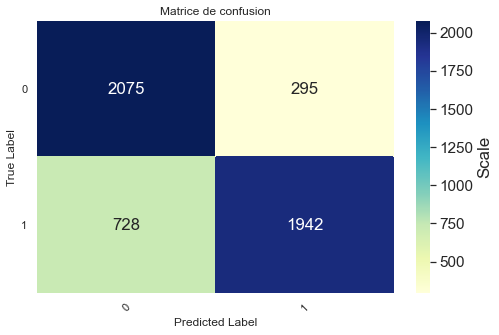

En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7920068027210884
Accuracy : 0.803
Classification Report
              precision    recall  f1-score   support

           0    0.74991   0.87173   0.80624      2370
           1    0.86696   0.74195   0.79960      2670

    accuracy                        0.80298      5040
   macro avg    0.80843   0.80684   0.80292      5040
weighted avg    0.81192   0.80298   0.80272      5040



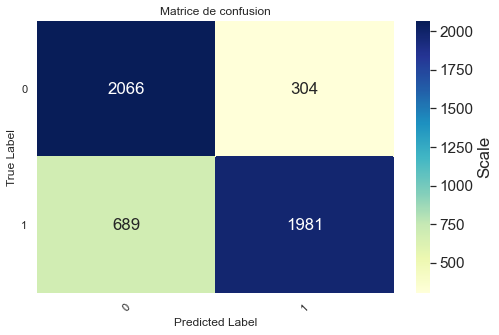

En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7989595838335334
Accuracy : 0.814
Classification Report
              precision    recall  f1-score   support

           0    0.76423   0.85644   0.80771      2445
           1    0.86577   0.77801   0.81955      2910

    accuracy                        0.81382      5355
   macro avg    0.81500   0.81722   0.81363      5355
weighted avg    0.81941   0.81382   0.81414      5355



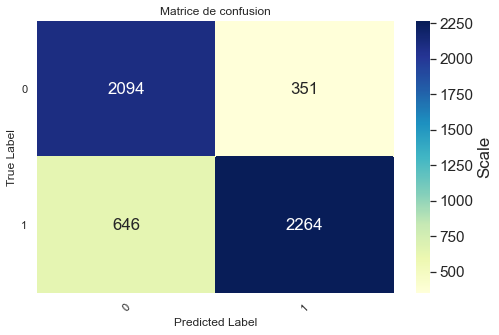

In [23]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                 )
parameters = {'clf__n_estimators':[200], 'clf__criterion':['gini'],'clf__min_samples_split':[2],
                        'clf__min_samples_leaf': [2]}


clf = RandomForestClassifier()
print("En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','source','headline','author','named_entities_article','keywords'])
dfn=dfVF_M_over.copy()
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

print("En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article','keywords'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

dfn_article=dfVF_M_over.copy()
dfn_article['named_entities_article'].replace('', np.nan, inplace=True)
dfn_article.dropna(subset=['named_entities_article'], inplace=True)

print("En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn_article)

###### Application de l'algorithm SVM en utilisent le meilleur prétraitement et les meilleurs features


En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7910714285714285
Accuracy : 0.790
Classification Report
              precision    recall  f1-score   support

           0    0.74727   0.83586   0.78909      2370
           1    0.83717   0.74906   0.79067      2670

    accuracy                        0.78988      5040
   macro avg    0.79222   0.79246   0.78988      5040
weighted avg    0.79489   0.78988   0.78993      5040



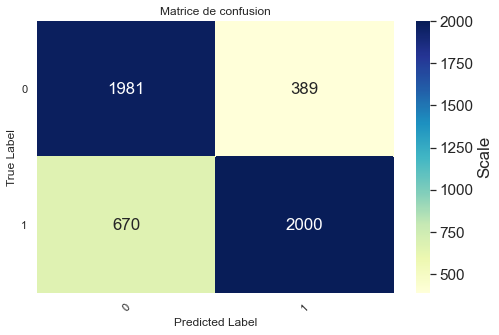

En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7906462585034013
Accuracy : 0.788
Classification Report
              precision    recall  f1-score   support

           0    0.74687   0.83038   0.78641      2370
           1    0.83285   0.75019   0.78936      2670

    accuracy                        0.78790      5040
   macro avg    0.78986   0.79028   0.78789      5040
weighted avg    0.79242   0.78790   0.78797      5040



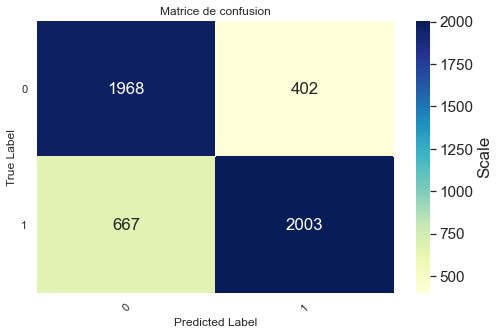

En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée
Enlever les valeurs nulle des features
Meilleur résultat : 0.7795118047218887
Accuracy : 0.797
Classification Report
              precision    recall  f1-score   support

           0    0.75251   0.82699   0.78800      2445
           1    0.84145   0.77148   0.80495      2910

    accuracy                        0.79683      5355
   macro avg    0.79698   0.79924   0.79647      5355
weighted avg    0.80084   0.79683   0.79721      5355



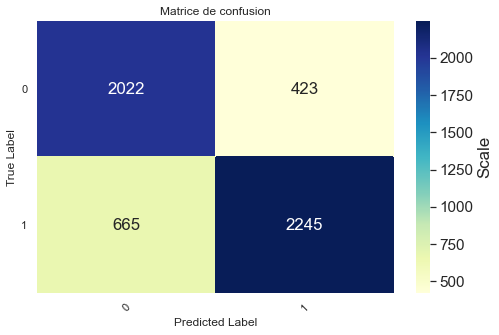

In [25]:
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                 )
parameters ={'clf__C': [1], 'clf__gamma': [1], 'clf__kernel': ['linear']}


clf = SVC()
print("En utilisent 'text','source','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','source','headline','author','named_entities_article','keywords'])
dfn=dfVF_M_over.copy()
dfn['named_entities_article'].replace('', np.nan, inplace=True)
dfn['keywords'].replace("", np.nan, inplace=True)
dfn.dropna(subset=['named_entities_article'], inplace=True)
dfn.dropna(subset=['keywords'], inplace=True)
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

print("En utilisent 'text','headline','author','named_entities_article','keywords' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article','keywords'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn)

dfn_article=dfVF_M_over.copy()
dfn_article['named_entities_article'].replace('', np.nan, inplace=True)
dfn_article.dropna(subset=['named_entities_article'], inplace=True)

print("En utilisent 'text','headline','author','named_entities_article' comme jeu de donnée")
features = np.array(['text','headline','author','named_entities_article'])
print("Enlever les valeurs nulle des features")
Classify(features,text_normalizer,clf,parameters,dfn_article)

##### Nous déduisons que Le meilleur equilibrage est Over sampling, le meilleur algorithme est RFC et le meilleur feature est 'text','headline','author','named_entities_article'

### Cross Validation du meilleur algorithm et meilleur feature

In [28]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# selection des données
features = np.array(['text','headline','author','named_entities_article'])
X=dfn_article[features].apply(lambda x: ','.join(x.dropna().astype(str)),axis=1)
y=dfn_article.truthRating
# Création d'un jeu d'apprentissage et de test
trainsize=0.7 # 70% pour le jeu d'apprentissage, il reste 30% du jeu de données pour le test
testsize= 0.3
seed=30
X_train,X_test,y_train,y_test=train_test_split(X, 
                                               y, 
                                               train_size=trainsize, 
                                               random_state=seed,
                                               test_size=testsize)

# création du pipeline en ajoutant le classifier
text_normalizer = TextNormalizer(removestopwords=True, # suppression des stopwords
                 lowercase=True,# passage en minuscule
                 removedigit=False, # supprimer les nombres 
                 transformdigit=False, # transforamation des chiffre en lettres
                 getstemmer=False,# racinisation des termes 
                 getlemmatisation=True, # lemmatisation des termes 
                 remove_non_ascii=False # supprimer les caractéres non ascii
                 )
pipe = Pipeline([("cleaner", text_normalizer),
                 ("count_vectorizer", TfidfVectorizer()),
                 ("RFC", RandomForestClassifier(
                 n_estimators=200, criterion='gini',min_samples_split=2,min_samples_leaf=2
                 ))])
pipe.fit(X_train,y_train)

print("pipeline créé")

pipeline créé


In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
seed=7
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
scoring = 'accuracy'
print('Cross validation ...')
score = cross_val_score(pipe, X, y, cv=k_fold, scoring=scoring)
print('Les différentes accuracy pour les 10 évaluations sont',score,'\n')
print ('Accuracy moyenne : ',score.mean(),' standard deviation', score.std()) 

Cross validation ...
Les différentes accuracy pour les 10 évaluations sont [0.84033613 0.83585434 0.82240896 0.84145658 0.8487395  0.82016807
 0.82913165 0.83641457 0.82072829 0.84369748] 

Accuracy moyenne :  0.8338935574229691  standard deviation 0.009704174448866175


# Tache 3 : VRAIS / FAUX / MIXTURE